# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

    1) Establish business questions to explore
    2) Open, explore, and perform necessary cleaning on provided data sets. Determine need for additional data and acquire it via API calls and web scraping. Decide on most robust data to use as the "master" set.
    3) Merge data sets into larger data sets as needed. Clean further until working with robust data.
    4) EDA on data sets including visualizations

# Business Exploration Questions

1. What are the primary factors influencing housing prices in the King County metro area?
2. Can we effectively use a regression model based system for realtors to determine a proper list price?
3. Is a model-based system more accurate for determining list price than the traditional comps-based system?
4. What easy-to-use features can we add to our model to increase its accuracy?

# Notebook Preparation

## Recommended Extensions

Recommended to also install the nbextensions "Table of Contents 2" and "Collapsible Headings" for easier navigation through this notebook.

Gitbhub here: https://github.com/ipython-contrib/jupyter_contrib_nbextensions


Ensure seaborn is updated to recent version

## Importing Modules

In [2]:
import csv

from joblib import dump

import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.formula.api import wls

import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV, RidgeCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.feature_selection import RFECV, RFE

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import neighbors
from math import sqrt
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

## Notebook Functions

In [3]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# Preprocessing

In [4]:
# load and look at our king county housing data
df = pd.read_csv('kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [5]:
# what are the columns in our data?

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# looking for outliers in the percentiles

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

We see potential outliers in price, sqft_lot, sqft_living, and bedrooms.

I also see a possible significant outlier in longitude. We will look at what that means visually.

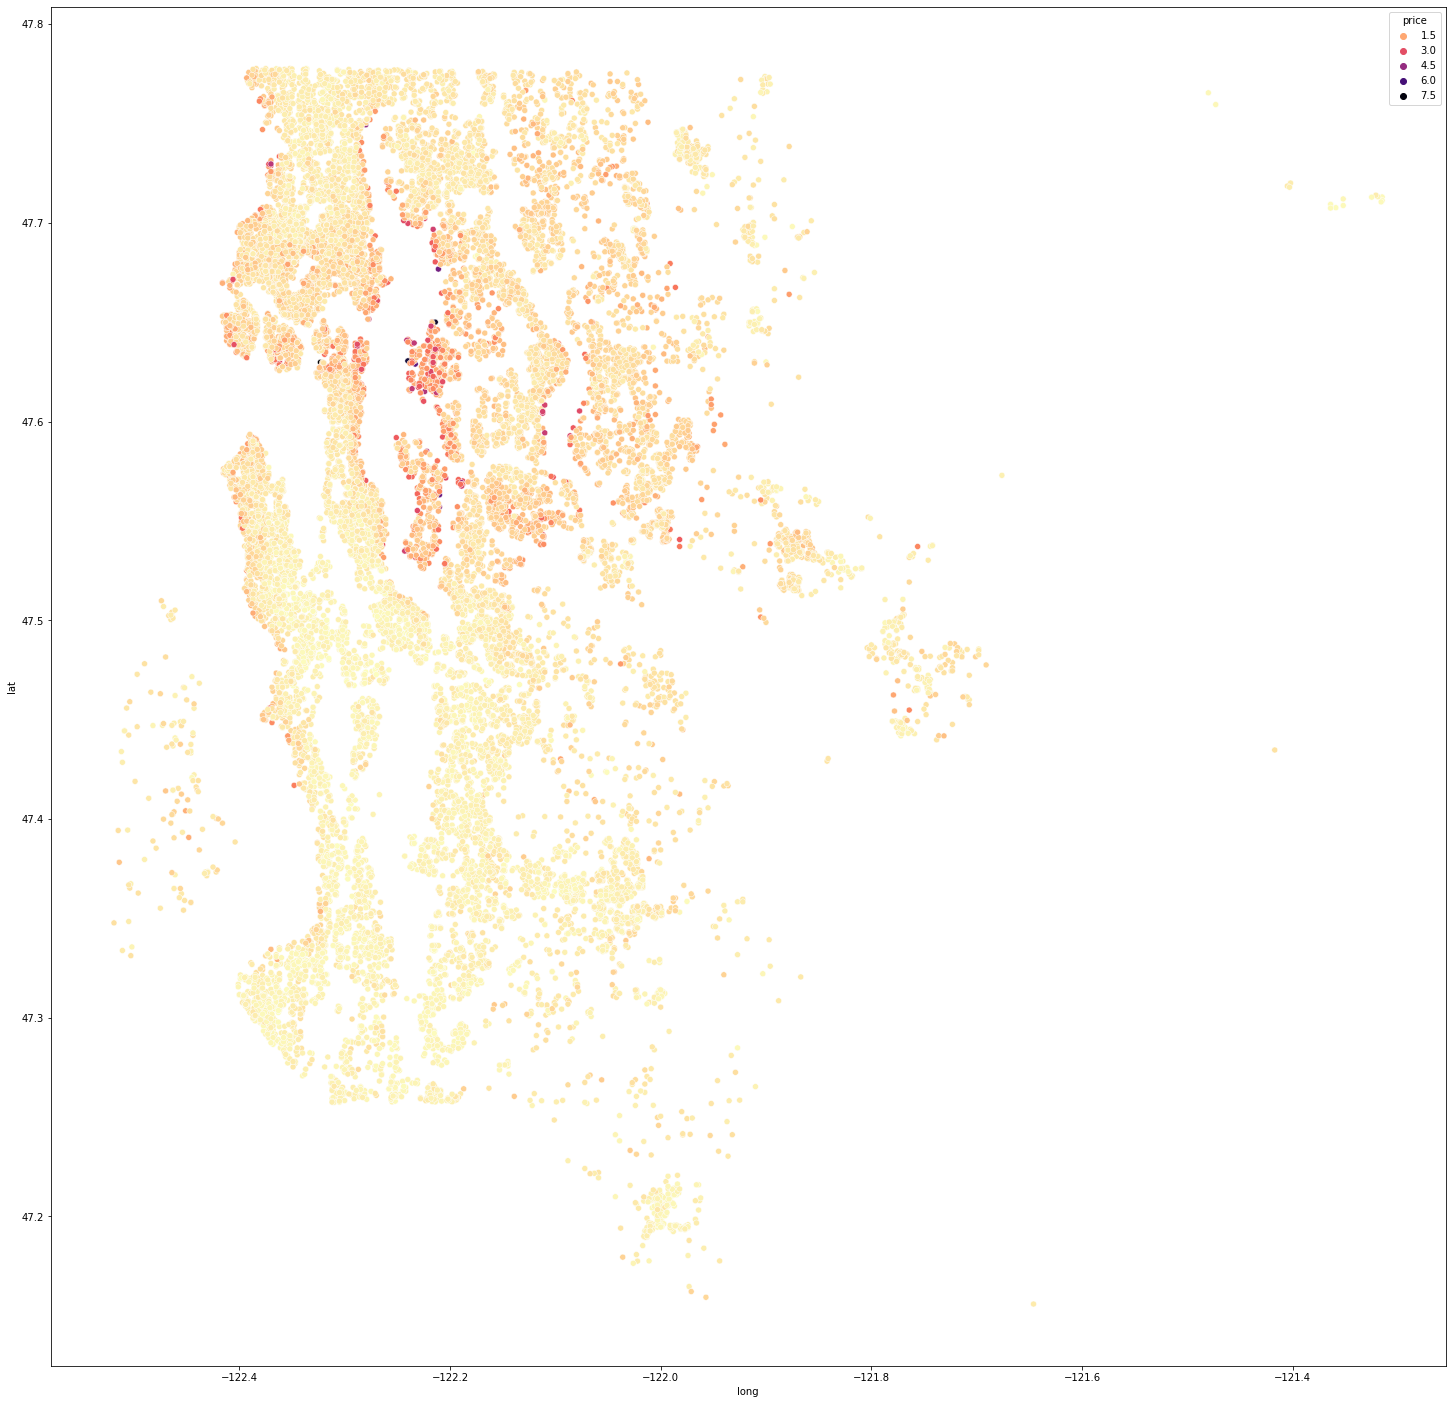

In [7]:
# plotting latitude and longitude as a visual scatter plot

plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="magma_r");

Using latitude and longitude, we make a visual map of the King County area that lets us see the map outliers. We can see that there are a few sales in locations that are outliers in some way - still in King County but very far away from the metro area on which we are focusing. Sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well. 

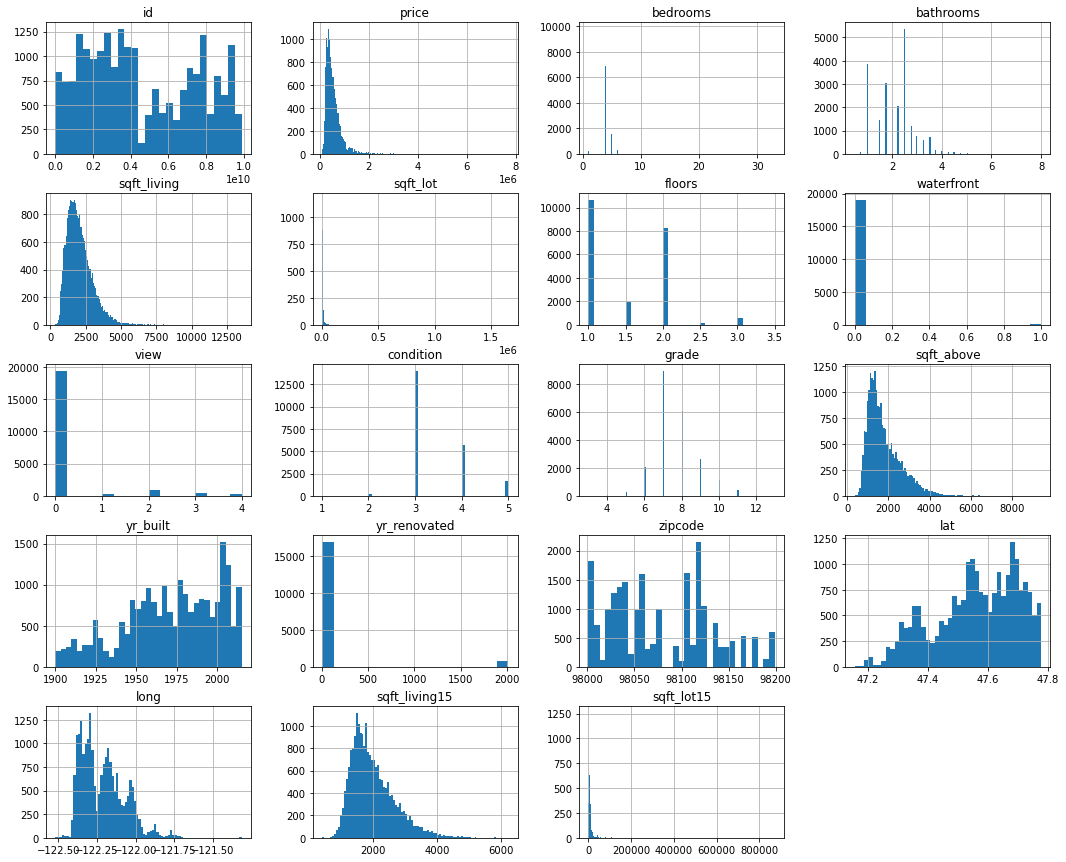

In [8]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');


In [9]:
# A lot of our variables are not normally shaped, so we can't reliably remove outliers via standard deviation.
# We will use IQR to remove our outliers with the following function

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.75"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    return lower_range,upper_range  

In [10]:
# determing our IQR for price, lot size, sq footage and longitude

pricelower,priceupper = iqr_outliers(df.price)
lotlower,lotupper = iqr_outliers(df.sqft_lot)
sqftlower, sqftupper = iqr_outliers(df.sqft_living)
longlower, longupper = iqr_outliers(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


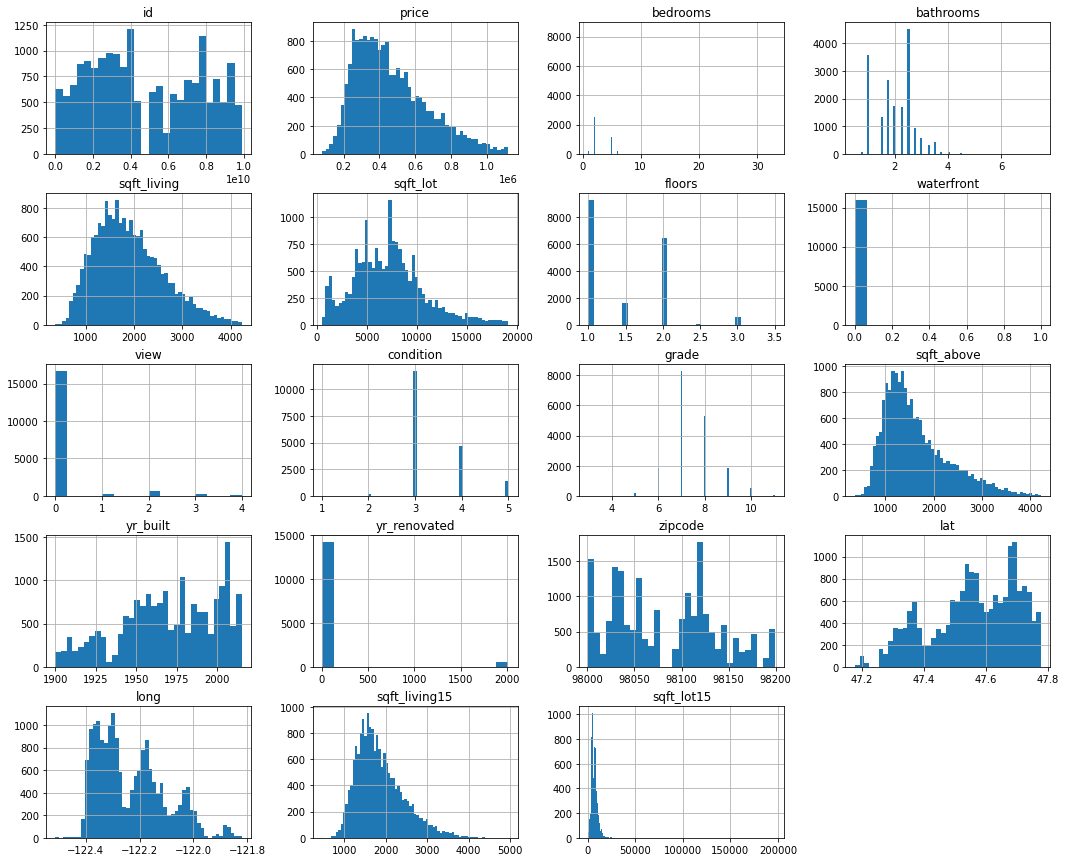

In [11]:
# checking our new histograms

df.hist(figsize=(18,15), bins='auto');

Our data is still largely not normally distributed, but using our IQR has gotten rid of some severely skewing outliers in the price, long and aqft_living categories and ESPECIALLY in the sqft_lot category.

In [12]:
# looking again at our percentile outliers

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.806400e+04  1.806400e+04  18064.000000  18064.000000  18064.000000   
mean   4.734869e+09  4.661867e+05      3.310950      2.022545   1901.211581   
std    2.863577e+09  2.030986e+05      0.908795      0.698204    705.998664   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.310050e+09  3.100000e+05      3.000000      1.500000   1370.000000   
50%    4.051100e+09  4.259980e+05      3.000000      2.000000   1800.000000   
75%    7.504000e+09  5.870000e+05      4.000000      2.500000   2340.000000   
max    9.900000e+09  1.120000e+06     33.000000      7.500000   4230.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18064.000000  18064.000000  16041.000000  18010.000000  18064.000000   
mean    7228.931577      1.473622      0.001683      0.152860      3.410430   
std     3531.260521      0.543144      0.040993      0.598097      0.649636   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4800.000000      1.000000      0.000000      0.000000      3.000000   
50%     7158.500000      1.000000      0.000000      0.000000      3.000000   
75%     9199.250000      2.000000      0.000000      0.000000      4.000000   
max    19141.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  18064.000000  18064.000000  18064.000000  14835.000000  18064.000000   
mean       7.463961   1640.353908   1969.980071     72.252174  98081.761570   
std        0.971570    670.235221     29.902053    372.847802     54.100966   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1150.000000   1950.000000      0.000000  98033.000000   
50%        7.000000   1470.000000   1971.000000      0.000000  98074.000000   
75%        8.000000   1990.000000   1997.000000      0.000000  98119.000000   
max       11.000000   4230.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  18064.000000  18064.000000   18064.000000   18064.000000  
mean      47.560709   -122.231837    1862.605403    7235.137954  
std        0.138559      0.125532     575.085271    4356.270638  
min       47.177500   -122.512000     460.000000     651.000000  
25%       47.473800   -122.337000    1440.000000    4939.750000  
50%       47.570850   -122.268000    1750.000000    7200.000000  
75%       47.680500   -122.152000    2190.000000    8894.250000  
max       47.777600   -121.821000    4950.000000  196591.000000

In [13]:
#check what is going on with the sqft_lot15 outliers by sorting descending

df.sort_values('sqft_lot15', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
4607   3523029059   7/31/2014  181000.0         2       1.50         1560   
9436   3523029077   10/7/2014  297000.0         3       1.00         1340   
8112   1923039089   6/10/2014  285000.0         2       2.00         1651   
7086   8656800020   2/12/2015  309000.0         3       2.50         1450   
13153  1523069197    5/3/2014  379880.0         3       2.50         1650   
...           ...         ...       ...       ...        ...          ...   
20999  8562780530   3/28/2015  338500.0         2       2.25         1150   
20891  8562780540  12/22/2014  325000.0         2       2.25         1150   
513    2827100070   11/5/2014  290000.0         4       1.00         1330   
20733  2827100075   7/27/2014  286308.0         2       1.50         1220   
19653  7899800863   10/1/2014  299900.0         3       2.50         1210   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
4607      10807     1.0         0.0   0.0          2      7        1560   
9436      18000     1.0         0.0   0.0          4      7        1340   
8112      18200     1.0         0.0   0.0          3      6        1651   
7086      11480     2.0         NaN   0.0          3      7        1450   
13153     14054     1.0         0.0   0.0          4      7        1130   
...         ...     ...         ...   ...        ...    ...         ...   
20999       711     2.0         0.0   0.0          3      7        1150   
20891       711     2.0         0.0   0.0          3      7        1150   
513        8184     1.5         0.0   0.0          3      7        1330   
20733      1036     3.0         0.0   0.0          3      7        1220   
19653      2046     2.0         0.0   0.0          3      9         920   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4607            0.0      1949           0.0    98070  47.4444 -122.509   
9436            0.0      1924           NaN    98070  47.4443 -122.509   
8112            0.0      1946           0.0    98070  47.4621 -122.461   
7086            0.0      1990           0.0    98014  47.6720 -121.864   
13153         520.0      1986           0.0    98027  47.4821 -122.017   
...             ...       ...           ...      ...      ...      ...   
20999           0.0      2013           NaN    98027  47.5323 -122.071   
20891           0.0      2013           NaN    98027  47.5323 -122.070   
513             0.0      1949           0.0    98133  47.7343 -122.347   
20733           0.0      2006           0.0    98133  47.7348 -122.347   
19653         290.0      2008           NaN    98106  47.5212 -122.357   

       sqft_living15  sqft_lot15  
4607            1660      196591  
9436            1660      196591  
8112            1510       89595  
7086            2080       87991  
13153           1940       87555  
...              ...         ...  
20999           1150         748  
20891           1150         748  
513             1220         660  
20733           1210         659  
19653           1070         651  

[18064 rows x 21 columns]

In [14]:
# there is something off about these two large and nearly identical entries at the top of the list. We are going to drop these two rows.

df.drop(df[df['sqft_lot15'] == 196591].index, axis=0, inplace = True)

In [15]:
#check what is going on with the weird bedroom value by sorting descending

df.sort_values('bedrooms', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014  640000.0        33       1.75         1620   
8748   1773100755   8/21/2014  520000.0        11       3.00         3000   
15147  5566100170  10/29/2014  650000.0        10       2.00         3610   
19239  8812401450  12/29/2014  660000.0        10       3.00         2920   
4092   1997200215    5/7/2014  599999.0         9       4.50         3830   
...           ...         ...       ...       ...        ...          ...   
10779  9269200520  10/16/2014  310000.0         1       1.00          670   
465    8658300340   5/23/2014   80000.0         1       0.75          430   
19402  3163600076   7/30/2014  152275.0         1       1.00         1020   
5565   1735800050    4/9/2015  142500.0         1       1.00          690   
10469  7129304375   7/14/2014  202000.0         1       0.75          590   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000     1.0         0.0   0.0          5      7        1040   
8748       4960     2.0         0.0   0.0          3      7        2400   
15147     11914     2.0         0.0   0.0          4      7        3010   
19239      3745     2.0         0.0   0.0          4      7        1860   
4092       6988     2.5         0.0   0.0          3      7        2450   
...         ...     ...         ...   ...        ...    ...         ...   
10779      4920     1.0         0.0   0.0          3      5         670   
465        5050     1.0         NaN   0.0          2      4         430   
19402      6871     1.0         0.0   0.0          3      6        1020   
5565       6825     1.0         0.0   0.0          4      5         690   
10469      5650     1.0         0.0   0.0          3      6         590   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856         580.0      1947           0.0    98103  47.6878 -122.331   
8748          600.0      1918        1999.0    98106  47.5560 -122.363   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
...             ...       ...           ...      ...      ...      ...   
10779           0.0      1920           NaN    98126  47.5342 -122.373   
465             0.0      1912           0.0    98014  47.6499 -121.909   
19402           0.0      1937           NaN    98146  47.5051 -122.338   
5565            0.0      1917           0.0    98002  47.3109 -122.225   
10469           0.0      1944           0.0    98118  47.5181 -122.267   

       sqft_living15  sqft_lot15  
15856           1330        4700  
8748            1420        4960  
15147           2040       11914  
19239           1810        3745  
4092            1460        6291  
...              ...         ...  
10779           1050        4920  
465             1200        7500  
19402           1260        6933  
5565            1330        5381  
10469            980        5650  

[18062 rows x 21 columns]

In [16]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

id        date     price  bedrooms  bathrooms  sqft_living  \
4092   1997200215    5/7/2014  599999.0         9        4.5         3830   
4231   2902200015    1/6/2015  700000.0         9        3.0         3680   
18428  8823901445   3/13/2015  934000.0         9        3.0         2820   
8537    424049043   8/11/2014  450000.0         9        7.5         4050   
9443   2769600590  10/16/2014  900000.0         8        4.0         4020   
...           ...         ...       ...       ...        ...          ...   
9509   6450301220   9/16/2014  264000.0         1        1.0          710   
16411  7625700020   9/29/2014  340000.0         1        1.0          640   
9536   2658000115   6/18/2014  190000.0         1        1.0          720   
11727  1352300990   8/26/2014  126000.0         1        1.0          610   
7010    203100460   9/24/2014  400000.0         1        1.0          530   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
4092       6988     2.5         0.0   0.0          3      7        2450   
4231       4400     2.0         0.0   0.0          3      7        2830   
18428      4480     2.0         0.0   0.0          3      7        1880   
8537       6504     2.0         0.0   0.0          3      7        4050   
9443       7500     1.0         0.0   0.0          3      8        2010   
...         ...     ...         ...   ...        ...    ...         ...   
9509       4725     1.0         NaN   0.0          3      6         710   
16411      4800     1.0         0.0   0.0          3      6         640   
9536       4800     1.0         0.0   0.0          3      6         720   
11727      4400     1.0         0.0   0.0          3      5         610   
7010      13679     1.0         0.0   0.0          4      6         530   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
4231          850.0      1908           0.0    98102  47.6374 -122.324   
18428         940.0      1918           0.0    98105  47.6654 -122.307   
8537            0.0      1996           0.0    98144  47.5923 -122.301   
9443         2010.0      1968           0.0    98107  47.6732 -122.363   
...             ...       ...           ...      ...      ...      ...   
9509            0.0      1939           0.0    98133  47.7328 -122.340   
16411           0.0      1918           NaN    98136  47.5551 -122.382   
9536            0.0      1914           0.0    98118  47.5303 -122.270   
11727           0.0      1922           0.0    98055  47.4865 -122.197   
7010            0.0      1949           0.0    98053  47.6422 -121.954   

       sqft_living15  sqft_lot15  
4092            1460        6291  
4231            1960        2450  
18428           2460        4400  
8537            1448        3866  
9443            1560        3737  
...              ...         ...  
9509             900        5250  
16411           1250        2847  
9536            1240        4860  
11727           1090        4930  
7010            1930       20624  

[18062 rows x 21 columns]

In [17]:
df

# confirming we still have a lot of data to work with - over 18k entries

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[18062 rows x 21 columns]

In [18]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2023
view               54
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3228
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [20]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [22]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000166
6791200120    0.000111
2231500030    0.000111
3262300940    0.000111
5249801440    0.000111
Name: id, dtype: float64 


date 
 6/23/2014    0.006478
6/25/2014    0.006145
4/14/2015    0.005979
4/28/2015    0.005979
4/27/2015    0.005869
Name: date, dtype: float64 


price 
 350000.0    0.008526
450000.0    0.008194
325000.0    0.007696
425000.0    0.007585
550000.0    0.007585
Name: price, dtype: float64 


bedrooms 
 3    0.473148
4    0.301960
2    0.140350
5    0.062784
6    0.010464
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.250969
1.00    0.198317
1.75    0.147990
2.00    0.095892
2.25    0.094840
Name: bathrooms, dtype: float64 


sqft_living 
 1400    0.007142
1440    0.006865
1300    0.006810
1010    0.006755
1660    0.006755
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.018769
6000    0.015059
4000    0.013177
7200    0.011294
4800    0.006422
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.516443
2.0    0.357934
1.5    

In [23]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])

# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month_sold'] = pd.DatetimeIndex(df['date']).month

In [24]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month_sold                int64
dtype: object

In [25]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [26]:
# We're trying out engineering a feature that penalizes or rewards being the smallest or biggest
# property in the neighborhood, as generally you don't want to be either. This is attempting 
# to impose a categorical relationship on how the property relates to its neighbors

df['comparative_sf'] = 0
df.loc[df['sqft_living'] <= (df['sqft_living15']*.75), 'comparative_sf'] = '1'
df.loc[(df['sqft_living'] > (df['sqft_living15']*.75)) | (df['sqft_living'] < (df['sqft_living15']*1.25)), 'comparative_sf'] = '2'
df.loc[df['sqft_living'] >= (df['sqft_living15']*1.25), 'comparative_sf'] = '3'

df['comparative_lot'] = 0
df.loc[df['sqft_lot'] <= (df['sqft_lot15']*.75), 'comparative_lot'] = '1'
df.loc[(df['sqft_lot'] > (df['sqft_lot15']*.75)) | (df['sqft_lot'] < (df['sqft_lot15']*1.25)), 'comparative_lot'] = '2'
df.loc[df['sqft_lot'] >= (df['sqft_lot15']*1.25), 'comparative_lot'] = '3'

In [27]:
df

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         0.0   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         0.0   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

       basement  yr_built  renovated  zipcode      lat     long  \
0           0.0      1955        0.0    98178  47.5112 -122.257   
1           1.0      1951        1.0    98125  47.7210 -122.319   
2           0.0      1933        0.0    98028  47.7379 -122.233   
3           1.0      1965        0.0    98136  47.5208 -122.393   
4           0.0      1987        0.0    98074  47.6168 -122.045   
...         ...       ...        ...      ...      ...      ...   
21592       0.0      2009        0.0    98103  47.6993 -122.346   
21593       0.0      2014        0.0    98146  47.5107 -122.362   
21594       0.0      2009        0.0    98144  47.5944 -122.299   
21595       0.0      2004        0.0    98027  47.5345 -122.069   
21596       0.0      2008        0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  month_sold comparative_sf comparative_lot  
0               1340        5650          10              2               2  
1               1690        7639          12              3               2  
2               2720        8062           2              2               2  
3               1360        5000          12              3               2  
4               1800        7503           2              2               2  
...              ...         ...         ...            ...             ...  
21592           1530        1509           5              2               2  
21593           1830        7200           2              3               2  
21594           1020        2007           6              2               2  
21595           1410        1287           1              2               3  
21596           1020        1357          10              2               2  

[18062 rows x 24 columns]

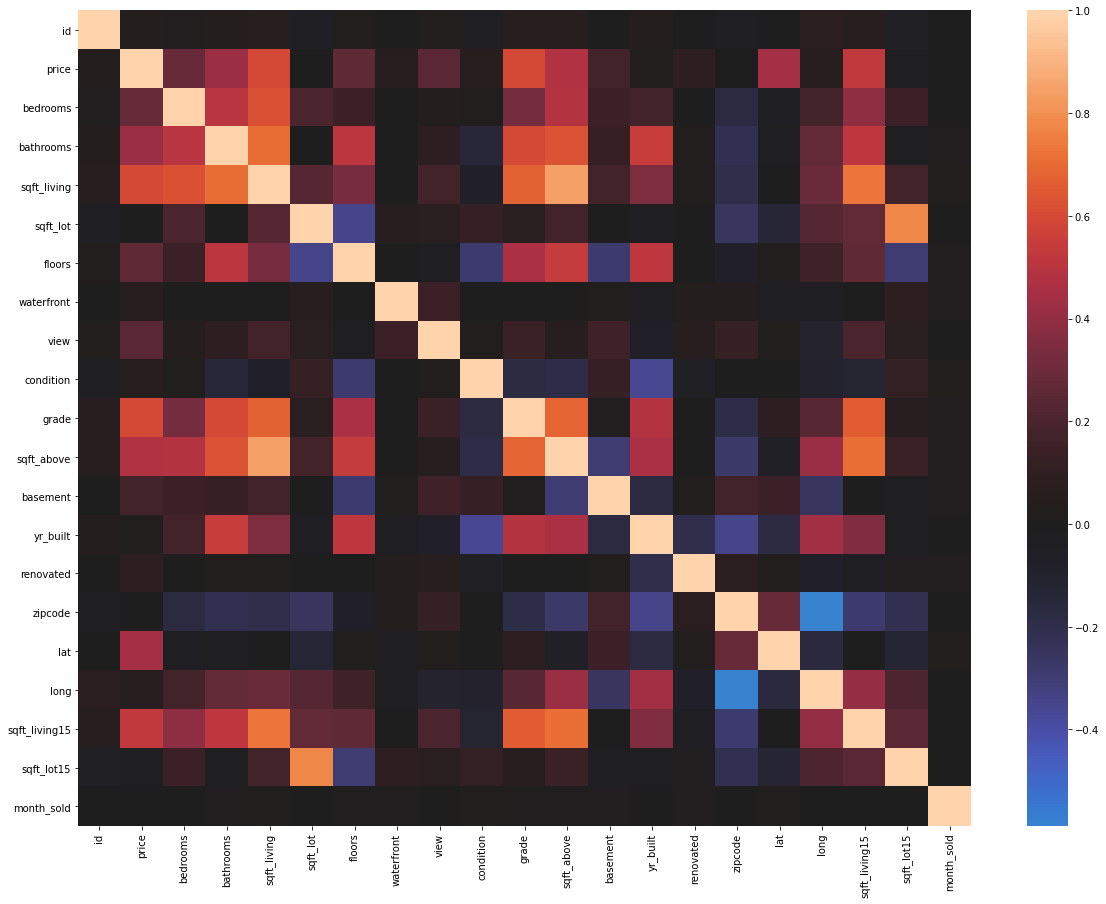

In [28]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [29]:
data_pred.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.039704  0.013803   0.042699     0.048351 -0.048282   
price          0.039704  1.000000  0.283801   0.419244     0.591284 -0.005900   
bedrooms       0.013803  0.283801  1.000000   0.498253     0.621396  0.202600   
bathrooms      0.042699  0.419244  0.498253   1.000000     0.706113 -0.016295   
sqft_living    0.048351  0.591284  0.621396   0.706113     1.000000  0.226763   
sqft_lot      -0.048282 -0.005900  0.202600  -0.016295     0.226763  1.000000   
floors         0.031918  0.256788  0.148692   0.510540     0.333523 -0.346485   
waterfront     0.005142  0.047532 -0.011964  -0.008438    -0.002933  0.048291   
view           0.031282  0.248307  0.043651   0.088439     0.167427  0.068277   
condition     -0.033874  0.051489  0.019276  -0.143788    -0.071247  0.123950   
grade          0.058672  0.600867  0.318398   0.595867     0.677311  0.067613   
sqft_above     0.053426  0.480370  0.489050   0.624794     0.838791  0.177694   
basement      -0.004525  0.180940  0.139105   0.130145     0.181033 -0.016669   
yr_built       0.038850  0.018080  0.165642   0.548492     0.344570 -0.046097   
renovated     -0.010727  0.091948  0.003538   0.027593     0.025141 -0.010688   
zipcode       -0.033992  0.001271 -0.161818  -0.211754    -0.198543 -0.247417   
lat           -0.003737  0.453658 -0.047417  -0.018973     0.006106 -0.140837   
long           0.073912  0.050695  0.174197   0.272555     0.290879  0.236906   
sqft_living15  0.055348  0.526731  0.389272   0.520327     0.732936  0.270600   
sqft_lot15    -0.054835 -0.018772  0.144507  -0.019605     0.168721  0.772953   
month_sold    -0.016208 -0.013510 -0.001658   0.012558     0.014435 -0.008425   

                 floors  waterfront      view  condition     grade  \
id             0.031918    0.005142  0.031282  -0.033874  0.058672   
price          0.256788    0.047532  0.248307   0.051489  0.600867   
bedrooms       0.148692   -0.011964  0.043651   0.019276  0.318398   
bathrooms      0.510540   -0.008438  0.088439  -0.143788  0.595867   
sqft_living    0.333523   -0.002933  0.167427  -0.071247  0.677311   
sqft_lot      -0.346485    0.048291  0.068277   0.123950  0.067613   
floors         1.000000   -0.006040 -0.020613  -0.286764  0.464219   
waterfront    -0.006040    1.000000  0.140872   0.004230 -0.011104   
view          -0.020613    0.140872  1.000000   0.032682  0.135679   
condition     -0.286764    0.004230  0.032682   1.000000 -0.175736   
grade          0.464219   -0.011104  0.135679  -0.175736  1.000000   
sqft_above     0.535239   -0.013569  0.053844  -0.186743  0.680964   
basement      -0.279742    0.014199  0.158082   0.128372  0.008694   
yr_built       0.520901   -0.022744 -0.078145  -0.361772  0.490333   
renovated     -0.000518    0.043852  0.050200  -0.055416 -0.008111   
zipcode       -0.068760    0.041782  0.124151  -0.005371 -0.185500   
lat            0.021672   -0.029084  0.015612  -0.000165  0.079479   
long           0.152822   -0.027601 -0.105440  -0.096690  0.240552   
sqft_living15  0.262556    0.004274  0.195218  -0.121027  0.653522   
sqft_lot15    -0.291915    0.093574  0.069774   0.112997  0.055818   
month_sold     0.011174    0.008092 -0.010109   0.023266  0.013839   

               sqft_above  basement  yr_built  renovated   zipcode       lat  \
id               0.053426 -0.004525  0.038850  -0.010727 -0.033992 -0.003737   
price            0.480370  0.180940  0.018080   0.091948  0.001271  0.453658   
bedrooms         0.489050  0.139105  0.165642   0.003538 -0.161818 -0.047417   
bathrooms        0.624794  0.130145  0.548492   0.027593 -0.211754 -0.018973   
sqft_living      0.838791  0.181033  0.344570   0.025141 -0.198543  0.006106   
sqft_lot         0.177694 -0.016669 -0.046097  -0.010688 -0.247417 -0.140837   
floors           0.535239 -0.279742  0.520901  -0.000518 -0.068760  0.021672   
waterfront      -0.013569  0.014199 -0.022744   0.043852 

In [30]:
#Get our list of highly correlated feature pairs with following steps:

# save correlation matrix as a new data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.70]


level_0        level_1  correlation
pairs                                                                  
(sqft_living, sqft_above)       sqft_living     sqft_above     0.838791
(sqft_above, sqft_living)        sqft_above    sqft_living     0.838791
(sqft_lot, sqft_lot15)             sqft_lot     sqft_lot15     0.772953
(sqft_lot15, sqft_lot)           sqft_lot15       sqft_lot     0.772953
(sqft_living, sqft_living15)    sqft_living  sqft_living15     0.732936
(sqft_living15, sqft_living)  sqft_living15    sqft_living     0.732936
(sqft_living15, sqft_above)   sqft_living15     sqft_above     0.710900
(sqft_above, sqft_living15)      sqft_above  sqft_living15     0.710900
(bathrooms, sqft_living)          bathrooms    sqft_living     0.706113
(sqft_living, bathrooms)        sqft_living      bathrooms     0.706113

we're going to drop sqft_above and sqft_lot15 and just keep the base sqft_living and sqft_lot. We're also going to drop sqft_living15 which fell JUST under the threshold of collinearity, based on the fact that a realtor does not easily have that information available to use in our predictive model.


In [31]:
df.reset_index(drop=True, inplace=True)

Our last action is to bring all of our home sale prices to the same time scale. It's easy to ignore that these homes were sold over the space of a year, but a year is a long time for real estate. King County median prices increased 9.05% from May 2014 to May 2015, and we need to account for this kind of change in our model. We'll do this by appreciating all sale prices into May 2015 using an appreciation rate over the year of 9.05%, and dividing into months (more granularity is possible of course)

In [32]:
df.loc[(df['date']>'2014-05-01') & (df['date']<'2014-06-01'), 'time_series'] = 12
df.loc[(df['date']>='2014-06-01') & (df['date']<'2014-07-01'), 'time_series'] = 11
df.loc[(df['date']>='2014-07-01') & (df['date']<'2014-08-01'), 'time_series'] = 10
df.loc[(df['date']>='2014-08-01') & (df['date']<'2014-09-01'), 'time_series'] = 9
df.loc[(df['date']>='2014-09-01') & (df['date']<'2014-10-01'), 'time_series'] = 8
df.loc[(df['date']>='2014-10-01') & (df['date']<'2014-11-01'), 'time_series'] = 7
df.loc[(df['date']>='2014-11-01') & (df['date']<'2014-12-01'), 'time_series'] = 6
df.loc[(df['date']>='2014-12-01') & (df['date']<'2015-01-01'), 'time_series'] = 5
df.loc[(df['date']>='2015-01-01') & (df['date']<'2015-02-01'), 'time_series'] = 4
df.loc[(df['date']>='2015-02-01') & (df['date']<'2015-03-01'), 'time_series'] = 3
df.loc[(df['date']>='2015-03-01') & (df['date']<'2015-04-01'), 'time_series'] = 2
df.loc[(df['date']>='2015-04-01') & (df['date']<'2015-05-01'), 'time_series'] = 1
df.loc[(df['date']>='2015-05-01') & (df['date']<'2015-06-01'), 'time_series'] = 0

In [33]:
# adjusting up our sale prices to account for appreciation

monthly_appreciation = .0905/12
df['adj_price'] = round(df['price']*(1+((monthly_appreciation/12)*df['time_series'])), 0)

In [34]:
# our final dataframe with the columns that we will use in our model

df_cleaned = df[['adj_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 
                'grade', 'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'month_sold', 'comparative_sf','comparative_lot']]

# we're renaming our adjusted price column to be price
df_cleaned.rename(columns={"adj_price": "price"}, inplace=True)
df_cleaned

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      222876.0         3       1.00         1180      5650     1.0   
1      539691.0         3       2.25         2570      7242     2.0   
2      180339.0         2       1.00          770     10000     1.0   
3      605898.0         4       3.00         1960      5000     1.0   
4      510962.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
18057  362715.0         3       2.50         1530      1131     3.0   
18058  400754.0         4       2.50         2310      5813     2.0   
18059  404881.0         2       0.75         1020      1350     2.0   
18060  401006.0         3       2.50         1600      2388     2.0   
18061  326430.0         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  basement  yr_built  renovated  zipcode  \
0             0.0          3      7       0.0      1955        0.0    98178   
1             0.0          3      7       1.0      1951        1.0    98125   
2             0.0          3      6       0.0      1933        0.0    98028   
3             0.0          5      7       1.0      1965        0.0    98136   
4             0.0          3      8       0.0      1987        0.0    98074   
...           ...        ...    ...       ...       ...        ...      ...   
18057         0.0          3      8       0.0      2009        0.0    98103   
18058         0.0          3      8       0.0      2014        0.0    98146   
18059         0.0          3      7       0.0      2009        0.0    98144   
18060         0.0          3      8       0.0      2004        0.0    98027   
18061         0.0          3      7       0.0      2008        0.0    98144   

           lat  month_sold comparative_sf comparative_lot  
0      47.5112          10              2               2  
1      47.7210          12              3               2  
2      47.7379           2              2               2  
3      47.5208          12              3               2  
4      47.6168           2              2               2  
...        ...         ...            ...             ...  
18057  47.6993           5              2               2  
18058  47.5107           2              3               2  
18059  47.5944           6              2               2  
18060  47.5345           1              2               3  
18061  47.5941          10              2               2  

[18062 rows x 17 columns]

We dropped:
* ID - just a home id
* Date - we extracted Month for our use
* View - according to the file, just means the house was viewed
* sqft_above - correlated with sqft_living
* sqft_lot15 - correlated with sqft_lot
* sqft_living15 - correlated with sqft_living
* long - eliminated outliers with long, but no longer used

## Study of variables

In [96]:
# prepare our categories for data transformation by separating into our data types -
# our target dependent variable, categorical variables, and continuous/ordinal variables

target = ['price']
categoricals = ['price', 'yr_built', 'month_sold', 'zipcode', 'waterfront', 'renovated','basement', 'comparative_sf', 'comparative_lot', 'lat'] # 
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade']

### Target Variable

#### TO DO - explain these visuals

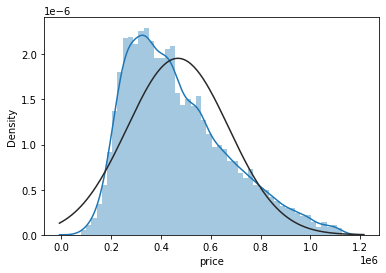

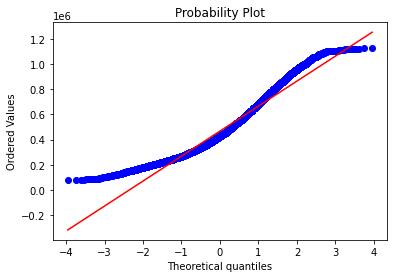

In [36]:
#histogram and normal probability plot
sns.distplot(df_cleaned['price'], fit=norm);
fig = plt.figure()

res = stats.probplot(df_cleaned['price'], plot=plt)

# our sales price histogram is positively skewed and has a high peak
# Our QQ-plot shows that we have heavy tails with right skew

In [37]:
#skewness and kurtosis
print("Skewness: %f" % df_cleaned['price'].skew())
print("Kurtosis: %f" % df_cleaned['price'].kurt())

# price is moderately skewed right, almost highly skewed
# some positive kurtosis, indicating more in the tails. We can see those tails in the right skew.

Skewness: 0.780069
Kurtosis: 0.078753


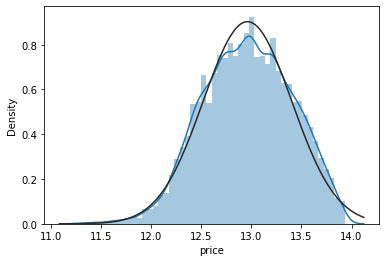

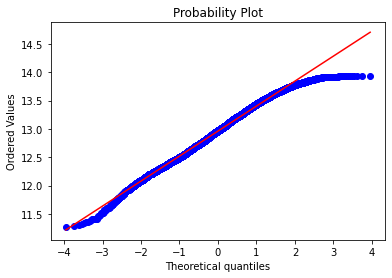

In [38]:
# log transform our target price to improve normality of distribution
df_target_log = np.log(df_cleaned['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

# Our target price is more normally distributed now
# transforming it gives more of a left skew

### Categoricals

In [39]:
df_categoricals = df_cleaned[categoricals]

df_categoricals

price  yr_built  month_sold  zipcode  waterfront  renovated  \
0      222876.0      1955          10    98178         0.0        0.0   
1      539691.0      1951          12    98125         0.0        1.0   
2      180339.0      1933           2    98028         0.0        0.0   
3      605898.0      1965          12    98136         0.0        0.0   
4      510962.0      1987           2    98074         0.0        0.0   
...         ...       ...         ...      ...         ...        ...   
18057  362715.0      2009           5    98103         0.0        0.0   
18058  400754.0      2014           2    98146         0.0        0.0   
18059  404881.0      2009           6    98144         0.0        0.0   
18060  401006.0      2004           1    98027         0.0        0.0   
18061  326430.0      2008          10    98144         0.0        0.0   

       basement comparative_sf comparative_lot      lat  
0           0.0              2               2  47.5112  
1           1.0              3               2  47.7210  
2           0.0              2               2  47.7379  
3           1.0              3               2  47.5208  
4           0.0              2               2  47.6168  
...         ...            ...             ...      ...  
18057       0.0              2               2  47.6993  
18058       0.0              3               2  47.5107  
18059       0.0              2               2  47.5944  
18060       0.0              2               3  47.5345  
18061       0.0              2               2  47.5941  

[18062 rows x 10 columns]

Let's look at mean price by month and see if there are any better insights.

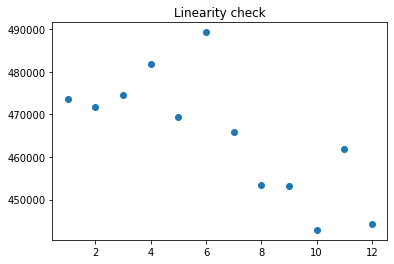

In [40]:
monthly_prices = df_categoricals.groupby('month_sold')['price'].mean()
month = df_categoricals['month_sold'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()


Our average per month is all over. We are going to keep this as a categorical.

In [41]:
# binning our latitude into equally sized bins, where each bin has the same number of entries

df_categoricals["lat_block"], lat_bins = pd.qcut(df_categoricals['lat'], q=40, retbins=True)

In [42]:
# binning our year built into equally sized bins, where each bin has the same number of entries

df_categoricals["year_block"], year_bins = pd.qcut(df_categoricals['yr_built'], q=20, retbins=True)

In [43]:
# check out our current categorical additions

df_categoricals

price  yr_built  month_sold  zipcode  waterfront  renovated  \
0      222876.0      1955          10    98178         0.0        0.0   
1      539691.0      1951          12    98125         0.0        1.0   
2      180339.0      1933           2    98028         0.0        0.0   
3      605898.0      1965          12    98136         0.0        0.0   
4      510962.0      1987           2    98074         0.0        0.0   
...         ...       ...         ...      ...         ...        ...   
18057  362715.0      2009           5    98103         0.0        0.0   
18058  400754.0      2014           2    98146         0.0        0.0   
18059  404881.0      2009           6    98144         0.0        0.0   
18060  401006.0      2004           1    98027         0.0        0.0   
18061  326430.0      2008          10    98144         0.0        0.0   

       basement comparative_sf comparative_lot      lat         lat_block  \
0           0.0              2               2  47.5112    (47.5, 47.512]   
1           1.0              3               2  47.7210  (47.718, 47.727]   
2           0.0              2               2  47.7379  (47.736, 47.747]   
3           1.0              3               2  47.5208  (47.512, 47.524]   
4           0.0              2               2  47.6168  (47.607, 47.621]   
...         ...            ...             ...      ...               ...   
18057       0.0              2               2  47.6993  (47.698, 47.707]   
18058       0.0              3               2  47.5107    (47.5, 47.512]   
18059       0.0              2               2  47.5944  (47.593, 47.607]   
18060       0.0              2               3  47.5345   (47.532, 47.54]   
18061       0.0              2               2  47.5941  (47.593, 47.607]   

             year_block  
0      (1954.0, 1959.0]  
1      (1950.0, 1954.0]  
2      (1925.0, 1939.0]  
3      (1962.0, 1967.0]  
4      (1981.0, 1987.0]  
...                 ...  
18057  (2007.0, 2011.0]  
18058  (2011.0, 2015.0]  
18059  (2007.0, 2011.0]  
18060  (2002.0, 2005.0]  
18061  (2007.0, 2011.0]  

[18062 rows x 12 columns]

In [44]:
# identifying our categorical columns to one-hot encode
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'month_sold', 'year_block', 'comparative_sf', 'comparative_lot', 'lat_block'] #  

# prepare a new dataframe that has the correct categorical columns (we aren't dropping from our df_categoricals dataframe,
# because we will be using that later still)
df_categorical_preprocess = df_categoricals[categorical]

# telling Pandas that these columns are categoricals
for item in categorical:
    df_categorical_preprocess[item] = df_categorical_preprocess[item].astype('category')

# adding price to our dataframe so that we can do some visualizations    
df_categorical_preprocess['price'] = df_cleaned['price']

### TO DO - explain the code in this visual

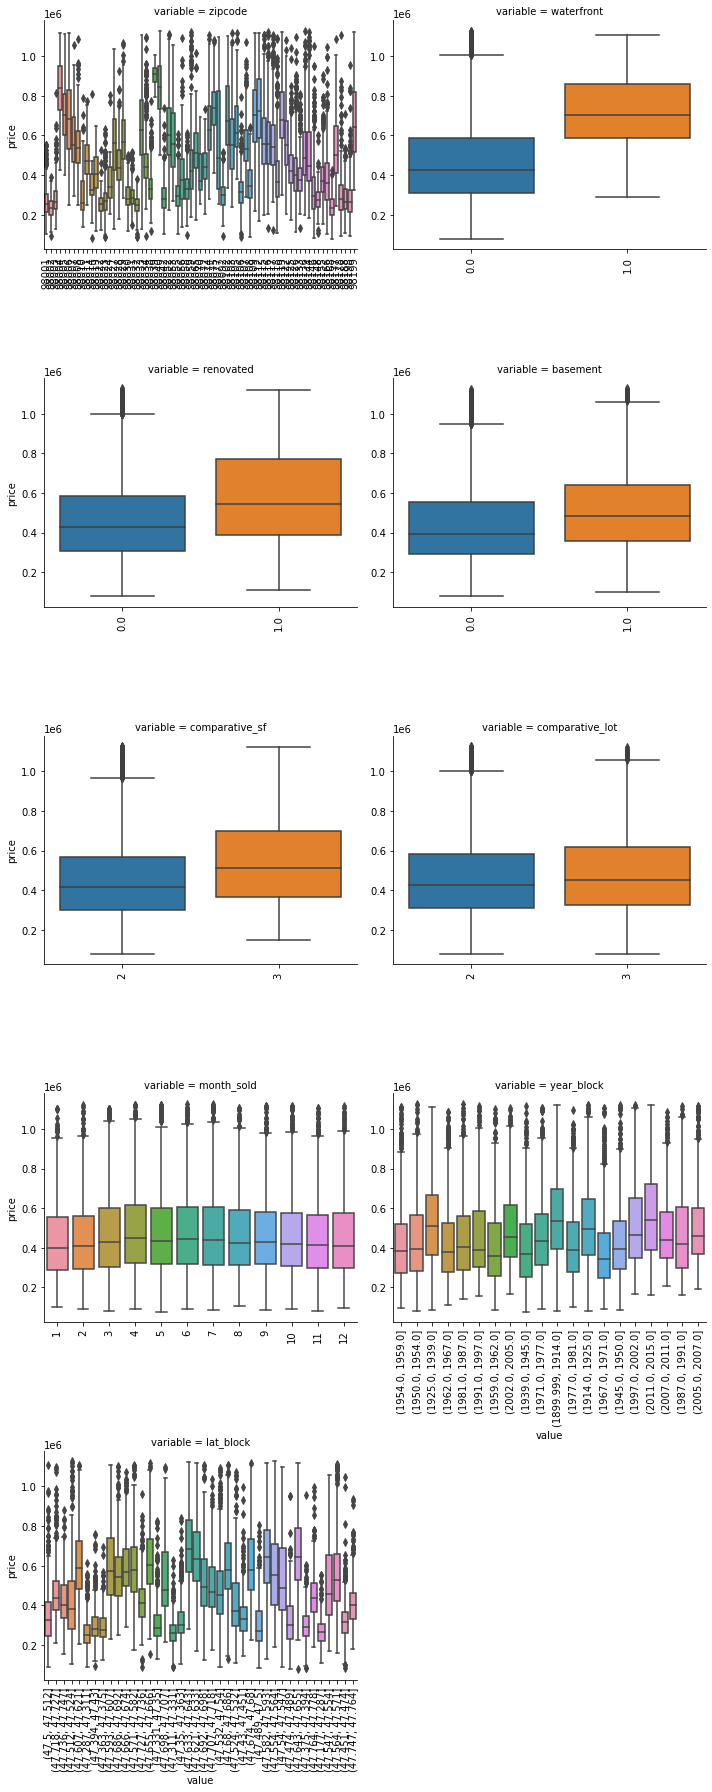

In [45]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categorical_preprocess, id_vars=['price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

Comparative_lot, which is a variable that we produced, does not look very important. But we'll save that for our model to determine. We can visually see the impact of several of our other categorical variables. Ultimately we can see with our own eyes why many of these categories work better as very large one-hot-encoded items rather than ordinal continuous variables, even with polynomial relationship.

In [46]:
# make a processed bins file for use with linear regression
df_categoricals_processed = pd.get_dummies(df_categorical_preprocess[categorical], prefix=categorical, drop_first=True)

In [47]:
df_categoricals_processed

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              1              0   
18061              0              0              0              0   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
1

### Continuous/Ordinal

In [48]:
df_continuous = df_cleaned[continuous]

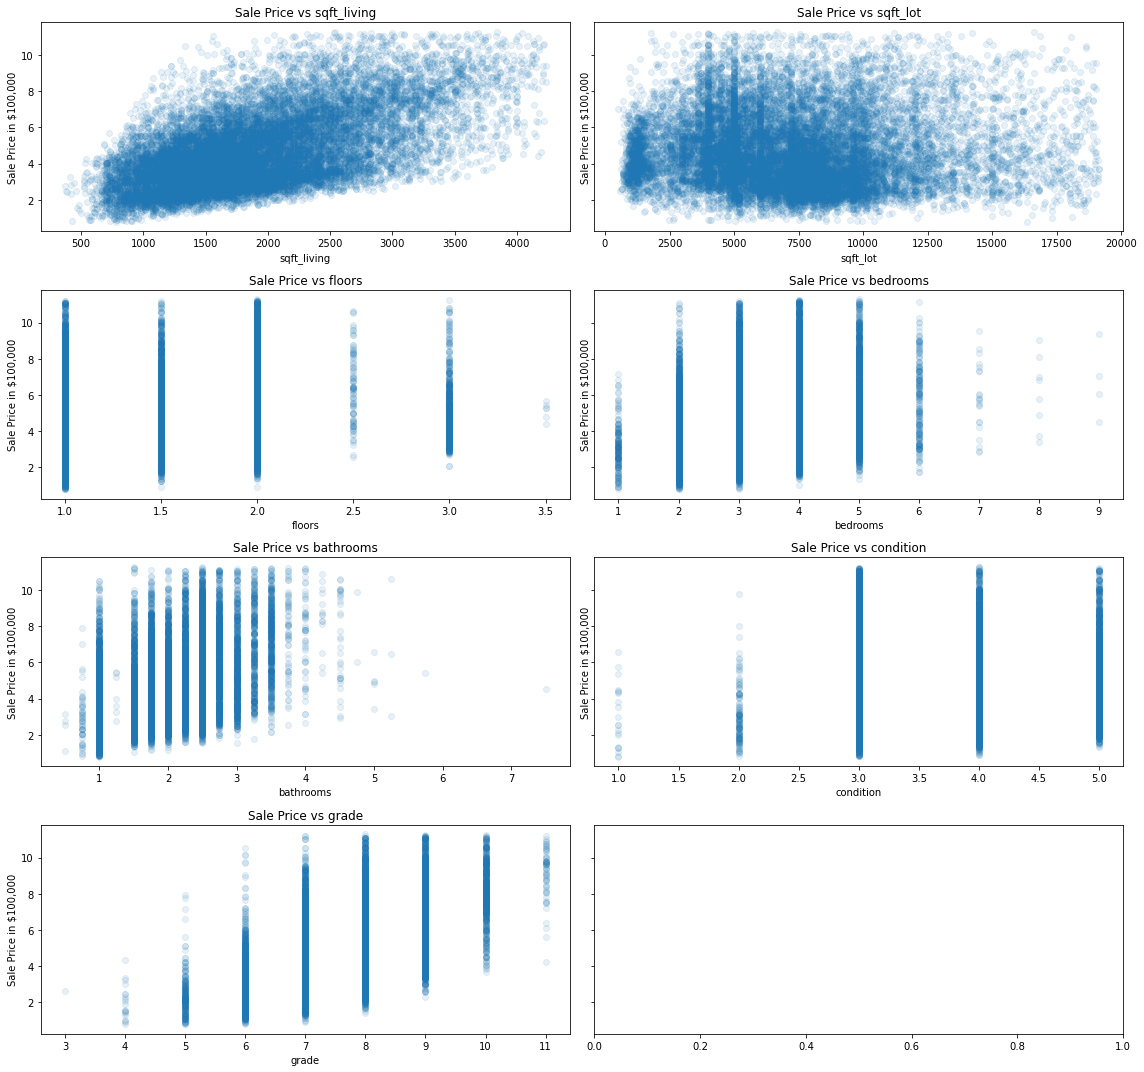

In [49]:
# check linearity

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


sqft_lot is tenuous on linearity. sqft_living has an obvious linear relationship. Bedrooms, condition, grade, and bathrooms relate linearly to price. Floor does not seem to relate very linearly.

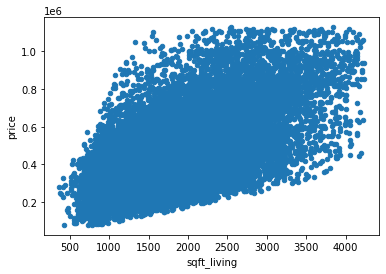

In [50]:
# sqft_living has the strongest and most obvious relationship to price thus far

data = pd.concat([df_cleaned['price'], df_continuous['sqft_living']], axis=1)
data.plot.scatter(x='sqft_living', y='price');


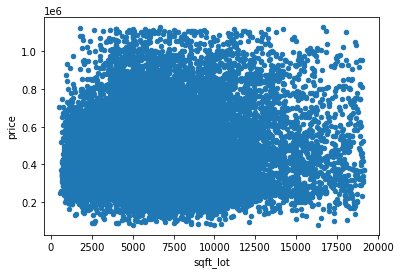

In [51]:
data = pd.concat([df_cleaned['price'], df_continuous['sqft_lot']], axis=1)
data.plot.scatter(x='sqft_lot', y='price');

# this variable does not appear to have a very linear relationship with the target variable.

Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and DEFINITELY worth keeping in our model.

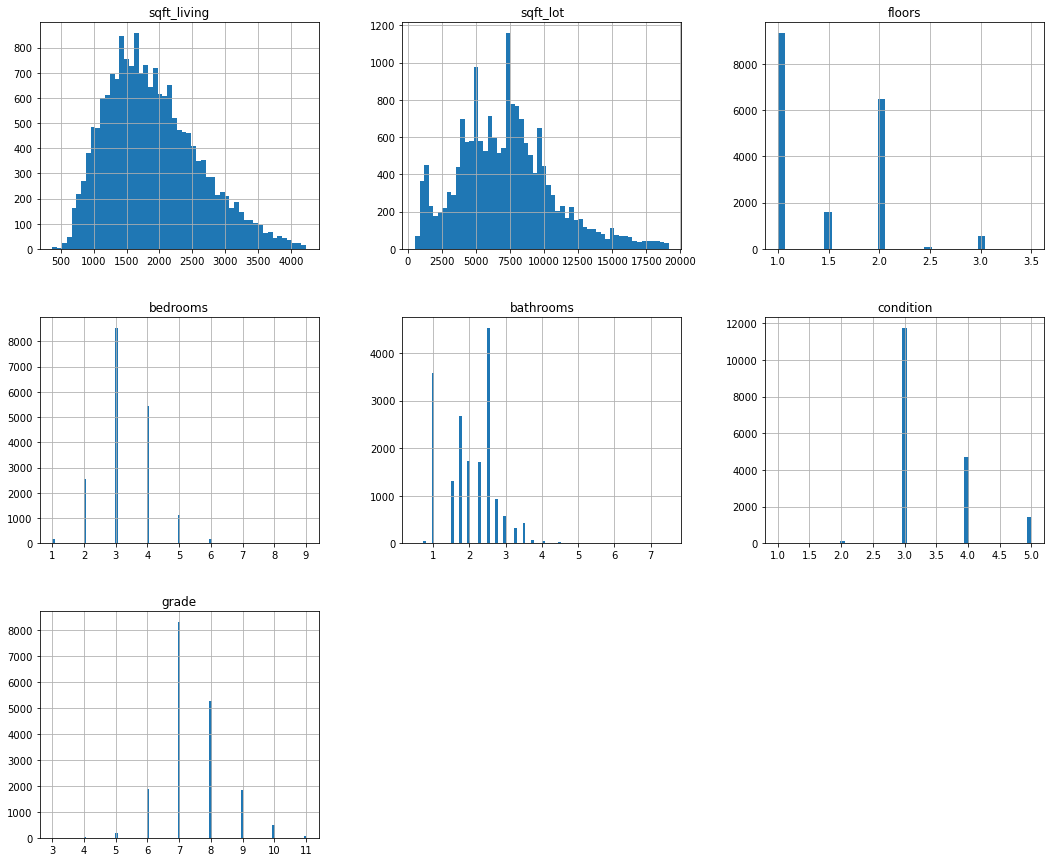

In [52]:
# check out our histograms

df_continuous.hist(figsize=(18,15), bins='auto');


In [53]:
# We're going to transform all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

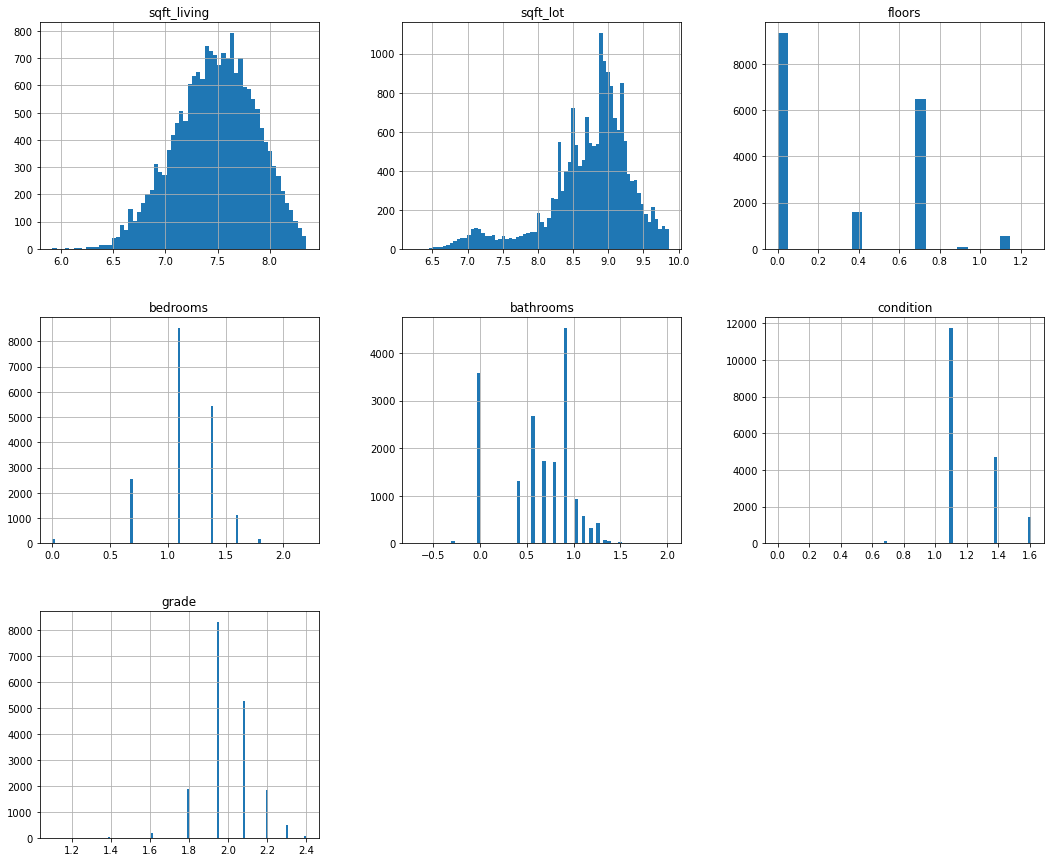

In [54]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks more normal

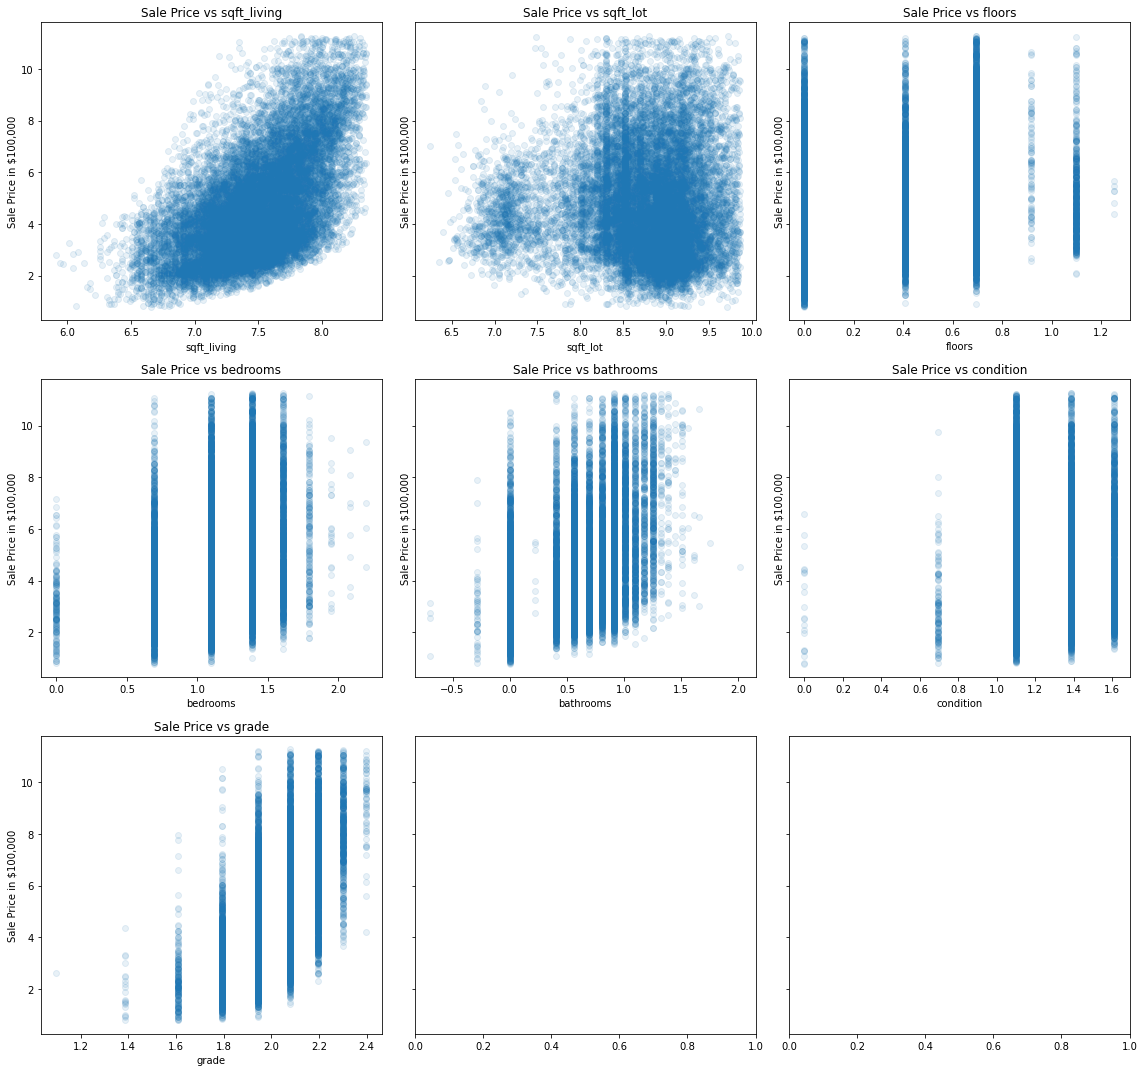

In [55]:
# check linearity

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous_log[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


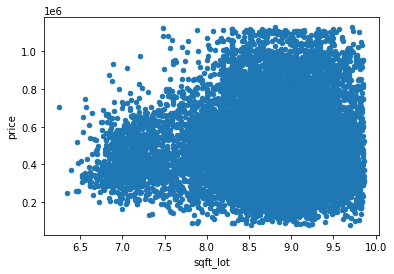

In [56]:
var = 'sqft_lot'
data = pd.concat([df_cleaned['price'], df_continuous_log[var]], axis=1)
data.plot.scatter(x=var, y='price');

# log transforming sqft_lot did not help much. This variable simply does not appear to have a great linear relationship with our target variable.

In [57]:
# standardize all of our values with scikit-learn StandardScaler

scaler = StandardScaler()

df_continuous_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous.columns)

In [58]:
df_continuous_standardized

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0        -1.063374 -0.164208 -0.917425 -0.216182  -1.671840  -0.618897   
1         0.972671  0.249135  1.046925 -0.216182   0.455846  -0.618897   
2        -2.179965  0.786436 -0.917425 -1.661296  -1.671840  -0.618897   
3         0.263915 -0.367710 -0.917425  0.809142   1.210655   2.216099   
4        -0.139298  0.431452 -0.917425 -0.216182   0.146812  -0.618897   
...            ...       ...       ...       ...        ...        ...   
18057    -0.383935 -2.842578  2.195997 -0.216182   0.732287  -0.618897   
18058     0.693684 -0.116851  1.046925  0.809142   0.732287  -0.618897   
18059    -1.444514 -2.547855  1.046925 -1.661296  -2.426649  -0.618897   
18060    -0.266919 -1.598174  1.046925 -0.216182   0.732287  -0.618897   
18061    -1.444514 -2.925585  1.046925 -1.661296  -2.426649  -0.618897   

          grade  
0     -0.430606  
1     -0.430606  
2     -1.620232  
3     -0.430606  
4      0.599895  
...         ...  
18057  0.599895  
18058  0.599895  
18059 -0.430606  
18060  0.599895  
18061 -0.430606  

[18062 rows x 7 columns]

## Final Prep for Linear Regression

Our dataframes to combine:
* df_target_log - log transformed target variable (price)
* df_categoricals_processed - one-hot encoded categorical variables
* df__continuous_standardized - log transformed and standardized continuous variables

In [59]:
preprocessed_scaled = pd.concat([df_target_log, df_continuous_standardized, df_categoricals_processed], axis=1)

In [60]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.314371    -1.063374 -0.164208 -0.917425 -0.216182  -1.671840   
1      13.198752     0.972671  0.249135  1.046925 -0.216182   0.455846   
2      12.102594    -2.179965  0.786436 -0.917425 -1.661296  -1.671840   
3      13.314467     0.263915 -0.367710 -0.917425  0.809142   1.210655   
4      13.144051    -0.139298  0.431452 -0.917425 -0.216182   0.146812   
...          ...          ...       ...       ...       ...        ...   
18057  12.801373    -0.383935 -2.842578  2.195997 -0.216182   0.732287   
18058  12.901103     0.693684 -0.116851  1.046925  0.809142   0.732287   
18059  12.911348    -1.444514 -2.547855  1.046925 -1.661296  -2.426649   
18060  12.901732    -0.266919 -1.598174  1.046925 -0.216182   0.732287   
18061  12.695971    -1.444514 -2.925585  1.046925 -1.661296  -2.426649   

       condition     grade  zipcode_98002  zipcode_98003  zipcode_98004  \
0      -0.618897 -0.430606              0              0              0   
1      -0.618897 -0.430606              0              0              0   
2      -0.618897 -1.620232              0              0              0   
3       2.216099 -0.430606              0              0              0   
4      -0.618897  0.599895              0              0              0   
...          ...       ...            ...            ...            ...   
18057  -0.618897  0.599895              0              0              0   
18058  -0.618897  0.599895              0              0              0   
18059  -0.618897 -0.430606              0              0              0   
18060  -0.618897  0.599895              0              0              0   
18061  -0.618897 -0.430606              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058      

In [61]:
# set our random seed for the notebook. We could randomize this each time the notebook is run, or whatevever,
# but ultimately we want all of our train/test splits to use the same data
randomstate = 42

In [62]:
# prepare linear regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [63]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Model Explorations

We're going to evaluate a few different variations of our linear regression model, as well as a few more complex model types. In order to keep track of our results, we'll be making a dictionary to store our model accuracy results.

In [356]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []
models['rmse'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [357]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     623.0
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:06:40   Log-Likelihood:                 5846.9
No. Observations:               14449   AIC:                        -1.139e+04
Df Residuals:                   14299   BIC:                        -1.026e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.4930      0.017    729.934      0.000      12.459      12.527
sqft_living                     0.1780      0.003     55.508      0.000       0.172       0.184
sqft_lot                        0.0743      0.003     27.308      0.000       0.069       0.080
floors                         -0.0094      0.002     -3.789      0.000      -0.014      -0.005
bedrooms                       -0.0126      0.002     -6.528      0.000      -0.016      -0.009
bathrooms                       0.0172      0.002      6.918      0.000       0.012       0.022
condition                       0.0363      0.002     23.076      0.000       0.033       0.039
grade                           0.0895      0.002     38.277      0.000       0.085       0.094
zipcode_98002                   0.0177      0.017      1.053      0.292      -0.015       0.051
zipcode_98003                   0.0351      0.015      2.308      0.021       0.005       0.065
zipcode_98004                   0.6360      0.043     14.822      0.000       0.552       0.720
zipcode_98005                   0.3527      0.043      8.117      0.000       0.267       0.438
zipcode_98006                   0.3364      0.038      8.864      0.000       0.262       0.411
zipcode_98007                   0.2380      0.043      5.497      0.000       0.153       0.323
zipcode_98008                   0.2620      0.042      6.250      0.000       0.180       0.344
zipcode_98010                   0.2059      0.029      7.076      0.000       0.149       0.263
zipcode_98011                   0.2619      0.049      5.398      0.000       0.167       0.357
zipcode_98014                  -0.0397      0.052     -0.765      0.444      -0.141       0.062
zipcode_98019                   0.0429      0.049      0.879      0.379      -0.053       0.138
zipcode_98022                   0.0466      0.020      2.323      0.020       0.007       0.086
zipcode_98023                   0.0248      0.015      1.698      0.089      -0.004       0.053
zipcode_98024                   0.0386      0.050      0.779      0.436      -0.059       0.136
zipcode_98027                   0.3703      0.038      9.817      0.000       0.296       0.444
zipcode_98028                   0.2187      0.048      4.563      0.000       0.125       0.313
zipcode_98029                   0.2972      0.038      7.778      0.000       0.222       0.372
zipcode_98030                   0.0283      0.020      1.385      0.166      -0.012       0.068
zipcode_98031                   0.0594      0.024      2.455      0.014       0.012       0.107
zipcode_98032                  -0.0091      0.024     -0.378      0.706      -0.057       0.038
zipcode_98033                   0.3741      0.045      8.318      0.000       0.286       0.462
zipcode_980

Perform cross-validation with our base model over 5 splits and get our mean R^2.

In [80]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8628919743668926

In [81]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

149 predictors used for this model


In [82]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

Actual  Predicted
2848   550000     347613
17729  472453     455297
15853  817317     590132
5921   424735     433771
11102  572283     413497
...       ...        ...
10663  776344     814118
7666   848220     836978
1236   706286     562638
2900   409535     389362
9630   418468     446250

[3613 rows x 2 columns]

<AxesSubplot:xlabel='Actual', ylabel='residuals'>

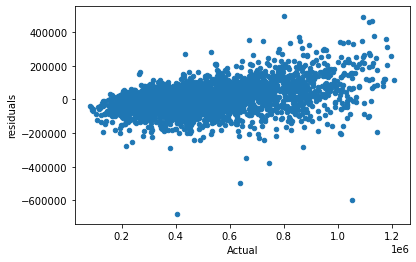

In [83]:
predicted_prices_basiclr["residuals"] = predicted_prices_basiclr["Actual"] - predicted_prices_basiclr["Predicted"]
predicted_prices_basiclr.plot(x = "Actual", y = "residuals",kind = "scatter")

# our residuals show some heteroskedasticity

In [84]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

55502.13

In [85]:
rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_unscaled)), 2)
rmse

80123.77

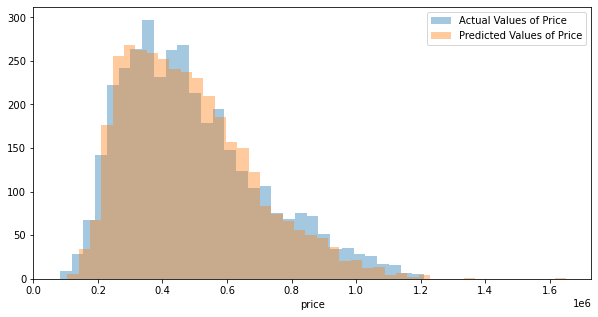

In [86]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [87]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Study Residuals

In [88]:
# We need our statsmodels model again to plot residuals
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()

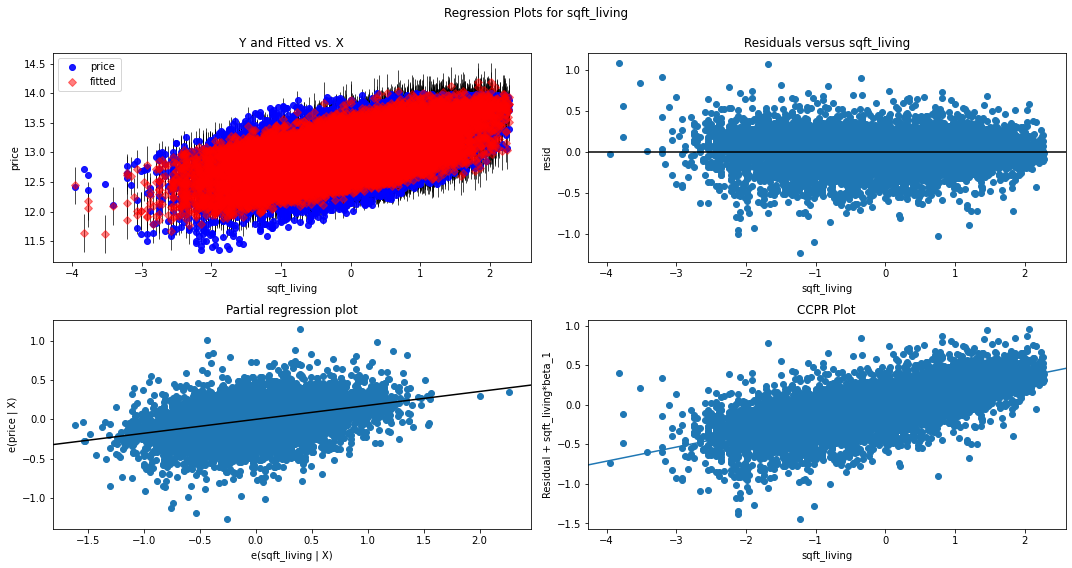

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

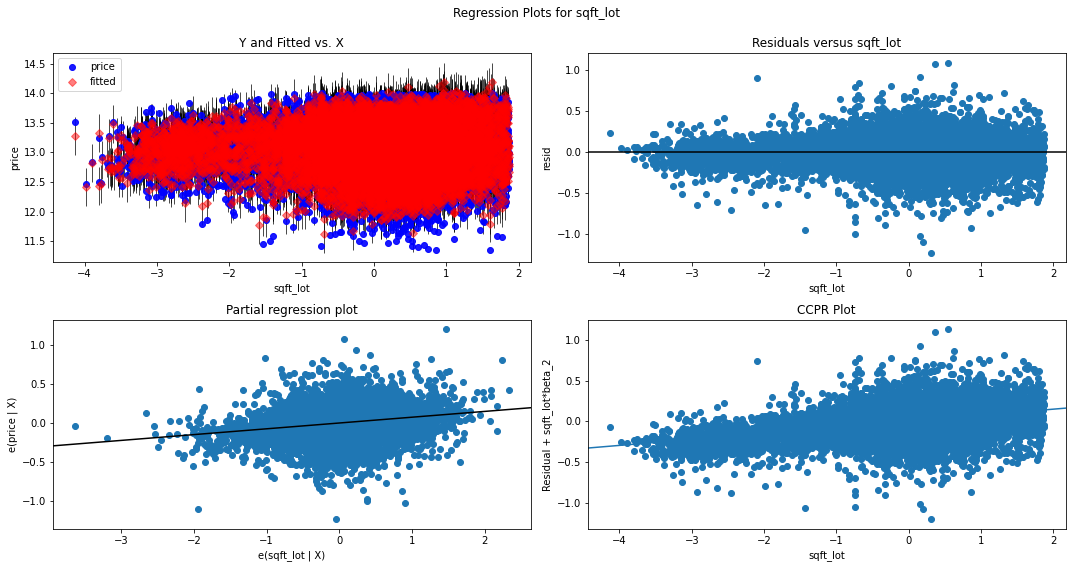

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

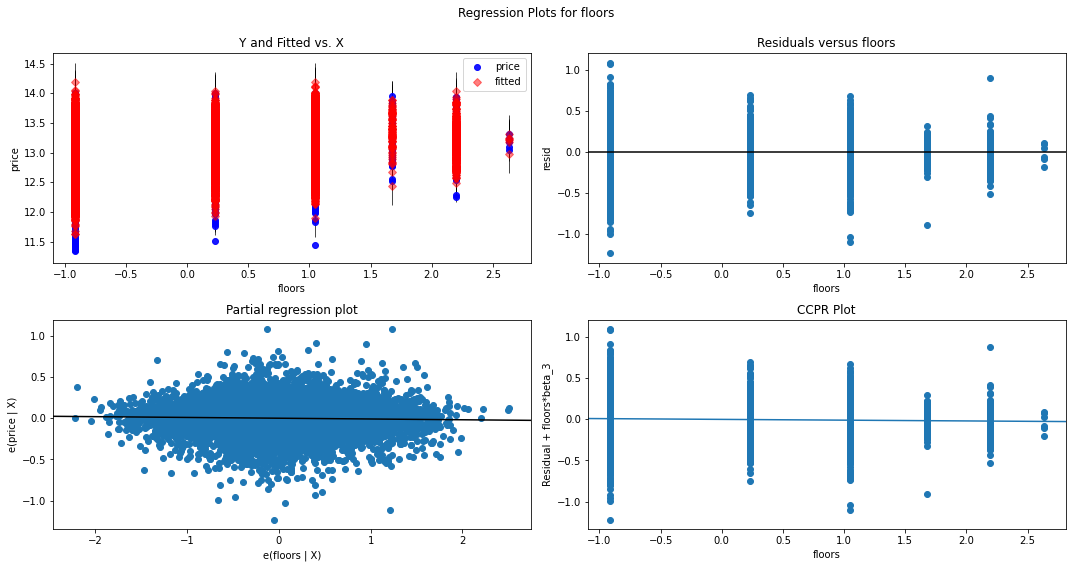

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

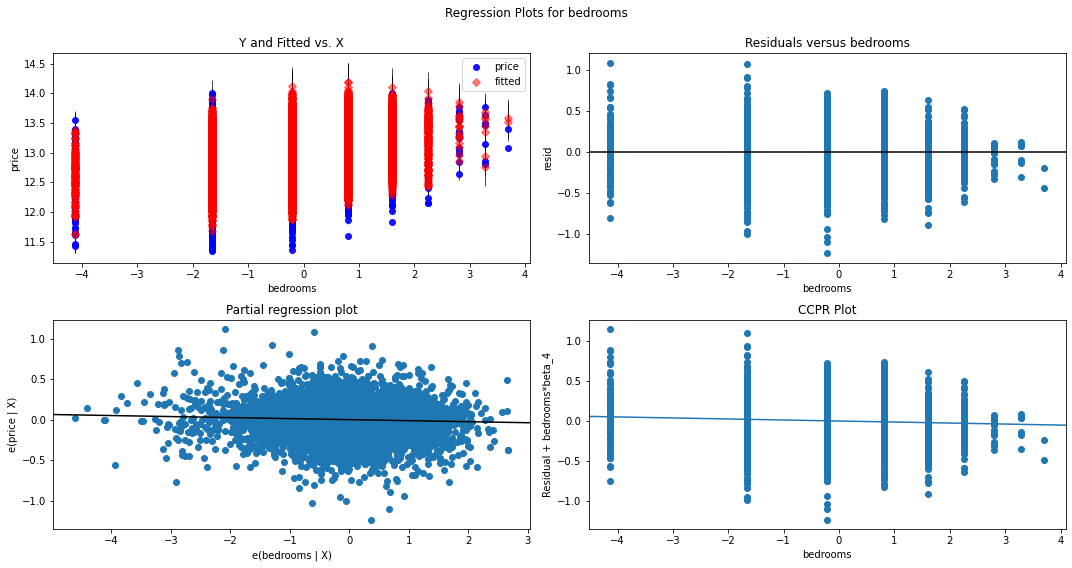

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

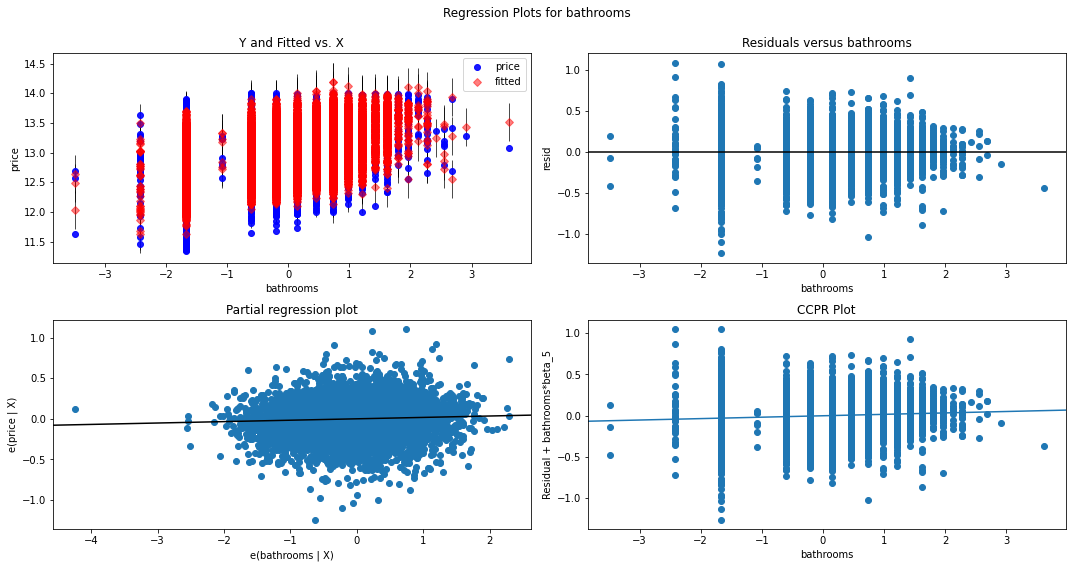

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

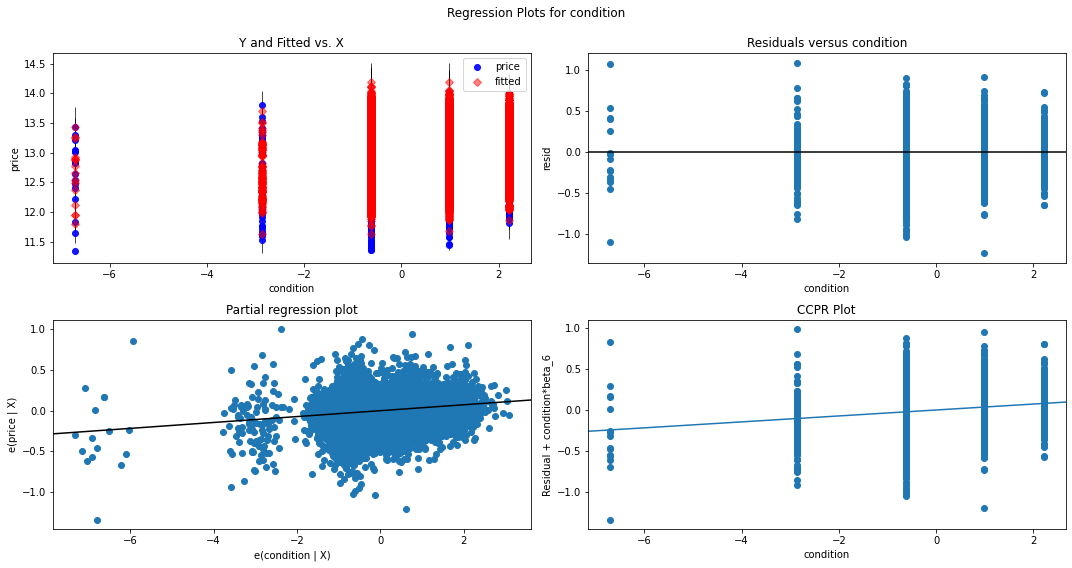

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

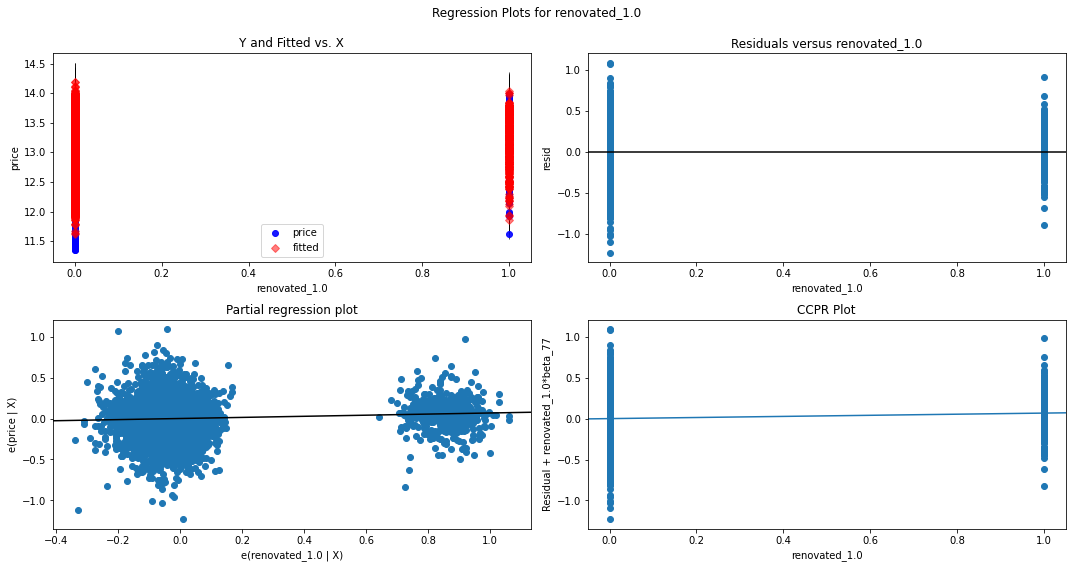

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

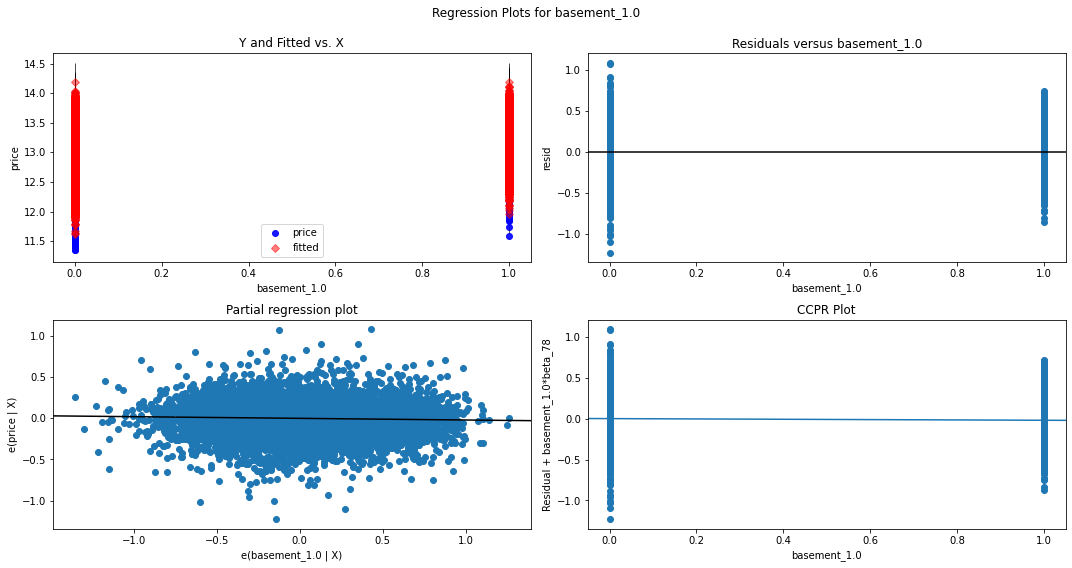

In [96]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

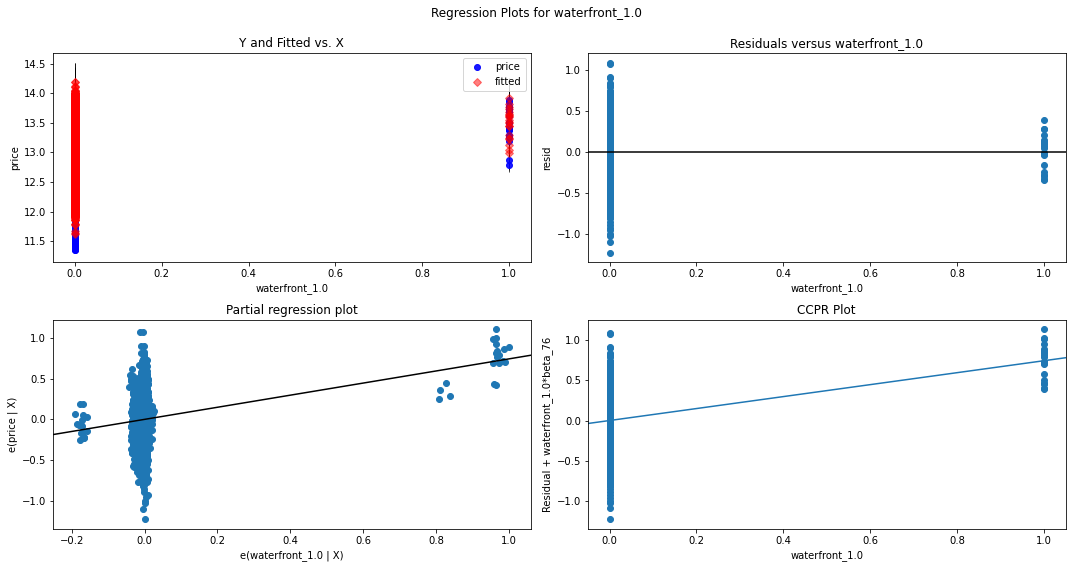

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

### Find/Add Interactions

I wrote a function which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [98]:
def test_feature_combinations(price, variables):
    
    """Function takes in target price and a dataframe of independent variables, and 
    tests model improvement for each combination of variables"""
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(variables.columns)

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = price
    
    # prepare our x-value with our independent variables. We do an initial split here in order to run a 
    # linear regression to get a base r^2 on our basic model without interactions
    X = variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
    base_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        variables['test_interaction'] = variables[feat1] * variables[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = variables
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [99]:
# running our function on our continuous variables to look for improvement
# our R2 is much lower for model base score because we aren't including our categorical variables in this improvement assessment

scoring_df = test_feature_combinations(df_target_log, df_continuous_standardized)

Model base score is  0.4579
sqft_living sqft_lot 0.458
sqft_living floors 0.4615
sqft_living bedrooms 0.464
sqft_living bathrooms 0.4657
sqft_living condition 0.46
sqft_living grade 0.4652
sqft_lot floors 0.4639
sqft_lot bedrooms 0.4583
sqft_lot bathrooms 0.4635
sqft_lot condition 0.4616
sqft_lot grade 0.4603
floors bedrooms 0.4633
floors bathrooms 0.4579
floors condition 0.4641
floors grade 0.4592
bedrooms bathrooms 0.4643
bedrooms condition 0.4585
bedrooms grade 0.4644
bathrooms condition 0.4627
bathrooms grade 0.4618
condition grade 0.4599


In [100]:
# showing our improvement scores for our interactions

scoring_df.sort_values('improvement', ascending=False)

feature1   feature2  scores  improvement
3   sqft_living  bathrooms  0.4657       0.0078
5   sqft_living      grade  0.4652       0.0073
17     bedrooms      grade  0.4644       0.0065
15     bedrooms  bathrooms  0.4643       0.0064
13       floors  condition  0.4641       0.0062
2   sqft_living   bedrooms  0.4640       0.0061
6      sqft_lot     floors  0.4639       0.0060
8      sqft_lot  bathrooms  0.4635       0.0056
11       floors   bedrooms  0.4633       0.0054
18    bathrooms  condition  0.4627       0.0048
19    bathrooms      grade  0.4618       0.0039
9      sqft_lot  condition  0.4616       0.0037
1   sqft_living     floors  0.4615       0.0036
10     sqft_lot      grade  0.4603       0.0024
4   sqft_living  condition  0.4600       0.0021
20    condition      grade  0.4599       0.0020
14       floors      grade  0.4592       0.0013
16     bedrooms  condition  0.4585       0.0006
7      sqft_lot   bedrooms  0.4583       0.0004
0   sqft_living   sqft_lot  0.4580       0.0001
12       floors  bathrooms  0.4579       0.0000

We won't add any interactions. None of these improvements were significant enough.

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

This model takes quite some time to run, so is commented out with the results replicated in markdown following.

In [101]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)
'''

result = ['grade', 'sqft_living', 'year_block_(1914.0, 1925.0]', 'lat_block_(47.375, 47.394]', 'lat_block_(47.394, 47.43]', 'lat_block_(47.43, 47.451]', 'condition', 'lat_block_(47.451, 47.474]', 'lat_block_(47.363, 47.375]', 'lat_block_(47.35, 47.363]', 'lat_block_(47.489, 47.5]', 'lat_block_(47.474, 47.489]', 'lat_block_(47.5, 47.512]', 'lat_block_(47.331, 47.35]', 'zipcode_98004', 'zipcode_98106', 'year_block_(1925.0, 1939.0]', 'lat_block_(47.655, 47.666]', 'lat_block_(47.633, 47.643]', 'lat_block_(47.674, 47.68]', 'lat_block_(47.643, 47.655]', 'lat_block_(47.666, 47.674]', 'lat_block_(47.68, 47.686]', 'zipcode_98040', 'waterfront_1.0', 'lat_block_(47.607, 47.621]', 'lat_block_(47.621, 47.633]', 'lat_block_(47.686, 47.692]', 'zipcode_98116', 'zipcode_98074', 'lat_block_(47.593, 47.607]', 'lat_block_(47.692, 47.698]', 'zipcode_98006', 'zipcode_98136', 'lat_block_(47.582, 47.593]', 'lat_block_(47.698, 47.707]', 'zipcode_98168', 'lat_block_(47.707, 47.718]', 'sqft_lot', 'zipcode_98027', 'zipcode_98014', 'year_block_(2011.0, 2015.0]', 'bedrooms', 'zipcode_98059', 'zipcode_98166', 'lat_block_(47.718, 47.727]', 'lat_block_(47.571, 47.582]', 'lat_block_(47.554, 47.564]', 'lat_block_(47.564, 47.571]', 'comparative_sf_3', 'lat_block_(47.547, 47.554]', 'zipcode_98108', 'lat_block_(47.54, 47.547]', 'lat_block_(47.727, 47.736]', 'lat_block_(47.532, 47.54]', 'zipcode_98177', 'zipcode_98032', 'renovated_1.0', 'zipcode_98019', 'zipcode_98075', 'lat_block_(47.524, 47.532]', 'lat_block_(47.736, 47.747]', 'lat_block_(47.747, 47.764]', 'lat_block_(47.764, 47.778]', 'lat_block_(47.512, 47.524]', 'basement_1.0', 'bathrooms', 'zipcode_98133', 'year_block_(1971.0, 1977.0]', 'year_block_(1962.0, 1967.0]', 'year_block_(1977.0, 1981.0]', 'year_block_(1959.0, 1962.0]', 'year_block_(1954.0, 1959.0]', 'year_block_(1967.0, 1971.0]', 'month_sold_4', 'zipcode_98112', 'zipcode_98119', 'zipcode_98102', 'zipcode_98109', 'zipcode_98024', 'zipcode_98010', 'zipcode_98038', 'month_sold_5', 'month_sold_6', 'zipcode_98039', 'zipcode_98103', 'zipcode_98117', 'zipcode_98115', 'comparative_lot_3', 'year_block_(2007.0, 2011.0]', 'zipcode_98122', 'zipcode_98199', 'zipcode_98105', 'zipcode_98107', 'zipcode_98033', 'month_sold_7', 'month_sold_3', 'zipcode_98188', 'zipcode_98070', 'zipcode_98198', 'floors', 'year_block_(1950.0, 1954.0]', 'month_sold_8', 'zipcode_98005', 'zipcode_98146', 'zipcode_98126', 'zipcode_98144', 'zipcode_98029', 'zipcode_98028', 'zipcode_98056', 'month_sold_9', 'year_block_(1981.0, 1987.0]', 'year_block_(1987.0, 1991.0]', 'year_block_(1945.0, 1950.0]', 'year_block_(1991.0, 1997.0]']

['grade', 'sqft_living', 'year_block_(1914.0, 1925.0]', 'lat_block_(47.375, 47.394]', 'lat_block_(47.394, 47.43]', 'lat_block_(47.43, 47.451]', 'condition', 'lat_block_(47.451, 47.474]', 'lat_block_(47.363, 47.375]', 'lat_block_(47.35, 47.363]', 'lat_block_(47.489, 47.5]', 'lat_block_(47.474, 47.489]', 'lat_block_(47.5, 47.512]', 'lat_block_(47.331, 47.35]', 'zipcode_98004', 'zipcode_98106', 'year_block_(1925.0, 1939.0]', 'lat_block_(47.655, 47.666]', 'lat_block_(47.633, 47.643]', 'lat_block_(47.674, 47.68]', 'lat_block_(47.643, 47.655]', 'lat_block_(47.666, 47.674]', 'lat_block_(47.68, 47.686]', 'zipcode_98040', 'waterfront_1.0', 'lat_block_(47.607, 47.621]', 'lat_block_(47.621, 47.633]', 'lat_block_(47.686, 47.692]', 'zipcode_98116', 'zipcode_98074', 'lat_block_(47.593, 47.607]', 'lat_block_(47.692, 47.698]', 'zipcode_98006', 'zipcode_98136', 'lat_block_(47.582, 47.593]', 'lat_block_(47.698, 47.707]', 'zipcode_98168', 'lat_block_(47.707, 47.718]', 'sqft_lot', 'zipcode_98027', 'zipcode_98014', 'year_block_(2011.0, 2015.0]', 'bedrooms', 'zipcode_98059', 'zipcode_98166', 'lat_block_(47.718, 47.727]', 'lat_block_(47.571, 47.582]', 'lat_block_(47.554, 47.564]', 'lat_block_(47.564, 47.571]', 'comparative_sf_3', 'lat_block_(47.547, 47.554]', 'zipcode_98108', 'lat_block_(47.54, 47.547]', 'lat_block_(47.727, 47.736]', 'lat_block_(47.532, 47.54]', 'zipcode_98177', 'zipcode_98032', 'renovated_1.0', 'zipcode_98019', 'zipcode_98075', 'lat_block_(47.524, 47.532]', 'lat_block_(47.736, 47.747]', 'lat_block_(47.747, 47.764]', 'lat_block_(47.764, 47.778]', 'lat_block_(47.512, 47.524]', 'basement_1.0', 'bathrooms', 'zipcode_98133', 'year_block_(1971.0, 1977.0]', 'year_block_(1962.0, 1967.0]', 'year_block_(1977.0, 1981.0]', 'year_block_(1959.0, 1962.0]', 'year_block_(1954.0, 1959.0]', 'year_block_(1967.0, 1971.0]', 'month_sold_4', 'zipcode_98112', 'zipcode_98119', 'zipcode_98102', 'zipcode_98109', 'zipcode_98024', 'zipcode_98010', 'zipcode_98038', 'month_sold_5', 'month_sold_6', 'zipcode_98039', 'zipcode_98103', 'zipcode_98117', 'zipcode_98115', 'comparative_lot_3', 'year_block_(2007.0, 2011.0]', 'zipcode_98122', 'zipcode_98199', 'zipcode_98105', 'zipcode_98107', 'zipcode_98033', 'month_sold_7', 'month_sold_3', 'zipcode_98188', 'zipcode_98070', 'zipcode_98198', 'floors', 'year_block_(1950.0, 1954.0]', 'month_sold_8', 'zipcode_98005', 'zipcode_98146', 'zipcode_98126', 'zipcode_98144', 'zipcode_98029', 'zipcode_98028', 'zipcode_98056', 'month_sold_9', 'year_block_(1981.0, 1987.0]', 'year_block_(1987.0, 1991.0]', 'year_block_(1945.0, 1950.0]', 'year_block_(1991.0, 1997.0]']

In [102]:
# Run our linear regression again, using only the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     803.8
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:30:13   Log-Likelihood:                 5805.8
No. Observations:               14449   AIC:                        -1.138e+04
Df Residuals:                   14333   BIC:                        -1.050e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5276      0.006   1983.878      0.000      12.515      12.540
grade                           0.0906      0.002     40.650      0.000       0.086       0.095
sqft_living                     0.1789      0.003     56.572      0.000       0.173       0.185
year_block_(1914.0, 1925.0]     0.0169      0.007      2.419      0.016       0.003       0.031
lat_block_(47.375, 47.394]      0.0554      0.011      5.102      0.000       0.034       0.077
lat_block_(47.394, 47.43]       0.1171      0.011     11.096      0.000       0.096       0.138
lat_block_(47.43, 47.451]       0.1910      0.010     18.295      0.000       0.170       0.211
condition                       0.0358      0.002     23.834      0.000       0.033       0.039
lat_block_(47.451, 47.474]      0.1740      0.011     16.077      0.000       0.153       0.195
lat_block_(47.363, 47.375]      0.0614      0.011      5.767      0.000       0.041       0.082
lat_block_(47.35, 47.363]       0.0695      0.011      6.311      0.000       0.048       0.091
lat_block_(47.489, 47.5]        0.1913      0.012     16.287      0.000       0.168       0.214
lat_block_(47.474, 47.489]      0.1720      0.012     14.276      0.000       0.148       0.196
lat_block_(47.5, 47.512]        0.2380      0.012     19.768      0.000       0.214       0.262
lat_block_(47.331, 47.35]       0.0695      0.010      6.947      0.000       0.050       0.089
zipcode_98004                   0.3879      0.017     23.036      0.000       0.355       0.421
zipcode_98106                  -0.0973      0.012     -8.300      0.000      -0.120      -0.074
year_block_(1925.0, 1939.0]     0.0228      0.007      3.204      0.001       0.009       0.037
lat_block_(47.655, 47.666]      0.7639      0.012     62.782      0.000       0.740       0.788
lat_block_(47.633, 47.643]      0.7413      0.013     58.532      0.000       0.716       0.766
lat_block_(47.674, 47.68]       0.7377      0.013     58.928      0.000       0.713       0.762
lat_block_(47.643, 47.655]      0.7297      0.013     56.397      0.000       0.704       0.755
lat_block_(47.666, 47.674]      0.7306      0.014     53.805      0.000       0.704       0.757
lat_block_(47.68, 47.686]       0.7109      0.012     58.026      0.000       0.687       0.735
zipcode_98040                   0.3424      0.017     20.670      0.000       0.310       0.375
waterfront_1.0                  0.7472      0.037     19.996      0.000       0.674       0.820
lat_block_(47.607, 47.621]      0.7312      0.013     56.969      0.000       0.706       0.756
lat_block_(47.621, 47.633]      0.7208      0.012     58.445      0.000       0.697       0.745
lat_block_(47.686, 47.692]      0.6466      0.012     52.705      0.000       0.623       0.671
zipcode_981

In [103]:
print("{} predictors used".format(len(result)))

115 predictors used


In [104]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8627965360116491

In [105]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

Actual  Predicted
2848   550000     348759
17729  472453     457851
15853  817317     590876
5921   424735     426757
11102  572283     414561
...       ...        ...
10663  776344     820742
7666   848220     833671
1236   706286     563438
2900   409535     387426
9630   418468     444644

[3613 rows x 2 columns]

In [106]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

55582.07

In [107]:
rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_refined_unscaled)), 2)
rmse

80235.02

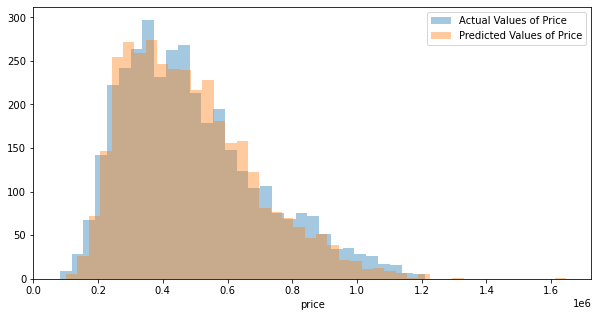

In [108]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_refined_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [109]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklearn LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [110]:
import eli5
from eli5.sklearn import PermutationImportance

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [111]:
# sorted list of relative feature importance via permutation importance - bottom 30 features

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)


0         1
119                zipcode_98042  0.000452
120  year_block_(2007.0, 2011.0]  0.000409
121                 month_sold_9  0.000405
122    lat_block_(47.43, 47.451]  0.000380
123   lat_block_(47.375, 47.394]  0.000320
124     lat_block_(47.489, 47.5]  0.000281
125  year_block_(1925.0, 1939.0]  0.000230
126                zipcode_98003  0.000165
127                zipcode_98019  0.000162
128                month_sold_10  0.000132
129                zipcode_98023  0.000127
130                zipcode_98022  0.000107
131  year_block_(1914.0, 1925.0]  0.000103
132  year_block_(1939.0, 1945.0]  0.000097
133                month_sold_11  0.000087
134                 month_sold_2  0.000080
135                zipcode_98030  0.000080
136  year_block_(2002.0, 2005.0]  0.000064
137   lat_block_(47.474, 47.489]  0.000063
138   lat_block_(47.311, 47.331]  0.000056
139   lat_block_(47.451, 47.474]  0.000054
140                zipcode_98014  0.000045
141                zipcode_98002  0.000045
142                zipcode_98092  0.000034
143                zipcode_98024  0.000027
144                month_sold_12  0.000024
145  year_block_(2005.0, 2007.0]  0.000015
146   lat_block_(47.287, 47.311]  0.000015
147  year_block_(1997.0, 2002.0]  0.000014
148                zipcode_98032  0.000002

One thing that permutation importance does NOT do is help us pick how many features we should use. So we will just use 109, like our forward-backward selector.

In [112]:
result_eli5 = list(eli[:115][0])

In [113]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     799.0
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:30:18   Log-Likelihood:                 5767.7
No. Observations:               14449   AIC:                        -1.130e+04
Df Residuals:                   14333   BIC:                        -1.042e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5523      0.005   2557.140      0.000      12.543      12.562
sqft_living                     0.1805      0.003     56.859      0.000       0.174       0.187
grade                           0.0891      0.002     40.395      0.000       0.085       0.093
lat_block_(47.655, 47.666]      0.5000      0.018     28.273      0.000       0.465       0.535
zipcode_98103                   0.4387      0.017     25.589      0.000       0.405       0.472
lat_block_(47.633, 47.643]      0.4859      0.018     27.224      0.000       0.451       0.521
lat_block_(47.643, 47.655]      0.4666      0.017     27.024      0.000       0.433       0.500
lat_block_(47.607, 47.621]      0.4827      0.019     25.229      0.000       0.445       0.520
lat_block_(47.674, 47.68]       0.4735      0.018     26.276      0.000       0.438       0.509
lat_block_(47.666, 47.674]      0.4671      0.019     24.912      0.000       0.430       0.504
lat_block_(47.621, 47.633]      0.4671      0.018     25.661      0.000       0.431       0.503
zipcode_98117                   0.4308      0.018     24.252      0.000       0.396       0.466
zipcode_98115                   0.4187      0.018     23.837      0.000       0.384       0.453
sqft_lot                        0.0691      0.002     28.512      0.000       0.064       0.074
lat_block_(47.68, 47.686]       0.4464      0.018     24.918      0.000       0.411       0.481
lat_block_(47.593, 47.607]      0.4355      0.018     24.076      0.000       0.400       0.471
lat_block_(47.582, 47.593]      0.4424      0.017     25.386      0.000       0.408       0.477
lat_block_(47.554, 47.564]      0.4059      0.016     25.433      0.000       0.375       0.437
lat_block_(47.564, 47.571]      0.3960      0.015     25.684      0.000       0.366       0.426
lat_block_(47.686, 47.692]      0.3818      0.018     21.578      0.000       0.347       0.416
lat_block_(47.571, 47.582]      0.3789      0.017     22.927      0.000       0.346       0.411
lat_block_(47.707, 47.718]      0.3749      0.017     22.306      0.000       0.342       0.408
lat_block_(47.547, 47.554]      0.3501      0.016     22.090      0.000       0.319       0.381
lat_block_(47.698, 47.707]      0.3605      0.016     21.949      0.000       0.328       0.393
zipcode_98116                   0.4107      0.018     23.157      0.000       0.376       0.445
zipcode_98136                   0.4558      0.018     25.948      0.000       0.421       0.490
zipcode_98004                   0.6167      0.022     28.427      0.000       0.574       0.659
zipcode_98199                   0.4209      0.019     21.762      0.000       0.383       0.459
zipcode_98107                   0.4199      0.021     20.451      0.000       0.380       0.460
lat_block_(

In [114]:
model = LinearRegression()
model.fit(X_eli5, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8620932357357246

In [115]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

Actual  Predicted
2848   550000     345377
17729  472453     450204
15853  817317     588128
5921   424735     433210
11102  572283     412542
...       ...        ...
10663  776344     809897
7666   848220     837914
1236   706286     564733
2900   409535     392352
9630   418468     451019

[3613 rows x 2 columns]

In [116]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

55998.38

In [117]:
rmse = round(np.sqrt(mean_squared_error(test_actual, eli5_predictions_unscaled)), 2)
rmse

80437.52

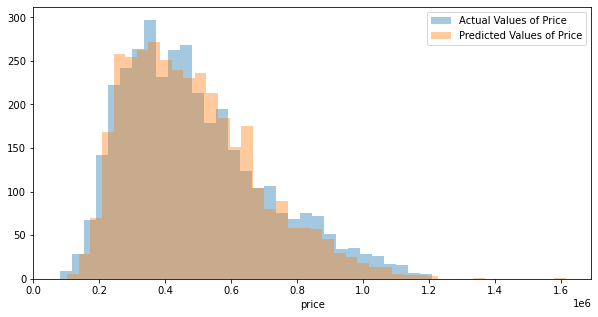

In [118]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(eli5_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

This also did not improve on our basic linear regression using all features.

In [119]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Recursive Feature Elimination with Cross Validation - Linear Regression

RFECV uses the model's scores to determine how many and which features should be included in the model. It also has integrated cross-validation, so it's a great one-step tool. RFECV is not a model itself! It takes an estimator as a parameter to use in its testing.

In [120]:
# Using sklearn RFECV to perform integrated CV while picking the number of features
# picks the number of features itself

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_root_mean_squared_error')

rfecv.fit(X_train_val, y_train_val)

RFECV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='neg_root_mean_squared_error')

In [121]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 144


In [122]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

# The fearures that RFECV did not use
dset[dset['used']==False]

attr   used
90                 month_sold_12  False
105  year_block_(1997.0, 2002.0]  False
106  year_block_(2002.0, 2005.0]  False
107  year_block_(2005.0, 2007.0]  False
110   lat_block_(47.287, 47.311]  False

In [123]:
# make a list of the features used in the rfecv
rfecv_result = list(dset[(dset['used'] == True)]['attr'])

In [124]:
# Run our linear regression again in statsmodels, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     644.8
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:30:41   Log-Likelihood:                 5845.9
No. Observations:               14449   AIC:                        -1.140e+04
Df Residuals:                   14304   BIC:                        -1.030e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.4988      0.013    982.431      0.000      12.474      12.524
sqft_living                     0.1779      0.003     55.632      0.000       0.172       0.184
sqft_lot                        0.0737      0.003     28.425      0.000       0.069       0.079
floors                         -0.0092      0.002     -3.730      0.000      -0.014      -0.004
bedrooms                       -0.0127      0.002     -6.572      0.000      -0.017      -0.009
bathrooms                       0.0177      0.002      7.372      0.000       0.013       0.022
condition                       0.0360      0.002     23.617      0.000       0.033       0.039
grade                           0.0898      0.002     39.676      0.000       0.085       0.094
zipcode_98002                   0.0163      0.017      0.981      0.327      -0.016       0.049
zipcode_98003                   0.0354      0.015      2.334      0.020       0.006       0.065
zipcode_98004                   0.6375      0.043     14.873      0.000       0.554       0.722
zipcode_98005                   0.3544      0.043      8.165      0.000       0.269       0.439
zipcode_98006                   0.3377      0.038      8.904      0.000       0.263       0.412
zipcode_98007                   0.2396      0.043      5.539      0.000       0.155       0.324
zipcode_98008                   0.2636      0.042      6.298      0.000       0.182       0.346
zipcode_98010                   0.2049      0.029      7.077      0.000       0.148       0.262
zipcode_98011                   0.2631      0.048      5.424      0.000       0.168       0.358
zipcode_98014                  -0.0372      0.052     -0.718      0.473      -0.139       0.064
zipcode_98019                   0.0444      0.049      0.912      0.362      -0.051       0.140
zipcode_98022                   0.0495      0.019      2.637      0.008       0.013       0.086
zipcode_98023                   0.0227      0.014      1.632      0.103      -0.005       0.050
zipcode_98024                   0.0401      0.050      0.810      0.418      -0.057       0.137
zipcode_98027                   0.3714      0.038      9.856      0.000       0.298       0.445
zipcode_98028                   0.2198      0.048      4.588      0.000       0.126       0.314
zipcode_98029                   0.2992      0.038      7.843      0.000       0.224       0.374
zipcode_98030                   0.0282      0.020      1.385      0.166      -0.012       0.068
zipcode_98031                   0.0597      0.024      2.469      0.014       0.012       0.107
zipcode_98032                  -0.0092      0.024     -0.381      0.703      -0.057       0.038
zipcode_98033                   0.3758      0.045      8.364      0.000       0.288       0.464
zipcode_980

In [125]:
# getting the r2 score of our best feature set
r2 = model.rsquared
r2

0.8665078418119834

RFECV still includes features with a p-value over .05. Overall though, accuracy is just about the same as the other feature selection methods that we have tried.

We can plot the change in our R^2 score as we add features to the model. We can see that around 110 features, there isn't a lot of improvement to the model.

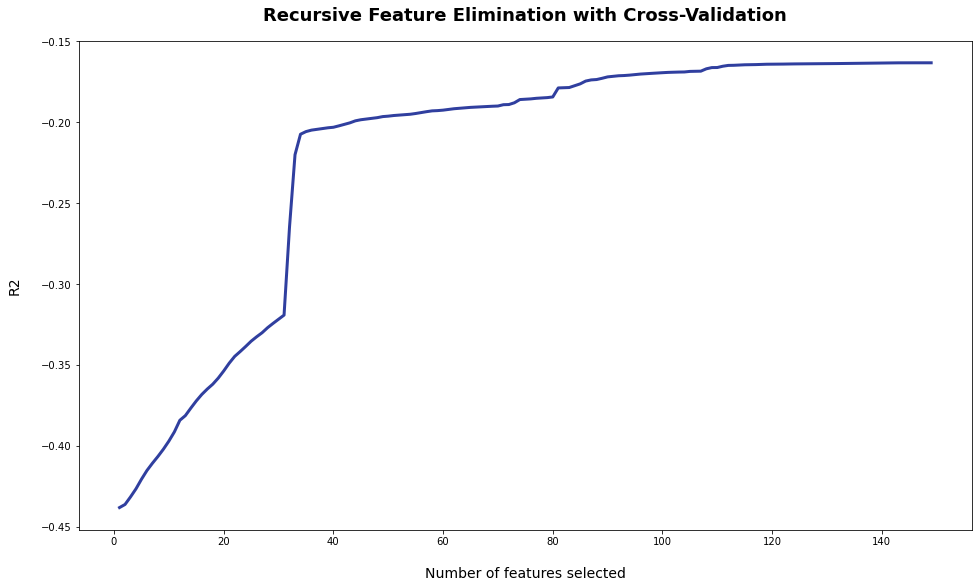

In [126]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [127]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

price  lr_predicted
2848   550000        347314
17729  472453        455260
15853  817317        589807
5921   424735        434115
11102  572283        413705
...       ...           ...
10663  776344        815452
7666   848220        833723
1236   706286        564588
2900   409535        390256
9630   418468        448103

[3613 rows x 2 columns]

In [128]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

55476.57

In [129]:
rmse = round(np.sqrt(mean_squared_error(test_actual, rfecv_predictions_unscaled)), 2)
rmse

80075.71

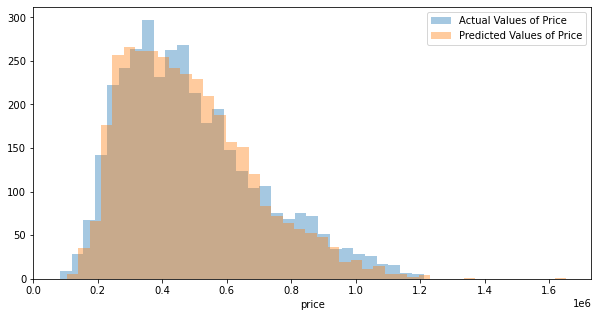

In [130]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(rfecv_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [131]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Visualizing R2 at different features selected (OLS LR)

In [132]:
'''
# explore the number of selected features for RFE

# get a list of these_models to evaluate
def get_models():
    these_models = dict()
    for i in range(70, 151):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        these_models[str(i)] = rfe
    return these_models

# evaluate a given model using cross-validation and return r2 score for model
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
    return scores

these_models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s features: %.3f R^squared' % (name, mean(scores)))

'''

"\n# explore the number of selected features for RFE\n\n# get a list of these_models to evaluate\ndef get_models():\n    these_models = dict()\n    for i in range(70, 151):\n        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)\n        these_models[str(i)] = rfe\n    return these_models\n\n# evaluate a given model using cross-validation and return r2 score for model\ndef evaluate_model(model, X, y):\n    scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')\n    return scores\n\nthese_models = get_models()\n\n# evaluate the models and store results\nresults, names = list(), list()\nfor name, model in these_models.items():\n    scores = evaluate_model(model, X_train_val, y_train_val)\n    results.append(scores)\n    names.append(name)\n    print('>%s features: %.3f R^squared' % (name, mean(scores)))\n\n"

There isn't really improvement past 134 features.

In [133]:
# plot model performance for comparison

#fig = plt.figure(figsize=(20,10))
#plt.boxplot(results, labels=names, showmeans=True)
#plt.show()

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

Written by Robert Kubler: https://towardsdatascience.com/build-your-own-custom-scikit-learn-regression-5d0d718f289

In [134]:
# Prepare our custom LAD regression, using the features recommended by our forward-backward feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

In [135]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [136]:
model = LADRegression()

model.fit(X_train_refined, y_train_val)

LADRegression()

In [137]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8618879235793301

In [138]:
predictions_LAD = model.predict(X_test_refined)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [139]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

55339.93

In [140]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_LAD_unscaled)), 2)
rmse

80703.87

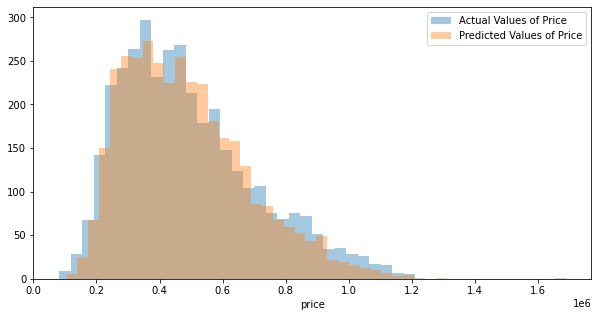

In [141]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_LAD_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [142]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Regularization models

### Lasso Regression

Lasso is a regularized model. These models try to simplify the model, in order to prevent overfitting, make the model more interpretable, and simplify feature selection. Lasso will try to solve the regression using fewer features in the final model, and therefore minimizing complexity. 

Lasso assigns penalties to strong coefficients that the model may overemphasize. Some coefficients therefore end up being reduced to 0, and removed from the model.

In [143]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [144]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.195 (+/-0.009) for {'alpha': 1}
-0.128 (+/-0.006) for {'alpha': 0.1}
-0.036 (+/-0.002) for {'alpha': 0.001}
-0.031 (+/-0.002) for {'alpha': 0.0005}


In [145]:
lasso = Lasso(alpha = [0.0005])
lasso.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(lasso, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8406407265805832

In [146]:
coef = pd.Series(lasso.coef_, index = X_train_val.columns)

In [147]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 123 variables and eliminated the other 26 variables


In [148]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

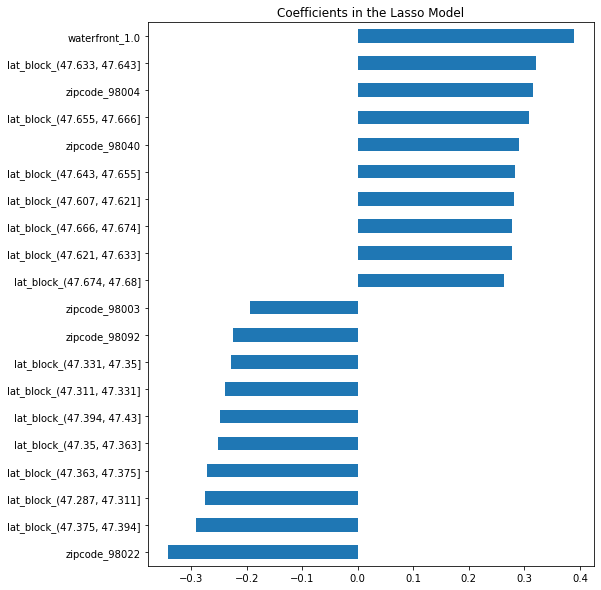

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

In [150]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [151]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

60311.98

In [152]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_lasso_unscaled)), 2)
rmse

85390.12

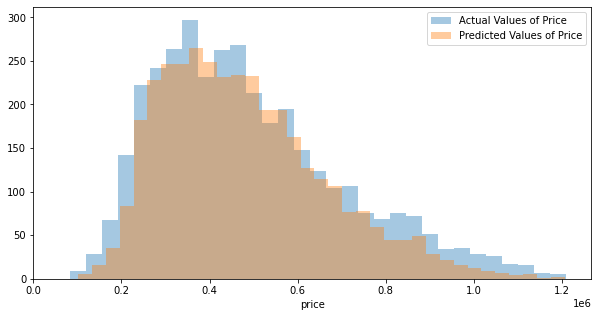

In [153]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_lasso_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [154]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Ridge Regression

Unlike Lasso,  Ridge does not seek to reduce coefficients. Like Lasso, it will penalize coefficients that the model overemphasizes.

In [155]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [156]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.1}

Grid scores on train set:

-0.027 (+/-0.002) for {'alpha': 1}
-0.027 (+/-0.002) for {'alpha': 0.1}
-0.027 (+/-0.002) for {'alpha': 0.001}
-0.027 (+/-0.002) for {'alpha': 0.0005}


In [157]:
ridge = Ridge(alpha = [0.1])
ridge.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(ridge, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8629276444569454

In [158]:
predictions_ridge = ridge.predict(X_test)
predictions_ridge_unscaled = np.exp(predictions_ridge)

In [159]:
coef = pd.Series(ridge.coef_, index = X_train_val.columns)

In [160]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 149 variables and eliminated the other 0 variables


In [161]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

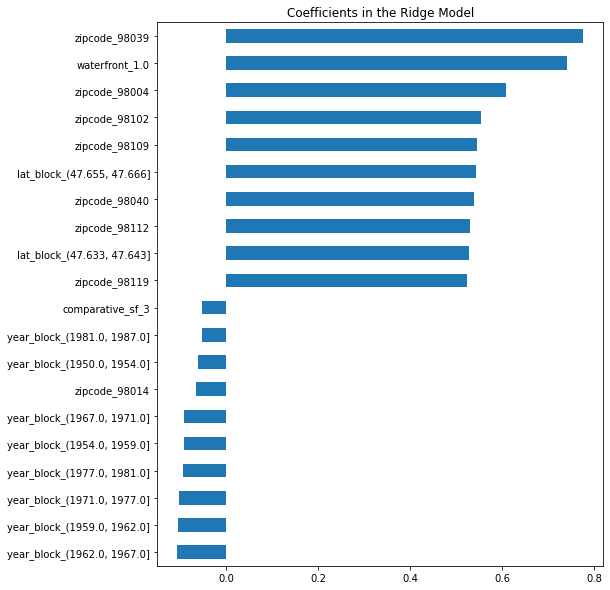

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model");

In [163]:
mae = round(mean_absolute_error(test_actual, predictions_ridge_unscaled), 2)
mae

55487.94

In [164]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_ridge_unscaled)), 2)
rmse

80104.78

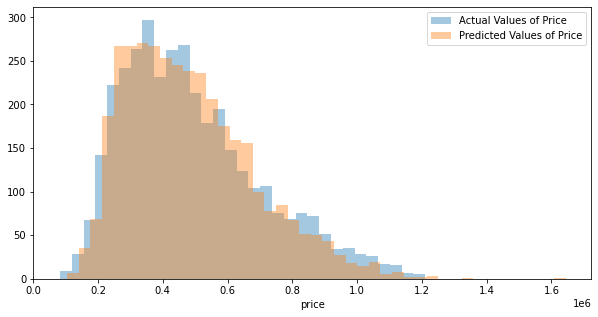

In [165]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_ridge_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [166]:
models['Models'].append('Ridge')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Elastic Net Regression

Elastic Net is another regularlized model that uses elements of Lasso in penalizing over-emphasized coefficients, without eliminating any (is actually a combo of Lasso and Ridge, the latter of which penalizes coefficients in a different way from Lasso, but doesn't eliminate coefficients).

In [167]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
elasticnet = ElasticNet()
grid = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [168]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.195 (+/-0.009) for {'alpha': 1}
-0.120 (+/-0.005) for {'alpha': 0.1}
-0.032 (+/-0.002) for {'alpha': 0.001}
-0.029 (+/-0.002) for {'alpha': 0.0005}


In [169]:
elasticnet = ElasticNet(alpha = [0.0005])
elasticnet.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(elasticnet, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8506140449880022

In [170]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [171]:
coef = pd.Series(elasticnet.coef_, index = X_train_val.columns)

In [172]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 131 variables and eliminated the other 18 variables


In [173]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

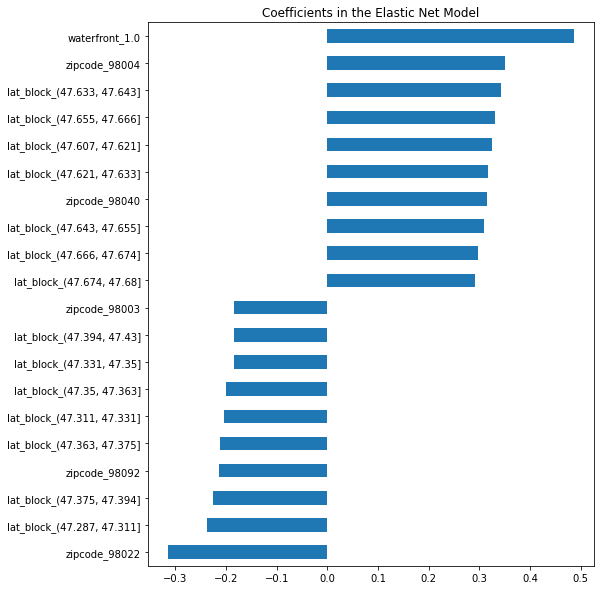

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model");

In [175]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

58231.33

In [176]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_elastic_unscaled)), 2)
rmse

82838.42

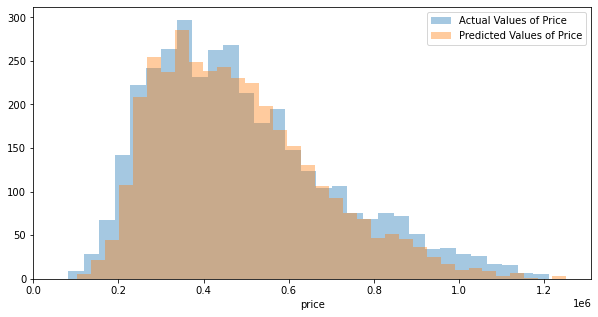

In [177]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_elastic_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [178]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## K-Nearest Neighbors Model

K-Nearest Neighbors is more commonly used for classification. Its basic premise is to determine "what is this like" in making a prediction, by looking at other things that are close in value/type. We can pick how many neighbors it assesses to make a classification. As we will see, it doesn't work very well for this type of application (or, I've not tuned the hyperparameters properly and/or don't know how to use it well).

In [179]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.07913652646216991
RMSE value for k=  2 is: 0.05955763205393975
RMSE value for k=  3 is: 0.05542586193106824
RMSE value for k=  4 is: 0.05184023153016017
RMSE value for k=  5 is: 0.05021783095480799
RMSE value for k=  6 is: 0.0496671748815552
RMSE value for k=  7 is: 0.05018506828887586
RMSE value for k=  8 is: 0.050042758026864836
RMSE value for k=  9 is: 0.049606050207332344
RMSE value for k=  10 is: 0.04935848850435672
RMSE value for k=  11 is: 0.04926734549633119
RMSE value for k=  12 is: 0.049658938576768924
RMSE value for k=  13 is: 0.05031300685973951
RMSE value for k=  14 is: 0.05045309723986754
RMSE value for k=  15 is: 0.05082619700750094
RMSE value for k=  16 is: 0.05140320351689892
RMSE value for k=  17 is: 0.0516495376201633
RMSE value for k=  18 is: 0.051707273948153484
RMSE value for k=  19 is: 0.05203290993587578
RMSE value for k=  20 is: 0.05248887103399416


In [180]:
index_min = np.argmin(rmse_val) + 1

In [181]:
model = neighbors.KNeighborsRegressor(n_neighbors = index_min)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [182]:
scores = cross_val_score(model, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.7351107708437686

In [183]:
mae = round(mean_absolute_error(test_actual, pred_knn), 2)
mae

78175.03

In [184]:
rmse = round(np.sqrt(mean_squared_error(test_actual, pred_knn)), 2)
rmse

113484.11

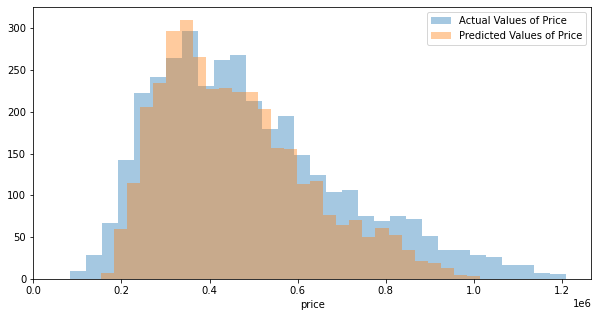

In [185]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(pred_knn, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [186]:
models['Models'].append('KNN')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Support Vector Regression

Support vector regression is a form of regression that allows us to define the acceptable error in our model and then finds the line that best fits that data, according to our specifications. This is really useful with something like housing price predictions, where we are ok with our prediction being within a certain dollar amount. SVR will attempt to get all of the predictions within that dollar amount when possible. This will result in a fit line that is different than a linear regression would have produced, but should result in a lower absolute error, which is a reasonable scoring metric for housing price predictions.

We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our SVM! Here are the parameters we are trying out:

* kernel: linear is parametric, and rbf is non-parametric. One of these should perform better. Our data is not totally normal, so it might be rbf.
* epsilon: This value is how much error we're ok with accepting without assigning a penalty to the model
* C: The error that we will accept from a point outside our epsilon

Our C and epsilon need to be in scale with our output variable, which is our log-transformed price.


In [187]:
param_grid = [
    {'kernel' : ['linear', 'rbf'], 'C' : [.1, .5, 1, 3, 5], 'epsilon' : [.1, .5, 1, 3, 5]} ]

Running this GridSearch took about 30 minutes, so we commented it out after running the first time

In [188]:
#svr = SVR()
#grid = GridSearchCV(svr, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train_val)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [189]:
#print("Best parameters set found on train set: \n")
#print(grid.best_params_)
#print("\nGrid scores on train set:\n")
#means = grid.cv_results_['mean_test_score']
#stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'C': 3, 'epsilon': 0.1, 'kernel': 'linear'}

Grid scores on train set:

    *-0.120 (+/-0.003) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.130 (+/-0.004) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.156 (+/-0.006) for {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.217 (+/-0.003) for {'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}
    *-0.334 (+/-0.008) for {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.121 (+/-0.005) for {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.160 (+/-0.009) for {'C': 0.5, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.195 (+/-0.004) for {'C': 0.5, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 0.5, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 0.5, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.122 (+/-0.005) for {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.163 (+/-0.008) for {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 1, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 1, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 3, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.126 (+/-0.004) for {'C': 3, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.165 (+/-0.006) for {'C': 3, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 3, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 3, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 3, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 5, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.128 (+/-0.004) for {'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.166 (+/-0.005) for {'C': 5, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 5, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 5, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 5, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 5, 'kernel': 'rbf'}

In [190]:
params = {'kernel' : 'linear', 'C' : 3, 'epsilon' : .1}
svr = SVR(**params)

svr.fit(X_train_val, y_train_val)

#cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# commented out because it takes forever to run and doing a simple cv-5

cv_5 = cross_val_score(svr, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8628159701280008

In [191]:
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [192]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

55415.87

In [193]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_SVR_unscaled)), 2)
rmse

80371.63

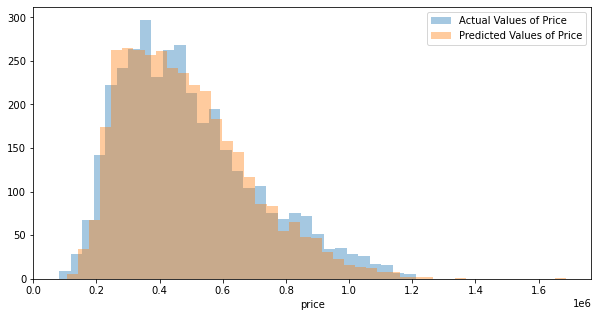

In [194]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_SVR_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [195]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Gradient Boosting Regressor

This model is entirely different than linear regression. Gradient boosting uses decision trees to learn about outcomes, with trees being added to the model one at a time and existing trees in the model are not changed. Each successive tree tries to improve upon the predictions of the first one, with the weights of the various decision points being updated each time. Gradient boosting uses the residuals to improve its next tree prediction. Overall much more opaque of a process than linear regression.

To work with a boosted regressor, we're going to roll back some of our one-hot encoding and bring those elements back to categories. Gradient boosting does not benefit from one-hot encoding. It DOES require our categoricals to be numerical, so we will ensure that they are not strings. We also don't need to standardize our continuous features with this model. Let's check out what we need to roll back.

In [196]:
# a reminder of our prepared data frame for linear regression
preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.361425    -1.063374 -0.164208 -0.917425 -0.216182  -1.671840   
1      13.232628     0.972671  0.249135  1.046925 -0.216182   0.455846   
2      12.123082    -2.179965  0.786436 -0.917425 -1.661296  -1.671840   
3      13.348344     0.263915 -0.367710 -0.917425  0.809142   1.210655   
4      13.164539    -0.139298  0.431452 -0.917425 -0.216182   0.146812   
...          ...          ...       ...       ...       ...        ...   
18057  12.880496    -0.383935 -2.842578  2.195997 -0.216182   0.732287   
18058  12.921593     0.693684 -0.116851  1.046925  0.809142   0.732287   
18059  12.984156    -1.444514 -2.547855  1.046925 -1.661296  -2.426649   
18060  12.928941    -0.266919 -1.598174  1.046925 -0.216182   0.732287   
18061  12.743025    -1.444514 -2.925585  1.046925 -1.661296  -2.426649   

       condition     grade  zipcode_98002  zipcode_98003  zipcode_98004  \
0      -0.618897 -0.430606              0              0              0   
1      -0.618897 -0.430606              0              0              0   
2      -0.618897 -1.620232              0              0              0   
3       2.216099 -0.430606              0              0              0   
4      -0.618897  0.599895              0              0              0   
...          ...       ...            ...            ...            ...   
18057  -0.618897  0.599895              0              0              0   
18058  -0.618897  0.599895              0              0              0   
18059  -0.618897 -0.430606              0              0              0   
18060  -0.618897  0.599895              0              0              0   
18061  -0.618897 -0.430606              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058              0              0              0              0   
18059              0              0              0              0   
18060              0              0              0              0   
18061              0              0              0              0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18057              0              0              0              0   
18058      

We're going to roll back zipcode into a single column categorical. We'll use age blocks still, but in-column. We're still going to use month as a categorical.

In [197]:
# we're going back and getting our categoricals data frame to re-configure these categorials for gradient boosting
df_boost = df_categoricals[categoricals]

In [198]:
df_boost

price  yr_built  month_sold  zipcode  waterfront  renovated  \
0      233614.0      1955          10    98178         0.0        0.0   
1      558287.0      1951          12    98125         0.0        1.0   
2      184072.0      1933           2    98028         0.0        0.0   
3      626776.0      1965          12    98136         0.0        0.0   
4      521539.0      1987           2    98074         0.0        0.0   
...         ...       ...         ...      ...         ...        ...   
18057  392580.0      2009           5    98103         0.0        0.0   
18058  409050.0      2014           2    98146         0.0        0.0   
18059  435459.0      2009           6    98144         0.0        0.0   
18060  412067.0      2004           1    98027         0.0        0.0   
18061  342157.0      2008          10    98144         0.0        0.0   

       basement comparative_sf comparative_lot      lat  
0           0.0              2               2  47.5112  
1           1.0              3               2  47.7210  
2           0.0              2               2  47.7379  
3           1.0              3               2  47.5208  
4           0.0              2               2  47.6168  
...         ...            ...             ...      ...  
18057       0.0              2               2  47.6993  
18058       0.0              3               2  47.5107  
18059       0.0              2               2  47.5944  
18060       0.0              2               3  47.5345  
18061       0.0              2               2  47.5941  

[18062 rows x 10 columns]

In [199]:
# reducing the granularity of our age group. We want whole numbers here so round to nearest whole number, always up.
df_boost['age_group'] = np.ceil((2015 - df_boost['yr_built'])/4)

In [200]:
# reducing the granularity of our latitude category by rounding to the nearest .1
df_boost['lat_round'] = round(df_boost['lat'], 1)

In [201]:
df_boost

price  yr_built  month_sold  zipcode  waterfront  renovated  \
0      233614.0      1955          10    98178         0.0        0.0   
1      558287.0      1951          12    98125         0.0        1.0   
2      184072.0      1933           2    98028         0.0        0.0   
3      626776.0      1965          12    98136         0.0        0.0   
4      521539.0      1987           2    98074         0.0        0.0   
...         ...       ...         ...      ...         ...        ...   
18057  392580.0      2009           5    98103         0.0        0.0   
18058  409050.0      2014           2    98146         0.0        0.0   
18059  435459.0      2009           6    98144         0.0        0.0   
18060  412067.0      2004           1    98027         0.0        0.0   
18061  342157.0      2008          10    98144         0.0        0.0   

       basement comparative_sf comparative_lot      lat  age_group  lat_round  
0           0.0              2               2  47.5112       15.0       47.5  
1           1.0              3               2  47.7210       16.0       47.7  
2           0.0              2               2  47.7379       21.0       47.7  
3           1.0              3               2  47.5208       13.0       47.5  
4           0.0              2               2  47.6168        7.0       47.6  
...         ...            ...             ...      ...        ...        ...  
18057       0.0              2               2  47.6993        2.0       47.7  
18058       0.0              3               2  47.5107        1.0       47.5  
18059       0.0              2               2  47.5944        2.0       47.6  
18060       0.0              2               3  47.5345        3.0       47.5  
18061       0.0              2               2  47.5941        2.0       47.6  

[18062 rows x 12 columns]

In [202]:
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'month_sold', 'age_group', 'lat_round']

# making our boost-ready categorical data frame using the columns we need
df_boost_processed = df_boost[categorical]

# tagging all of these things as categoricals so they are considered properly instead of ordinal/numerical
for item in categorical:
    df_boost_processed[item] = df_boost_processed[item].astype('category')


In [203]:
df_boost_processed

zipcode waterfront renovated basement comparative_sf comparative_lot  \
0       98178        0.0       0.0      0.0              2               2   
1       98125        0.0       1.0      1.0              3               2   
2       98028        0.0       0.0      0.0              2               2   
3       98136        0.0       0.0      1.0              3               2   
4       98074        0.0       0.0      0.0              2               2   
...       ...        ...       ...      ...            ...             ...   
18057   98103        0.0       0.0      0.0              2               2   
18058   98146        0.0       0.0      0.0              3               2   
18059   98144        0.0       0.0      0.0              2               2   
18060   98027        0.0       0.0      0.0              2               3   
18061   98144        0.0       0.0      0.0              2               2   

      month_sold age_group lat_round  
0             10      15.0      47.5  
1             12      16.0      47.7  
2              2      21.0      47.7  
3             12      13.0      47.5  
4              2       7.0      47.6  
...          ...       ...       ...  
18057          5       2.0      47.7  
18058          2       1.0      47.5  
18059          6       2.0      47.6  
18060          1       3.0      47.5  
18061         10       2.0      47.6  

[18062 rows x 9 columns]

In [204]:
# making our final boost_processed ready data frame by concatenating our target price, continuous variables, and boost-ready
# categorical variables
boost_processed = pd.concat([df_cleaned[target], df_continuous, df_boost_processed], axis=1)

In [205]:
# our gradient boosting ready data frame

boost_processed

price  sqft_living  sqft_lot  floors  bedrooms  bathrooms  \
0      233614.0         1180      5650     1.0         3       1.00   
1      558287.0         2570      7242     2.0         3       2.25   
2      184072.0          770     10000     1.0         2       1.00   
3      626776.0         1960      5000     1.0         4       3.00   
4      521539.0         1680      8080     1.0         3       2.00   
...         ...          ...       ...     ...       ...        ...   
18057  392580.0         1530      1131     3.0         3       2.50   
18058  409050.0         2310      5813     2.0         4       2.50   
18059  435459.0         1020      1350     2.0         2       0.75   
18060  412067.0         1600      2388     2.0         3       2.50   
18061  342157.0         1020      1076     2.0         2       0.75   

       condition  grade zipcode waterfront renovated basement comparative_sf  \
0              3      7   98178        0.0       0.0      0.0              2   
1              3      7   98125        0.0       1.0      1.0              3   
2              3      6   98028        0.0       0.0      0.0              2   
3              5      7   98136        0.0       0.0      1.0              3   
4              3      8   98074        0.0       0.0      0.0              2   
...          ...    ...     ...        ...       ...      ...            ...   
18057          3      8   98103        0.0       0.0      0.0              2   
18058          3      8   98146        0.0       0.0      0.0              3   
18059          3      7   98144        0.0       0.0      0.0              2   
18060          3      8   98027        0.0       0.0      0.0              2   
18061          3      7   98144        0.0       0.0      0.0              2   

      comparative_lot month_sold age_group lat_round  
0                   2         10      15.0      47.5  
1                   2         12      16.0      47.7  
2                   2          2      21.0      47.7  
3                   2         12      13.0      47.5  
4                   2          2       7.0      47.6  
...               ...        ...       ...       ...  
18057               2          5       2.0      47.7  
18058               2          2       1.0      47.5  
18059               2          6       2.0      47.6  
18060               3          1       3.0      47.5  
18061               2         10       2.0      47.6  

[18062 rows x 17 columns]

In [206]:
# last check that our data types are correct - all should be numerical or categories, and even the categories should be in
# numerical format
boost_processed.dtypes

price               float64
sqft_living           int64
sqft_lot              int64
floors              float64
bedrooms              int64
bathrooms           float64
condition             int64
grade                 int64
zipcode            category
waterfront         category
renovated          category
basement           category
comparative_sf     category
comparative_lot    category
month_sold         category
age_group          category
lat_round          category
dtype: object

In [207]:
# prepare boost regression data set, same as preparing for other regression styles

X = boost_processed.drop('price', axis=1)
y = boost_processed['price']

In [208]:
# creating our train/validation sets and our test sets, same as always

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

# get our actual prices reverse log transformed
test_actual = y_test

Gradient Boosting performs best with optimal parameter tuning. We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our gradient booster! Here are the parameters we are trying out:

* Loss: Loss function to be optimized. We are using lad for all of these, which is least absolute deviation
* n_estimators: Number of boosts to perform. Gradient boosting is, according to sklearn, pretty robust to over-fitting so more is usually better
* max_depth: This determines how many tree nodes the estimator looks at before making a prediction. We don't know what is best here, but I read with high-cardinality variables that 4-8 is usually good, so we are trying everything from 3-8 to see what works the best
* learning_rate: Tuning this setting alters how much the model corrects after it runs a boost. .1 is a common rate and we will test a lower and higher rate as well.

In [209]:
param_grid = [
    {'loss': ['lad'], 'n_estimators' : [250, 500],'max_depth' : [3, 4, 5, 6, 7, 8], 'learning_rate': [.05, .1, .3]}] # 

Running this GridSearch took about 90 minutes, so we commented it out

In [210]:
#model = GradientBoostingRegressor()
#grid = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train_val)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [211]:
#print("Best parameters set found on train set: \n")
#print(grid.best_params_)
#print("\nGrid scores on train set:\n")
#means = grid.cv_results_['mean_test_score']
#stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}

Grid scores on train set:

    *-66840.120 (+/-1619.859) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-62664.947 (+/-2133.751) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-62374.456 (+/-1229.272) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-59640.226 (+/-1162.829) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-59865.205 (+/-970.467) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-57976.535 (+/-700.847) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-58247.526 (+/-1246.676) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57503.606 (+/-1123.625) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-57789.270 (+/-2015.145) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-57059.973 (+/-1836.378) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-57376.748 (+/-1550.273) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-56932.683 (+/-1813.476) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}
    *-62553.238 (+/-1591.178) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-59918.017 (+/-1060.959) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-59436.297 (+/-885.120) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-58370.928 (+/-1248.473) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-58107.360 (+/-1576.668) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-57537.077 (+/-1074.531) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-57761.874 (+/-1123.443) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57482.741 (+/-1816.020) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-57442.457 (+/-1966.396) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-57167.007 (+/-1483.537) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-57684.695 (+/-1458.799) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-57257.558 (+/-1229.135) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}
    *-59406.260 (+/-200.394) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-59317.330 (+/-1132.891) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-58407.874 (+/-1212.328) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-58532.393 (+/-1337.937) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-58209.084 (+/-478.089) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-58261.074 (+/-576.375) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-57762.180 (+/-1812.929) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57889.671 (+/-1840.939) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-58400.892 (+/-2428.807) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-58574.829 (+/-1144.900) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-59126.455 (+/-2238.013) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-58816.255 (+/-1367.941) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}

Having found the optimal n_estimators, max_depth and learning_rate with our GridSearchCV, we run our regressor on the train_val set with the chosen options.

In [212]:
params = {'loss': 'lad', 'n_estimators': 500, 'max_depth': 8, 'learning_rate': .05}  
model = GradientBoostingRegressor(**params)

model.fit(X_train_val, y_train_val)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8449872832145466

In [213]:
# apply our model to our test set and get predicted values
gradient_boosted_preds = model.predict(X_test)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": gradient_boosted_preds.astype(int)})
predicted_prices_gradientboost

Actual  Predicted
2848   550000     462555
17729  472453     457885
15853  817317     588984
5921   424736     455308
11102  572284     391257
...       ...        ...
10663  776345     811972
7666   848220     798895
1236   706287     732693
2900   409536     416521
9630   418468     438787

[3613 rows x 2 columns]

In [214]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, gradient_boosted_preds), 2)
mae

57758.81

In [215]:
rmse = round(np.sqrt(mean_squared_error(test_actual, gradient_boosted_preds)), 2)
rmse

83060.1

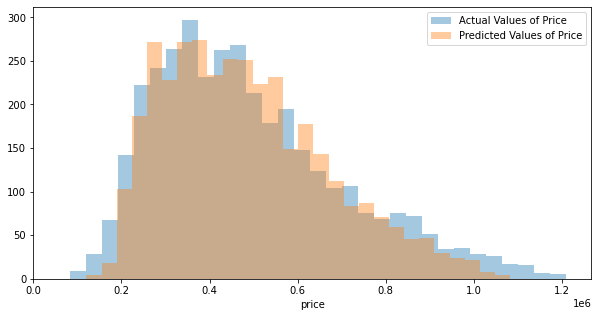

In [216]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(gradient_boosted_preds, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [217]:
models['Models'].append('Gradient Boosting')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Random Forest Regressor

In [218]:
param_grid = [
    {'bootstrap': [True, False], 'n_estimators' : [100, 250, 500],'max_depth' : [5, 10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}] # 

Grid Search for optimal parameters. Took several hours to run, so commented out after storing results.

In [219]:
'''
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_val, y_train_val)

'''

"\nmodel = RandomForestRegressor()\ngrid = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)\ngrid.fit(X_train_val, y_train_val)\n\n"

In [220]:
'''
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))
'''

'\nprint("Best parameters set found on train set: \n")\nprint(grid.best_params_)\nprint("\nGrid scores on train set:\n")\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, grid.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean, std * 2, params))\ny_true, y_pred = test_actual, np.exp(grid.predict(X_test))\n'

Best parameters set found on train set: 

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

Grid scores on train set:

-111270.360 (+/-2943.016) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-111289.131 (+/-2556.734) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
-111224.722 (+/-2679.890) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-111283.816 (+/-2866.479) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
-111349.179 (+/-2658.378) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
-111175.618 (+/-2881.753) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
-111230.092 (+/-2986.651) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
......
-91654.274 (+/-2019.948) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
-91407.873 (+/-2143.925) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}
-91354.544 (+/-2304.075) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

In [221]:
params = {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}  
model = RandomForestRegressor(**params)

model.fit(X_train_val, y_train_val)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8266527694260635

In [222]:
# apply our model to our test set and get predicted values
forest_predictions = model.predict(X_test)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": forest_predictions.astype(int)})
predicted_prices_gradientboost

Actual  Predicted
2848   550000     416467
17729  472453     454007
15853  817317     571261
5921   424736     458813
11102  572284     390086
...       ...        ...
10663  776345     780877
7666   848220     855133
1236   706287     852754
2900   409536     438451
9630   418468     418721

[3613 rows x 2 columns]

In [223]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, forest_predictions), 2)
mae

60654.33

In [224]:
rmse = round(np.sqrt(mean_squared_error(test_actual, forest_predictions)), 2)
rmse

87493.41

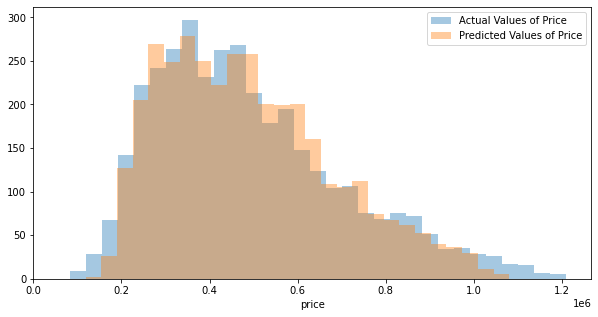

In [225]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(forest_predictions, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [226]:
models['Models'].append('Random Forest')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

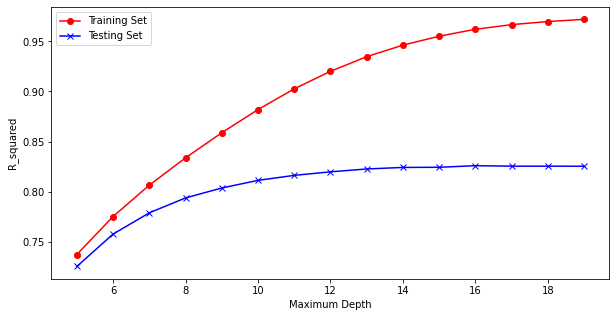

In [227]:
from sklearn.model_selection import validation_curve
def ValidationCurve(estimator, predictors, target, param_name, hyperparam):
    
    train_score, test_score = validation_curve(estimator, predictors, target, param_name, np.arange(5,20), cv=5, scoring='r2')
    Rsqaured_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(5,20), Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(np.arange(5,20), Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(hyperparam)
    plt.ylabel('R_squared')
    
ValidationCurve(RandomForestRegressor(), X_train_val, y_train_val, 'max_depth', 'Maximum Depth')

# Visualizations with Geopandas

We're going to use the Geopandas library and publicly available GIS maps to visualize the importance of location as a feature.

In [63]:
# reading in our downloaded shape files for king county, downloaded from the king county public GIS site

# we're loading this in as a geopandas data frame, which will read similar to a pandas data frame, but is different!

king_county_surrounding = gpd.read_file('gis/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.shp')

In [64]:
# check out our data

king_county_surrounding

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
199       200  98402   98402    053  Standard   30734.175856  2.612224e+07   
200       201  98403   98403    053  Standard   23495.033353  2.890938e+07   
201       202  98404   98404    053  Standard   61572.153248  2.160645e+08   
202       203  98405   98405    053  Standard   50261.100128  1.193118e+08   
203       204  98406   98406    053  Standard   74118.971224  1.088373e+08   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
199  POLYGON ((-122.44279 47.26479, -122.44272 47.2...  
200  POLYGON ((-122.44382 47.26617, -122.44434 47.2...  
201  POLYGON ((-122.38900 47.23495, -122.38932 47.2...  
202  POLYGON ((-122.44092 47.23639, -122.44944 47.2...  
203  MULTIPOLYGON (((-122.52125 47.27121, -122.5191...  

[204 rows x 8 columns]

In [65]:
# what type is all of this data?

king_county_surrounding.dtypes

# As a geopandas object, it has this data type "geometry" where it describes the shapes and coordinates

OBJECTID         int64
ZIP              int64
ZIPCODE         object
COUNTY          object
ZIP_TYPE        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [66]:
# This particular GIS map is king county and surrounding, but we want ONLY king county, so we filter out the other counties

king_county = king_county_surrounding[(king_county_surrounding['COUNTY'] == '033')]

In [67]:
# Ready to work with this data frame

king_county

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
124       125  98288   98288    033    PO Box  484750.182616  8.748980e+09   
127       128  98188   98188    033  Standard   94574.310332  2.187023e+08   
128       129  98195   98195    033  Standard   23454.900804  2.170139e+07   
137       138  98354   98354    033  Standard   13089.520224  8.506824e+06   
187       188  98422   98422    033  Standard    9173.558049  1.574725e+06   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
124  POLYGON ((-121.11918 47.77994, -121.11918 47.7...  
127  POLYGON ((-122.24187 47.44122, -122.24363 47.4...  
128  POLYGON ((-122.29028 47.65501, -122.29032 47.6...  
137  POLYGON ((-122.31230 47.26090, -122.31385 47.2...  
187  MULTIPOLYGON (((-122.33147 47.26071, -122.3304...  

[85 rows x 8 columns]

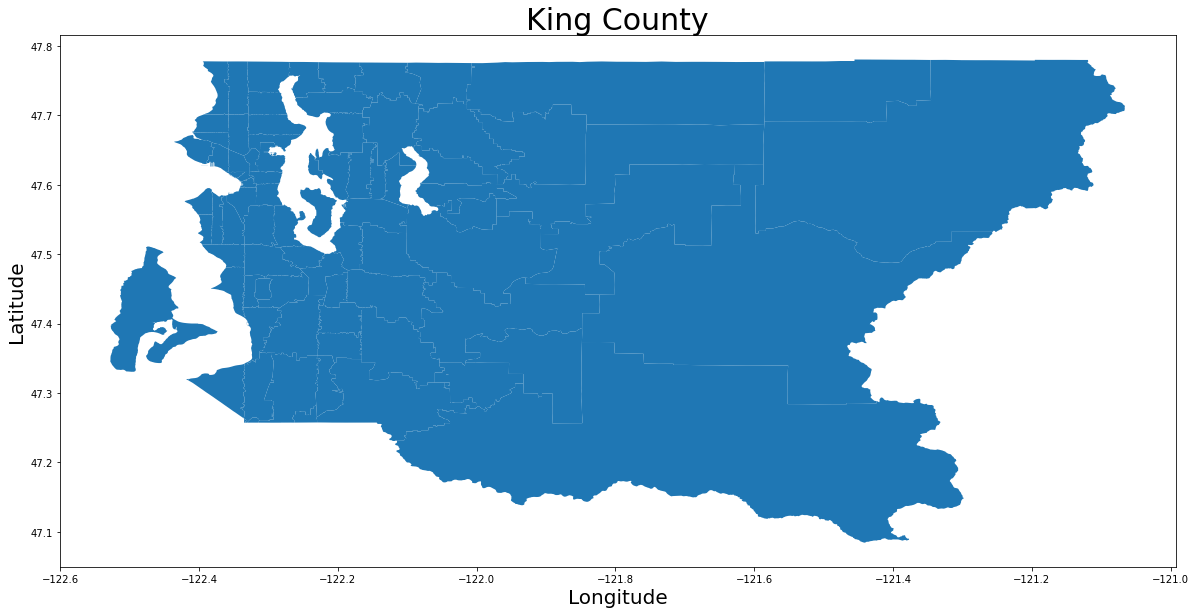

In [68]:
# the heart of a geopandas data frame is visualization, and it is perfectly integrated to do that in a few lines. Here is King County

fig, ax = plt.subplots(figsize = (20,40))
king_county.plot(ax=ax)
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20});

In [69]:
# Our map looks squat and ugly. We are going to figure out how to fix that. First let's check what kind of projection the data
# frame is using

king_county.crs

{'init': 'epsg:4326'}

In [70]:
# We are changing our data into a mercator projection which is the standard world map-style projection that elongates latitude
# and will make the map look more the way we are used to

# Project the data into Mercator Projection epsg=3395
king_county_projected = king_county.to_crs({'init': 'epsg:3395'})

# See the geometry column of the projected countries
king_county_projected['geometry'][:5] 

0    POLYGON ((-13605292.603 5982293.790, -13605395...
1    MULTIPOLYGON (((-13607902.666 5982902.872, -13...
2    POLYGON ((-13603877.542 6017509.230, -13603810...
3    POLYGON ((-13600515.564 6031584.218, -13600518...
4    POLYGON ((-13599619.856 5973763.925, -13599619...
Name: geometry, dtype: geometry

In [71]:
# We're making a new dataframe which is a groupby of our original data grouped by zipcode then sorted by median value
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))

# renaming our price column to median
zipsorted.rename(columns={'price':'median'}, inplace=True)

In [72]:
# merging our median home value onto the king county geopandas data frame, on zip code
merged = king_county_projected.set_index('ZIP').join(zipsorted)
merged.head()

OBJECTID ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
ZIP                                                                     
98031         1   98031    033  Standard  117508.231410  2.280129e+08   
98032         2   98032    033  Standard  166737.665152  4.826754e+08   
98033         3   98033    033  Standard  101363.832386  2.566747e+08   
98034         4   98034    033  Standard   98550.460072  2.725072e+08   
98030         5   98030    033  Standard   94351.274949  2.000954e+08   

                                                geometry    median  
ZIP                                                                 
98031  POLYGON ((-13605292.603 5982293.790, -13605395...  282000.0  
98032  MULTIPOLYGON (((-13607902.666 5982902.872, -13...  249000.0  
98033  POLYGON ((-13603877.542 6017509.230, -13603810...  623975.0  
98034  POLYGON ((-13600515.564 6031584.218, -13600518...  440000.0  
98030  POLYGON ((-13599619.856 5973763.925, -13599619...  280000.0

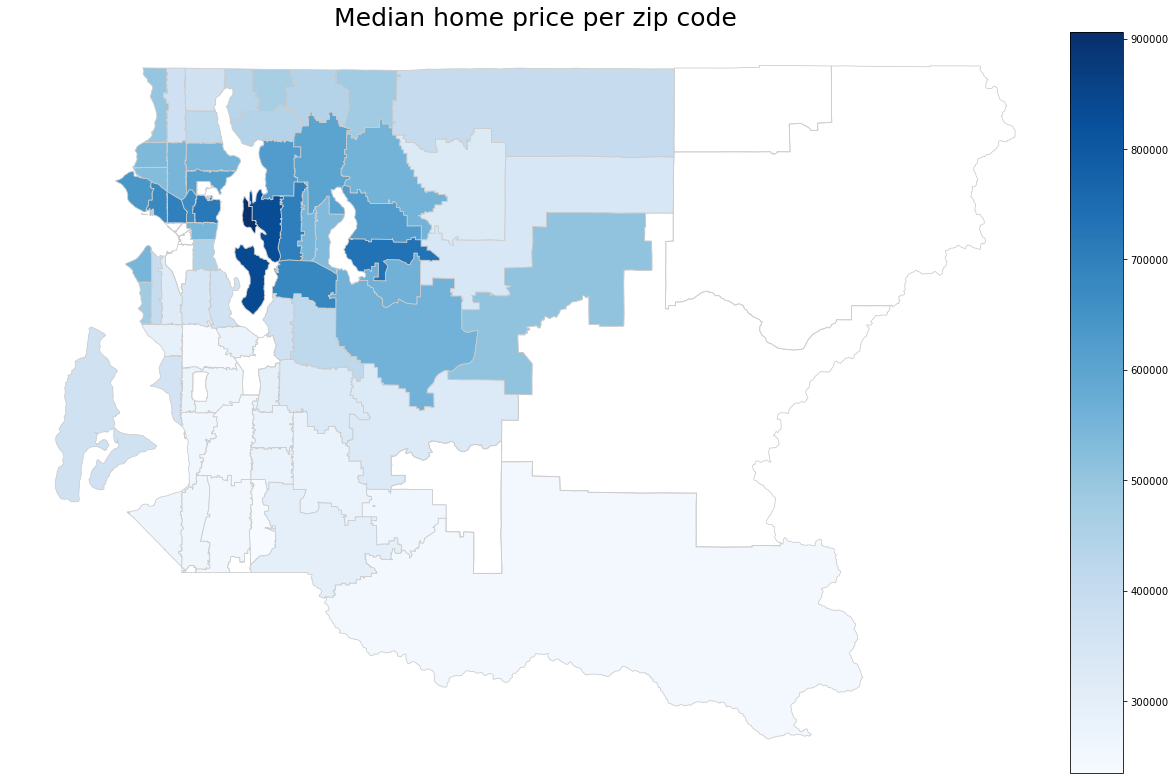

In [73]:
# Making a choropleth which is a geo heat map 

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(20,40))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_axis_off()
ax.set_title('Median home price per zip code', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create map
merged.plot(column='median', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax);

Now we're going to build a different type of map, which will have all of our sales plotted in a scatter overlaid on our king county zip code map. We'll use the latitidue and longitude coordinates in our original data frame to do this.

In [74]:
crs = {'init': 'epsg:4326'} # initiating my coordinate system
geometry = [Point(x,y) 
           for x,y in zip(df.long,df.lat)] # creating points
geo_df = gpd.GeoDataFrame(df, # the dataframe
                          crs = crs, # coordinate system that the data is using - lat/long uses the crs we initiated
                          geometry = geometry) # geometric points

# Project the coordinates into Mercator Projection epsg=3395 which is what we made our King County map into (otherwise
# our data points would not line up with our map properly)
geo_df_p = geo_df.to_crs({'init': 'epsg:3395'})

In [75]:
# looking at our data to get our quantiles for price

geo_df_p.describe()

id         price      bedrooms    bathrooms   sqft_living  \
count  1.806200e+04  1.806200e+04  18062.000000  18062.00000  18062.000000   
mean   4.735003e+09  4.662119e+05      3.308161      2.02263   1901.261544   
std    2.863707e+09  2.030949e+05      0.876859      0.69819    706.020836   
min    1.000102e+06  7.800000e+04      1.000000      0.50000    370.000000   
25%    2.310050e+09  3.100000e+05      3.000000      1.50000   1370.000000   
50%    4.051105e+09  4.260000e+05      3.000000      2.00000   1800.000000   
75%    7.504000e+09  5.870000e+05      4.000000      2.50000   2340.000000   
max    9.900000e+09  1.120000e+06      9.000000      7.50000   4230.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18062.000000  18062.000000  18062.000000  18062.000000  18062.000000   
mean    7228.137139      1.473674      0.001495      0.070147      3.410475   
std     3530.445961      0.543151      0.038635      0.255402      0.649572   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4800.000000      1.000000      0.000000      0.000000      3.000000   
50%     7157.500000      1.000000      0.000000      0.000000      3.000000   
75%     9198.750000      2.000000      0.000000      0.000000      4.000000   
max    19141.000000      3.500000      1.000000      1.000000      5.000000   

              grade    sqft_above      basement      yr_built     renovated  \
count  18062.000000  18062.000000  18062.000000  18062.000000  18062.000000   
mean       7.464013   1640.374986      0.377644   1969.983778      0.029731   
std        0.971612    670.268336      0.484811     29.901344      0.169849   
min        3.000000    370.000000      0.000000   1900.000000      0.000000   
25%        7.000000   1150.000000      0.000000   1950.000000      0.000000   
50%        7.000000   1470.000000      0.000000   1971.000000      0.000000   
75%        8.000000   1990.000000      1.000000   1997.000000      0.000000   
max       11.000000   4230.000000      1.000000   2015.000000      1.000000   

            zipcode           lat          long  sqft_living15    sqft_lot15  \
count  18062.000000  18062.000000  18062.000000   18062.000000  18062.000000   
mean   98081.762872     47.560722   -122.231807    1862.627837   7214.170634   
std       54.103819      0.138561      0.125505     575.113159   3874.048397   
min    98001.000000     47.177500   -122.512000     460.000000    651.000000   
25%    98033.000000     47.473825   -122.337000    1440.000000   4939.250000   
50%    98074.000000     47.570900   -122.268000    1750.000000   7200.000000   
75%    98119.000000     47.680500   -122.152000    2190.000000   8891.500000   
max    98199.000000     47.777600   -121.821000    4950.000000  89595.000000   

         month_sold   time_series     adj_price  
count  18062.000000  18062.000000  1.806200e+04  
mean       6.568819      6.518658  4.891525e+05  
std        3.124282      3.713474  2.136557e+05  
min        1.000000      0.000000  8.222200e+04  
25%        4.000000      3.000000  3.248270e+05  
50%        6.000000      7.000000  4.471050e+05  
75%        9.000000     10.000000  6.161560e+05  
max       12.000000     12.000000  1.212913e+06

In [76]:
# dividing our data into four quantiles

first = geo_df_p[geo_df_p['price'] < 194000]

second = geo_df_p[(geo_df_p['price'] >= 194000) & (geo_df['price'] < 310000)]

third = geo_df_p[(geo_df_p['price'] >= 310000) & (geo_df['price'] < 369950)]

fourth = geo_df_p[(geo_df_p['price'] >= 369950) & (geo_df['price'] < 429900)]

fifth = geo_df_p[(geo_df_p['price'] >= 429900) & (geo_df['price'] < 511950)]

sixth = geo_df_p[(geo_df_p['price'] >= 511950) & (geo_df['price'] < 594000)]

seventh = geo_df_p[(geo_df_p['price'] >= 594000) & (geo_df['price'] < 902000)]

eighth = geo_df_p[geo_df_p['price'] >= 902000]

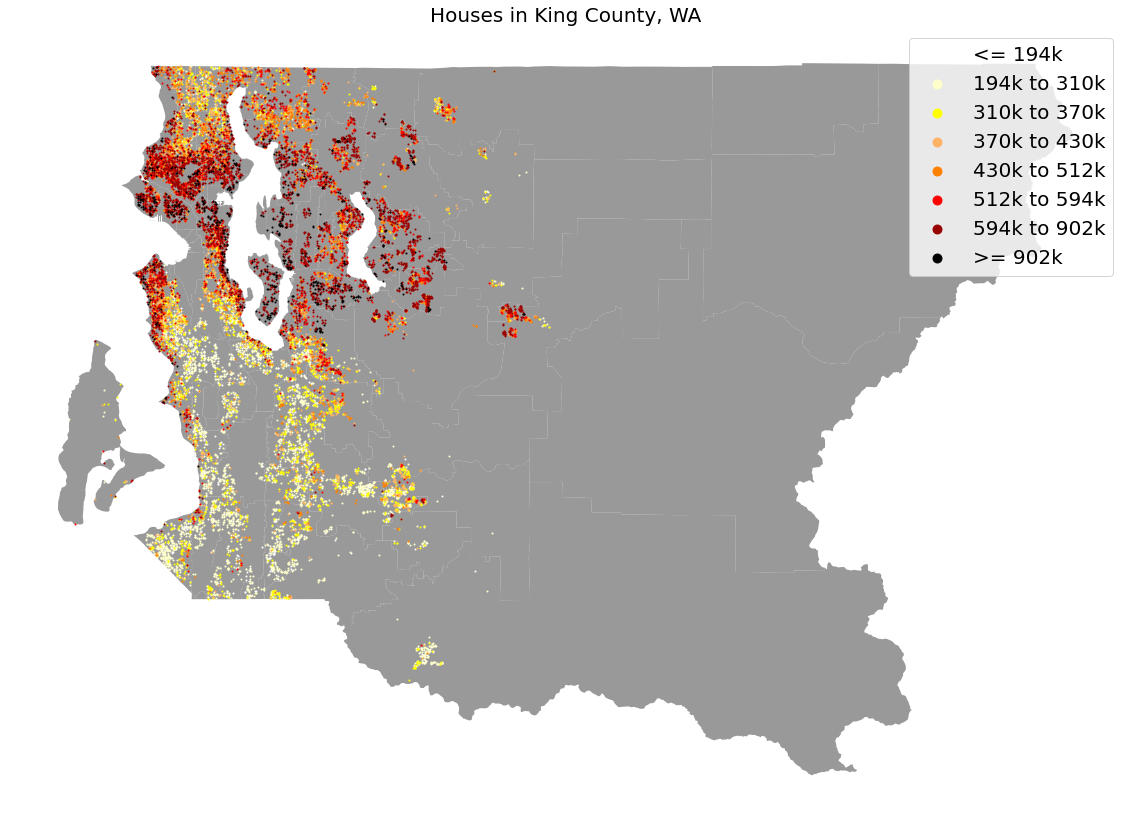

In [77]:
# plotting our quantiles on our map with increasing color depth for price

fig, ax = plt.subplots(figsize = (20,40))
ax.set_aspect(2)
king_county_projected.plot(ax=ax, alpha = 0.8, color = 'grey')

first.plot(ax = ax , markersize = 1, color = '#FFFFFF',marker = 'o',label = '<= 194k')
second.plot(ax = ax , markersize = 1, color = '#FFFFCC',marker = 'o',label = '194k to 310k')
third.plot(ax = ax , markersize = 1, color = '#FFFF00',marker = 'o',label = '310k to 370k')
fourth.plot(ax = ax , markersize = 1, color = '#FFB266',marker = 'o',label = '370k to 430k')
fifth.plot(ax = ax , markersize = 1, color = '#FF8000',marker = 'o',label = '430k to 512k')
sixth.plot(ax = ax , markersize = 1, color = '#FF0000',marker = 'o',label = '512k to 594k')
seventh.plot(ax = ax , markersize = 1, color = '#990000',marker = 'o',label = '594k to 902k')
eighth.plot(ax = ax , markersize = 1, color = '#000000',marker = 'o',label = '>= 902k')


plt.legend(prop = {'size':20} )


lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=20)
for handle in lgnd.legendHandles:
    handle.set_sizes([80.0])

ax.set_title('Houses in King County, WA', fontdict = {'fontsize':
                20})

ax.set_axis_off()

After seeing this particular visualization, we went back and included latitude as a predictor in our model, independent of zip code.

# Comps "Model"

Realtors have, traditionally, used a more grassroots method for predicting sales prices - the comps model. "Comps" are comparative properties, which are located in a nearby geographical area and have similar feature stats. With comps, a realtor looks for other similar houses in the area of the house being listed, and selects a price appropriately. It's a very literal application of K-nearest neighbors where the 2-dimensional grid is the latitude and longitude, and a neighbor is defined as the points having the closest physical feature similarities. We are going to build a comps "model" and see how our regression model compares. I use "model" in quotes because this isn't a model in machine learning terms. It requires the entire dataset to produce an answer, rather than a regression model which is a mathematical expression that we can save and utilize independently. It is essentially a "realtor simulator" which simulates the behavior of a realtor looking for comps. However for the purposes of our research, this is a Comps Model.

## Data Prep

In [228]:
# our data set for a comps model looks a lot simpler, and requires no feature scaling

df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition', 'grade']]
df_comps['price'] = df_cleaned['price']
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  233614.0         1180      5650         3          3   
1      47.7210 -122.319  558287.0         2570      7242         3          3   
2      47.7379 -122.233  184072.0          770     10000         2          3   
3      47.5208 -122.393  626776.0         1960      5000         4          5   
4      47.6168 -122.045  521539.0         1680      8080         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
18057  47.6993 -122.346  392580.0         1530      1131         3          3   
18058  47.5107 -122.362  409050.0         2310      5813         4          3   
18059  47.5944 -122.299  435459.0         1020      1350         2          3   
18060  47.5345 -122.069  412067.0         1600      2388         3          3   
18061  47.5941 -122.299  342157.0         1020      1076         2          3   

       grade  
0          7  
1          7  
2          6  
3          7  
4          8  
...      ...  
18057      8  
18058      8  
18059      7  
18060      8  
18061      7  

[18062 rows x 8 columns]

In [229]:
# our descriptors can help us figure out the appropriate range to use when seeking a comp for each of these features

df_comps.describe()

lat          long         price   sqft_living      sqft_lot  \
count  18062.000000  18062.000000  1.806200e+04  18062.000000  18062.000000   
mean      47.560722   -122.231807  4.891525e+05   1901.261544   7228.137139   
std        0.138561      0.125505  2.136557e+05    706.020836   3530.445961   
min       47.177500   -122.512000  8.222200e+04    370.000000    520.000000   
25%       47.473825   -122.337000  3.248270e+05   1370.000000   4800.000000   
50%       47.570900   -122.268000  4.471050e+05   1800.000000   7157.500000   
75%       47.680500   -122.152000  6.161560e+05   2340.000000   9198.750000   
max       47.777600   -121.821000  1.212913e+06   4230.000000  19141.000000   

           bedrooms     condition         grade  
count  18062.000000  18062.000000  18062.000000  
mean       3.308161      3.410475      7.464013  
std        0.876859      0.649572      0.971612  
min        1.000000      1.000000      3.000000  
25%        3.000000      3.000000      7.000000  
50%        3.000000      3.000000      7.000000  
75%        4.000000      4.000000      8.000000  
max        9.000000      5.000000     11.000000

In [230]:
# We want both latitude and longitude together in order to locate the exact location of a property.
# We make a new column in our data frame that groups this coordinate location together
# We also prepare our data column of predictions and populate it with NaN

dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
#df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  233614.0         1180      5650         3          3   
1      47.7210 -122.319  558287.0         2570      7242         3          3   
2      47.7379 -122.233  184072.0          770     10000         2          3   
3      47.5208 -122.393  626776.0         1960      5000         4          5   
4      47.6168 -122.045  521539.0         1680      8080         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
18057  47.6993 -122.346  392580.0         1530      1131         3          3   
18058  47.5107 -122.362  409050.0         2310      5813         4          3   
18059  47.5944 -122.299  435459.0         1020      1350         2          3   
18060  47.5345 -122.069  412067.0         1600      2388         3          3   
18061  47.5941 -122.299  342157.0         1020      1076         2          3   

       grade          coordinates  
0          7  (47.5112, -122.257)  
1          7   (47.721, -122.319)  
2          6  (47.7379, -122.233)  
3          7  (47.5208, -122.393)  
4          8  (47.6168, -122.045)  
...      ...                  ...  
18057      8  (47.6993, -122.346)  
18058      8  (47.5107, -122.362)  
18059      7  (47.5944, -122.299)  
18060      8  (47.5345, -122.069)  
18061      7  (47.5941, -122.299)  

[18062 rows x 9 columns]

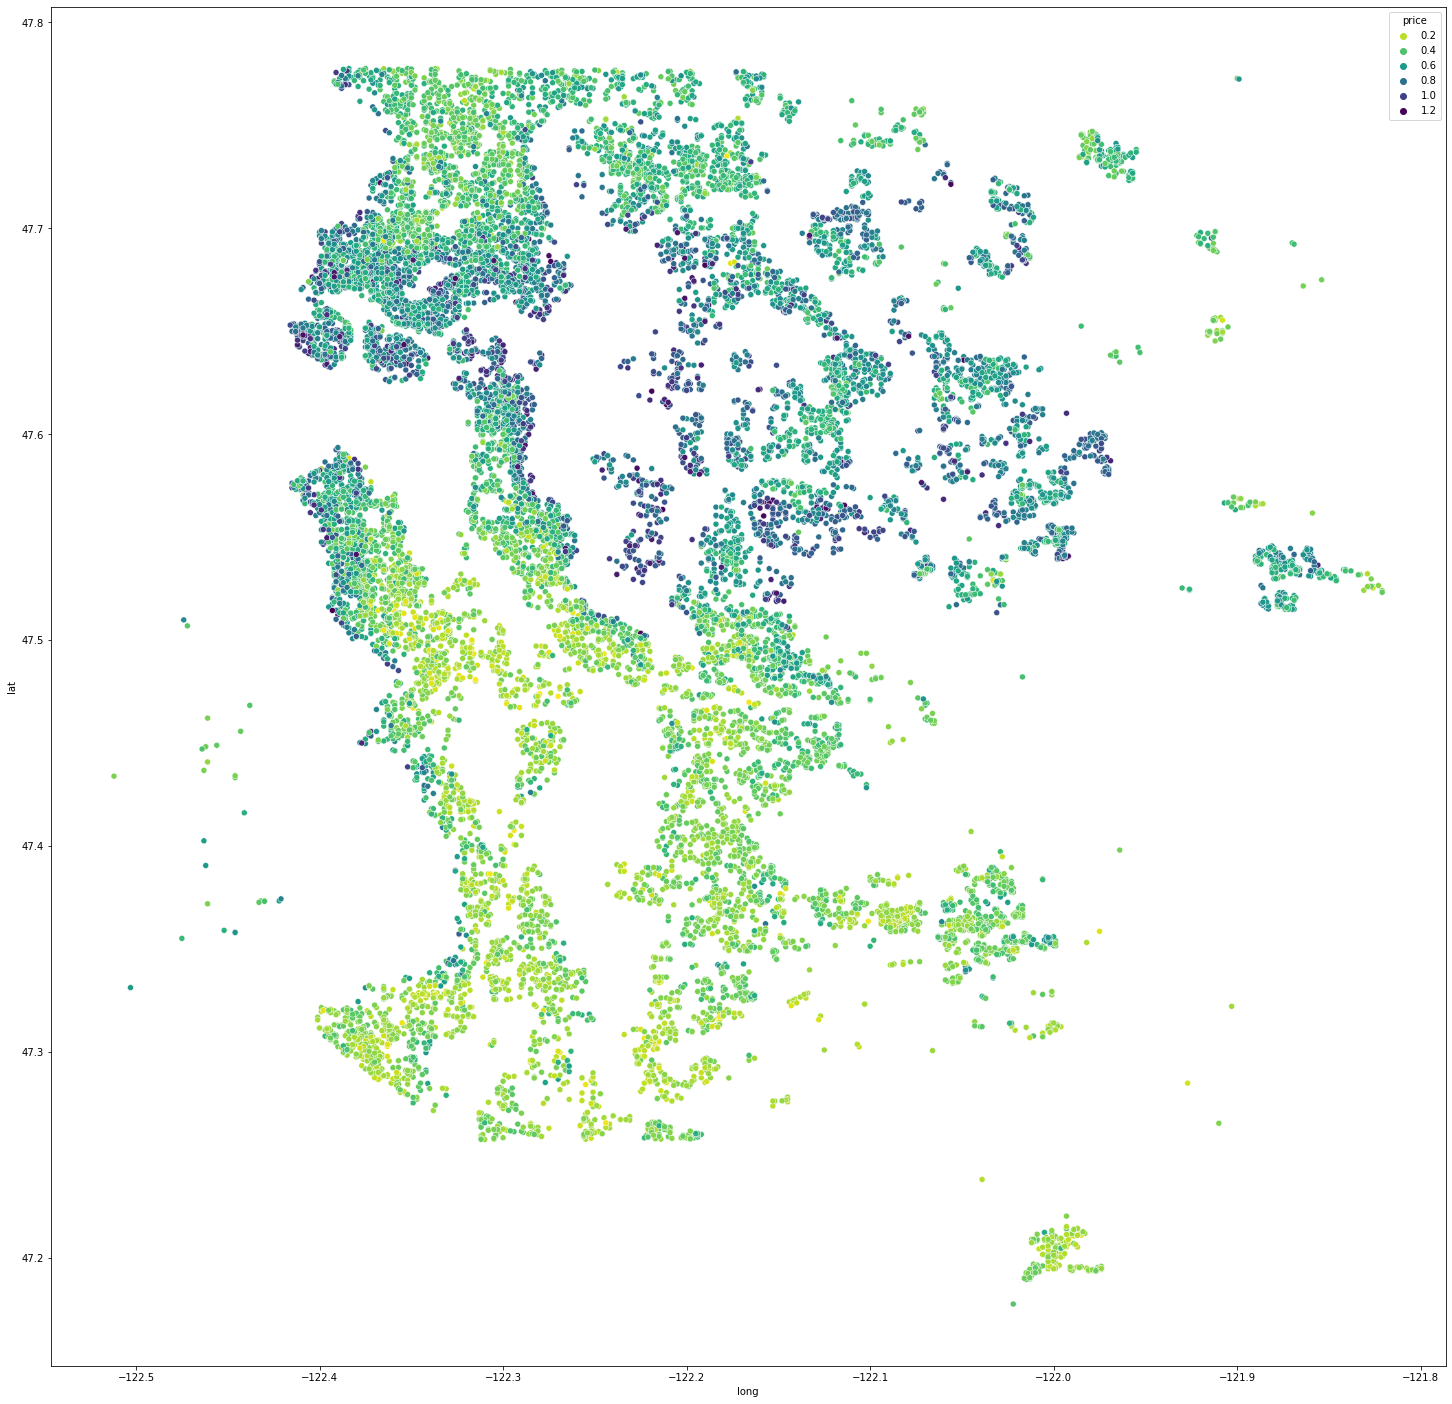

In [231]:
# A fun visual to see how using lat/long and comps makes a k-nearest neighbors problem.
# When we plot the latitude and longitude, we end up with a map of king county home sales!

plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Comps Functions

In [232]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition, grade):
    eligible_zone = inclusion_zone(base_property, housing_set)
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod))) & 
                                       (eligible_zone['grade'] >= (grade-(1+grademod))) & 
                                       (eligible_zone['grade'] <= (grade + (1+grademod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    grade = base_property['grade']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition, grade)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        sq_footage = comps['sqft_living'].sum()
        total_price = comps['price'].sum()
        pr_sqft = total_price/sq_footage
        comp_value = base_property['sqft_living'] * pr_sqft
        comp_value = round(comp_value, 0)      
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [233]:
X = df_comps.drop('price', axis=1)
y = df_comps['price']

compsfinder, getcomps, y_train, actual = train_test_split(X, y, test_size=0.2, random_state=randomstate)

In [234]:
compsfinder['price'] = y_train
getcomps['actual'] = actual

In [235]:
getcomps

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
2848   47.5683 -122.285         1070      3713         3          4      6   
17729  47.3520 -122.197         2716      7850         4          3      9   
15853  47.6695 -122.338         1410      3600         2          4      7   
5921   47.6070 -122.120         1090      7700         3          4      7   
11102  47.7016 -122.295         1340      7260         3          3      7   
...        ...      ...          ...       ...       ...        ...    ...   
10663  47.5962 -122.018         3150      9703         4          3      9   
7666   47.5402 -122.069         3970      4500         5          3      9   
1236   47.5575 -122.279         1840     10080         4          3      8   
2900   47.6742 -122.350          850      3276         2          3      6   
9630   47.7030 -122.015         1300      2983         2          3      8   

               coordinates    actual  
2848   (47.5683, -122.285)  550000.0  
17729   (47.352, -122.197)  472453.0  
15853  (47.6695, -122.338)  817317.0  
5921     (47.607, -122.12)  424736.0  
11102  (47.7016, -122.295)  572284.0  
...                    ...       ...  
10663  (47.5962, -122.018)  776345.0  
7666   (47.5402, -122.069)  848220.0  
1236   (47.5575, -122.279)  706287.0  
2900    (47.6742, -122.35)  409536.0  
9630    (47.703, -122.015)  418468.0  

[3613 rows x 9 columns]

How can we figure out what parameters give us the best comps results? We want to use something similar to GridSearchCV, but we haven't written a custom estimator. To do this, we will use sklearn's ParameterGrid. It puts together parameter combinations for us to use in whatever custom fashion we wish.

In [236]:
from sklearn.model_selection import ParameterGrid

param_grid = {'latrange': [.005, .01], 'longrange': [.005, .01], 'sqftrange': [.025, .05], 'lotrange': [.1, .2], 'bedmod': [.25], 'condmod': [.5, 1], 'grademod': [.5, 1, 1.5], }

combos = list(ParameterGrid(param_grid))

len(combos)

96

We're going to apply our 54 different parameter combinations to our testing dataframe. Afterward we'll check which parameters gave us the best results, and use those parameters for our final "comps model". Unfortunately, we don't have cv for this task. That's bad news for us.

Testing our parameters took a couple of hours, so after running it once, I comment it out and store the results.

In [237]:
'''
comps_scores = {}

for i in range(len(combos)):
    parameters = combos[i]
    getcomps[i] = None
    latrange = .02
    longrange = .02
    sqftrange = .1
    lotrange = .5
    bedmod = 0
    condmod = 0
    grademod = 1
    while getcomps.isna().sum()[i] != 0:
        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
        latrange += combos[i]['latrange']
        longrange += combos[i]['longrange']
        sqftrange += combos[i]['sqftrange']
        lotrange += combos[i]['lotrange']
        bedmod += combos[i]['bedmod']
        condmod += combos[i]['condmod']
        grademod += combos[i]['grademod']
    key = str(combos[i])
    value = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps[i])), 2)
    comps_scores[key] = value
    print(i+1, value, parameters)
'''

"\ncomps_scores = {}\n\nfor i in range(len(combos)):\n    parameters = combos[i]\n    getcomps[i] = None\n    latrange = .02\n    longrange = .02\n    sqftrange = .1\n    lotrange = .5\n    bedmod = 0\n    condmod = 0\n    grademod = 1\n    while getcomps.isna().sum()[i] != 0:\n        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)\n        latrange += combos[i]['latrange']\n        longrange += combos[i]['longrange']\n        sqftrange += combos[i]['sqftrange']\n        lotrange += combos[i]['lotrange']\n        bedmod += combos[i]['bedmod']\n        condmod += combos[i]['condmod']\n        grademod += combos[i]['grademod']\n    key = str(combos[i])\n    value = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps[i])), 2)\n    comps_scores[key] = value\n    print(i+1, value, parameters)\n"

1 120176.49 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
2 118470.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
3 120092.22 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
4 119308.61 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
5 125567.83 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
6 125818.76 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
7 125678.26 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
8 126838.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
9 124148.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
10 123145.39 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
11 123884.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
12 123974.23 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
13 130806.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
14 130229.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
15 130912.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
16 131376.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
17 109069.36 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
18 109410.56 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
19 109501.47 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
20 109628.37 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
21 113711.81 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
22 112078.32 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
23 114349.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
24 112635.79 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
25 112416.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
26 111906.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
27 113546.95 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
28 111855.1 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
29 115435.05 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
30 114966.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
31 115853.64 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
32 115724.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
33 103109.21 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
34 105918.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
35 103308.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
36 106624.58 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
37 106770.74 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
38 108781.33 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
39 107146.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
40 109315.67 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
41 104331.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
42 107826.18 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
43 105042.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
44 108565.07 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
45 108125.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
46 110442.01 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
47 108365.6 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
48 111155.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
49 120177.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
50 118484.18 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
51 120098.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
52 119321.76 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
53 125568.8 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
54 125822.89 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
55 125679.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
56 126842.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
57 124146.01 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
58 123145.33 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
59 123887.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
60 123974.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
61 130803.34 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
62 130232.94 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
63 130910.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
64 131384.24 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
65 109067.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
66 109557.09 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
67 109569.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
68 109577.98 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
69 113897.47 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
70 112456.21 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
71 114595.74 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
72 113084.43 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
73 112575.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
74 112204.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
75 113676.87 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
76 112159.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
77 115689.08 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
78 115554.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
79 116208.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
80 116353.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
81 103123.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
82 105915.06 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
83 103389.54 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
84 106626.86 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
85 106836.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
86 108882.75 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
87 107222.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
88 109326.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
89 104428.36 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
90 107945.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
91 105094.56 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
92 108595.39 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
93 108237.1 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
94 110556.68 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
95 108496.59 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
96 111199.52 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [238]:
# picked out the best scoring combination

#key_min = min(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#key_max = max(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#print('Best: '+key_min, '\nWorst: '+key_max)

    Best: {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025} 
    Worst: {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [239]:
compsfinder

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
17504  47.6854 -122.184         3170      8523         4          3      9   
11866  47.6513 -122.385         1810      1988         3          3      7   
14     47.7277 -121.962         1890     14040         3          3      7   
14856  47.4562 -122.330         2400      7738         4          3      8   
682    47.6357 -122.123         1260     10350         3          3      7   
...        ...      ...          ...       ...       ...        ...    ...   
11284  47.5341 -122.358          880      6345         2          3      7   
11964  47.5112 -122.357          780      5000         2          4      6   
5390   47.7532 -122.318         1070      9750         2          3      7   
860    47.2670 -122.250         2080     12522         3          5      6   
15795  47.6836 -122.397         1090      6750         2          3      7   

               coordinates     price  
17504  (47.6854, -122.184)  888026.0  
11866  (47.6513, -122.385)  494853.0  
14     (47.7277, -121.962)  424790.0  
14856   (47.4562, -122.33)  296869.0  
682    (47.6357, -122.123)  507900.0  
...                    ...       ...  
11284  (47.5341, -122.358)  340781.0  
11964  (47.5112, -122.357)  308643.0  
5390   (47.7532, -122.318)  349195.0  
860      (47.267, -122.25)  268747.0  
15795  (47.6836, -122.397)  458431.0  

[14449 rows x 9 columns]

In [240]:
getcomps['comps_est'] = np.NaN

latrange = .02
longrange = .02
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0
grademod = 1

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    sqftrange += .025
    lotrange += .1
    bedmod += .25
    condmod += .5
    grademod += 1.5


In [241]:
comps_predictions = getcomps[['actual', 'comps_est']]
comps_predictions

actual  comps_est
2848   550000.0   420035.0
17729  472453.0   408135.0
15853  817317.0   547840.0
5921   424736.0   414313.0
11102  572284.0   459316.0
...         ...        ...
10663  776345.0   796048.0
7666   848220.0   999660.0
1236   706287.0   609187.0
2900   409536.0   463245.0
9630   418468.0   412981.0

[3613 rows x 2 columns]

In [242]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(getcomps['actual'], getcomps['comps_est']), 2)
mae

63199.11

In [243]:
rmse = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps['comps_est'])), 2)
rmse

91075.1

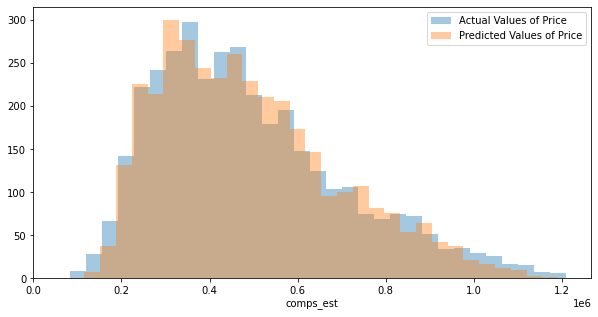

In [244]:
plt.figure(figsize=(10,5))
sns.distplot(getcomps['actual'], hist=True, kde=False)
sns.distplot(getcomps['comps_est'], hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [245]:
models['Models'].append('Realtor Simulator')
models['r2'].append(None)
models['mae'].append(mae)
models['rmse'].append(rmse)

It would seem that our "realtor simulator" performs worse than our regression model, but not by a lot.

# Model Selection

We ran several different types of models, and logged the r^squared and mean absolute error for each model type. Which model performed the best for us?

In [246]:
model_types = pd.DataFrame(models)

In [247]:
model_types = model_types.sort_values('rmse', ascending=True).reset_index()
model_types.drop('index',axis=1, inplace=True)

In [248]:
model_types

Models        r2       mae       rmse
0                    RFECV  0.866508  55476.57   80075.71
1                    Ridge  0.862928  55487.94   80104.78
2                 Basic LR  0.862892  55502.13   80123.77
3       Forw-Back Selector  0.862797  55582.07   80235.02
4                      SVR  0.862816  55415.87   80371.63
5   Permutation Importance  0.862093  55998.38   80437.52
6           LAD Regression  0.861888  55339.93   80703.87
7              Elastic Net  0.850614  58231.33   82838.42
8        Gradient Boosting  0.844987  57758.81   83060.10
9                    Lasso  0.840641  60311.98   85390.12
10           Random Forest  0.826653  60654.33   87493.41
11       Realtor Simulator       NaN  63199.11   91075.10
12                     KNN  0.735111  78175.03  113484.11

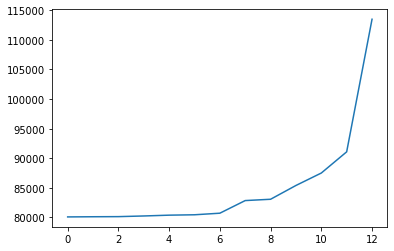

In [249]:
plt.plot(model_types['rmse'])

## TO DO make this nice

# Final Model

Now that we've chosen a favorite regression for this problem (Ridge), we want to be able to actually use the model to predict new data. Our steps are as follows:

* Build a model using our ENTIRE dataset for deployment
* Write our own standardization functions that we can apply to incoming new data
* Prepare a more intuitive GUI for predicting on new data

In [64]:
# our continuous variables before we applied the StandardScaler. 
# This is where we need to write and store our own scaling function, which we will use to scale any new incoming
# data that we want to predict from!

df_continuous_log

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0         7.073270  8.639411  0.000000  1.098612   0.000000   1.098612   
1         7.851661  8.887653  0.693147  1.098612   0.810930   1.098612   
2         6.646391  9.210340  0.000000  0.693147   0.000000   1.098612   
3         7.580700  8.517193  0.000000  1.386294   1.098612   1.609438   
4         7.426549  8.997147  0.000000  1.098612   0.693147   1.098612   
...            ...       ...       ...       ...        ...        ...   
18057     7.333023  7.030857  1.098612  1.098612   0.916291   1.098612   
18058     7.745003  8.667852  0.693147  1.386294   0.916291   1.098612   
18059     6.927558  7.207860  0.693147  0.693147  -0.287682   1.098612   
18060     7.377759  7.778211  0.693147  1.098612   0.916291   1.098612   
18061     6.927558  6.981006  0.693147  0.693147  -0.287682   1.098612   

          grade  
0      1.945910  
1      1.945910  
2      1.791759  
3      1.945910  
4      2.079442  
...         ...  
18057  2.079442  
18058  2.079442  
18059  1.945910  
18060  2.079442  
18061  1.945910  

[18062 rows x 7 columns]

## Write standardization function to apply to new data

While forming our model, we used the sklearn StandardScaler. But how do we scale brand new features that we are trying to predict from? In order to do so, we need to write a standardization function for each of our features, that we can then save and apply to our new prediction data.

In [65]:
standardization_coeffs = {}

for item in df_continuous_log:
    standardization_coeffs[item+'_mean'] = df_continuous_log[item].mean()
    standardization_coeffs[item+'_std'] = df_continuous_log[item].std()

print(standardization_coeffs)

{'sqft_living_mean': 7.479803646580473, 'sqft_living_std': 0.3823162600165352, 'sqft_lot_mean': 8.738029363894887, 'sqft_lot_std': 0.6005882483574945, 'floors_mean': 0.323725521992863, 'floors_std': 0.3528731416466609, 'bedrooms_mean': 1.1592679522495024, 'bedrooms_std': 0.28058441512064913, 'bathrooms_mean': 0.637192498123167, 'bathrooms_std': 0.3811430044003802, 'condition_mean': 1.2101286745471624, 'condition_std': 0.1801906376228536, 'grade_mean': 2.0017076865334937, 'grade_std': 0.129582729069668}


### Save Standardization coefficients to file

In [66]:
# save standardization coefficients to file so I can use these later
with open('standardization_coeffs.csv','w', newline="") as f:
    w = csv.writer(f)
    w.writerows(standardization_coeffs.items())

Now any time we bring in new data to predict with, we will use these values to standardize the new data.

new_data - mu / sigma (log transform the new data FIRST)

## Train model on entire data set

In [67]:
def standardize(feature):
    return (feature - feature.mean()) / feature.std()

final_continuous_standardized = df_continuous_log.apply(standardize)

In [68]:
preprocessed_scaled = pd.concat([df_target_log, final_continuous_standardized, df_categoricals_processed], axis=1)

In [69]:
# prepare regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [70]:
# Using sklearn RFECV to perform integrated CV while picking the number of features
# picks the number of features itself

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
final_model = RFECV(estimator=model, step=1, cv=cv, scoring='neg_root_mean_squared_error')
final_model.fit(X, y)

RFECV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='neg_root_mean_squared_error')

In [71]:
#final_model = Ridge(alpha = [0.1])
#final_model.fit(X, y)

### Save model to file

In [258]:
#from joblib import dump
#dump(final_model, 'final_model.joblib') 

### Other modeling things we need to save

lat_bins and year_bins
features columns

# Making New Predictions

    sqft_living - number
    sqft_lot - number
    floors - number
    bedrooms - number
    bathrooms - number
    condition - pick from range
    grade - pick from range
    comparative_sf - pick from range
    comparative_lot - pick from range
    zipcode - number
    month - number
    age_group - enter year built
    lat_round - enter address for lookup
    waterfront - yes/no
    renovated - yes/no
    basement - yes/no

## Set up empty/default predictive data frame

In [72]:
# Get the columns that we use from our final model
columns = X.columns

## Predictive Functions

In [73]:
# Function to standardize new data according to the mean and std deviation that we saved for each column

def standardize_continuous(key, value):
    """Standardize a value according to saved mean and standard deviation saved values"""
    transformed = (np.log(value) - standardization_coeffs[key+'_mean']) / standardization_coeffs[key+'_std']
    return transformed

In [74]:
def predict_from_one(continuous, dichotomous, high_card_cat, binned):
    """Takes in a series of dictionaries with predictive variables. Pre-processes the variables
    to conform with model predictors. Runs model on submitted predictors and returns a prediction."""
    
    # create an empty dictionary to store our predictor parameters
    test_parameters = {}
    
    # create our predictor data frame full of 0s
    test_frame = pd.DataFrame(0, index=range(1), columns=columns)

    # standardize and store our continuous variables in our predictor dictionary
    for item in continuous:
        test_parameters[item] = standardize_continuous(item, continuous[item])
    
    # for our categoricals, not all are used in our model. For each categorical that we would create with our entered data,
    # we check first and see if it's in our model at all. If the column is there, it stores
    # the predictor in our predictor dictionary as a 1, otherwise it is ignored.
    
    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    for item in high_card_cat:
        if item+'_'+str(high_card_cat[item]) in test_frame.columns:
            test_parameters[item+'_'+str(high_card_cat[item])] = 1
        
    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    for item in dichotomous:
        if dichotomous[item]:
            test_parameters[item+'_1.0']=1

    # function to find lower and upper bin bounds for our age blocks
    def age_block_finder(year, bins):
        for i in range(len(bins)):
            if year > bins[i] and year < bins[i+1]:
                lower_year, upper_year = bins[i], bins[i+1]
            else: continue
        return lower_year, upper_year

    # function to find lower and upper bin bounds for our latitude blocks
    def lat_block_finder(lat, bins):
        for i in range(len(bins)):
            if lat_round > bins[i] and lat_round < bins[i+1]:
                lower_lat, upper_lat = round(bins[i], 3), round(bins[i+1], 3)
            else: continue
        return lower_lat, upper_lat

    # find the lower and upper bounds for age block and lat block
    lower_year, upper_year = age_block_finder(year_built, year_bins) # lower and upper bounds for our age block
    lower_lat, upper_lat = lat_block_finder(lat_round, lat_bins) # lower and upper bounds for our latitude block

    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    if 'year_block_('+str(lower_year)+', '+str(upper_year)+']' in test_frame.columns:
        test_parameters['year_block_('+str(lower_year)+', '+str(upper_year)+']'] = 1

    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    if 'lat_block_('+str(lower_lat)+', '+str(upper_lat)+']' in test_frame.columns:
        test_parameters['lat_block_('+str(lower_lat)+', '+str(upper_lat)+']'] = 1
        
    # enter all of our predictors into our predictor data frame
    for item in test_parameters:
        value = test_parameters[item]
        test_frame[item] = value
    
    # send the predictor data frame to the model and get a prediction
    predicted_price = int(np.exp(final_model.predict(test_frame)))    
    
    # return the prediction
    return predicted_price

In [91]:
def prepare_line(x):
    sqft_living = x['sqft_living']
    sqft_lot = x['sqft_lot']
    floors = x['floors']
    bedrooms = x['bedrooms']
    bathrooms = x['bathrooms']
    zipcode = x['zipcode']
    month = x['month_sold']
    condition = x['condition']
    grade = x['grade']
    comparative_sf = x['comparative_sf']
    comparative_lot = x['comparative_lot']
    year_built = x['year_built']
    lat_round = round(x['lat'], 3)
    waterfront = x['waterfront']
    renovated = x['renovated']
    basement = x['basement']

    continuous = {'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition':condition, 'grade':grade}
    dichotomous = {'waterfront':waterfront, 'renovated':renovated, 'basement':basement}
    high_card_cat = {'zipcode': zipcode, 'month_sold':month, 'comparative_sf':comparative_sf, 'comparative_lot':comparative_lot}
    binned = {'year_built':year_built, 'lat_round':lat_round}
    
    predicted_price = predict_from_one(continuous, dichotomous, high_card_cat, binned)
 
    return predicted_price

In [89]:
def predict_from_dataframe(new_data):
    predictions = []
    actuals = []
    actuals = new_data.apply(lambda x: get_actual(x), axis=1)
    predictions = new_data.apply(lambda x: prepare_line(x), axis=1)
    new_predictions = pd.DataFrame()
    new_predictions['actual'] = actuals
    new_predictions['predictions'] = predictions
    return new_predictions

In [80]:
def get_actual(line):
    actual = line['actual']
    return actual

## Enter Predictors

### Future Work - GUI

This section could be a GUI, where a realtor can enter these various details into a user-friendly interface and have the details converted to proper format for our predictor behind the scenes.

We're not going to create this GUI here, so some of our data will be pre-processed when entered into our predictive matrix.

## Predict one independent entry

In [81]:
sqft_living = 1960
sqft_lot = 5000
floors = 2
bedrooms = 2.5
bathrooms = 4
zipcode = 98136
month = 12

# The description here is: Overall property condition
# The choices here are: Poor, Okay, Average, Good, Excellent
# provide examples to indicate that this variable indicates property repair/maintenance level, not quality of materials
# GUI: checkbox, check only one
condition = 3

# The description here is: Quality of property materials
# The choices here are: Low Quality, Below Average Quality, Average/Builder Grade, Above Average Quality, Very High Quality
# Give examples within each category so they can make a best guess. Ex. Low Quality - Linoleum >20 yrs old, Laminate counters
# ex. continued - Very High Quality - crown moulding, solid slab granite. 
# provide examples to allow proper selection of grade
# GUI: checkbox, check only one
grade = 5

# subjective variable - how does this home's square footage relate in size to its neighbors?
# smaller, average or larger
# GUI: checkbox, check only one
comparative_sf = 2

# subjective variable - how does this property's lot size relate in size to its neighbors?
# smaller, average or larger
# GUI: checkbox, check only one
comparative_lot = 2

# provide year built
year_built = 1965

# provide address here for lookup, use lookup service to get latitude. We are not doing that here
# for time expediency reasons. we're just directly entering a latitude
# GUI: enter an address
lat_round = round(47.5208, 3)

# these are binary flags, put 1/0
#GUI: Checkbox, check to include
waterfront = 0
renovated = 1
basement = 0

# Storing all of our variables to process them to populate our data frame

continuous = {'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition':condition, 'grade':grade}
dichotomous = {'waterfront':waterfront, 'renovated':renovated, 'basement':basement}
high_card_cat = {'zipcode': zipcode, 'month_sold':month, 'comparative_sf':comparative_sf, 'comparative_lot':comparative_lot}
binned = {'year_built':year_built, 'lat_round':lat_round}

In [84]:
predicted_price = predict_from_one(continuous, dichotomous, high_card_cat, binned)

In [85]:
predicted_price

387616

## Load and predict from csv

I used the sales lookup tool at https://info.kingcounty.gov/assessor/esales/Residential.aspx to get a sample of properties from King County sold in June of 2015.

In [86]:
# load and look at our king county housing data
new_data = pd.read_csv('newhousedata.csv')
new_data

sqft_living  sqft_lot  floors  bedrooms  bathrooms  zipcode  month_sold  \
0          1370      6180       1         3       1.50    98002           6   
1          3660     11633       2         6       3.00    98092           6   
2          2730      6000       2         5       4.00    98144           6   
3           940      5250       2         2       1.00    98144           6   
4          2030      8540       2         3       2.50    98011           6   
5          3180      4250       2         3       1.75    98112           6   
6          1680      2500       2         3       2.50    98112           6   
7          1790      8050       1         4       1.25    98007           6   
8          3260     13941       2         5       2.75    98007           6   
9          3450      6719       2         5       2.75    98059           6   
10         1460     11180       1         3       1.75    98059           6   

    condition  grade  comparative_sf  comparative_lot  year_built       lat  \
0           4      7               2                2        1958  47.30265   
1           3      9               2                2        1999  47.29090   
2           4      7               2                2        1915  47.58595   
3           4      6               2                2        1932  47.58284   
4           3      7               2                2        1977  47.77553   
5           3      8               2                2        1920  47.63654   
6           3      8               2                2        1990  47.62418   
7           4      7               2                2        1956  47.60173   
8           3      9               2                2        2015  47.62318   
9           3      9               2                2        2015  47.47780   
10          4      7               2                2        1968  47.47029   

         long  waterfront  renovated  basement  actual  \
0  -122.21784           0          0         0  225000   
1  -122.17994           0          0         0  485000   
2  -122.31168           0          1         1  600000   
3  -122.31693           0          1         0  358900   
4  -122.21097           0          0         0  410000   
5  -122.30121           0          1         1  655000   
6  -122.29843           0          0         0  665000   
7  -122.13410           0          0         0  575000   
8  -122.14456           0          0         0  979000   
9  -122.10800           0          0         0  699950   
10 -122.11673           0          0         1  389000   

                     address parcel number  \
0        815 6TH ST SE 98002   711600-0500   
1     2030 NOBLE CT SE 98092   885816-0050   
2      1912 16TH AVE S 98144   149830-1265   
3    2301 BEACON AVE S 98144   539360-0360   
4    20318 97TH AVE NE 98011   280690-0050   
5      1844 24TH AVE E 98112   871210-0765   
6       452 26TH AVE E 98112   501600-1580   
7      15419 SE 9TH ST 98007   220720-0700   
8     14736 NE 15TH CT 98007           NaN   
9   13931 174TH TER SE 98059   325960-0610   
10   14700 167TH PL SE 98059   108120-0460   

                                          Unnamed: 20  
0                                                 NaN  
1   https://blue.kingcounty.com/Assessor/eRealProp...  
2   https://blue.kingcounty.com/Assessor/eRealProp...  
3   https://blue.kingcounty.com/Assessor/eRealProp...  
4   https://blue.kingcounty.com/Assessor/eRealProp...  
5   https://blue.kingcounty.com/Assessor/eRealProp...  
6   https://blue.kingcounty.com/Assessor/eRealProp...  
7   https://blue.kingcounty.com/Assessor/eRealProp...  
8   https://blue.kingcounty.com/Assessor/eRealProp...  
9   https://blue.kingcounty.com/Assessor/eRealProp...  
10  https://blue.kingcounty.com/Assessor/eRealProp...

In [87]:
compsfinder = df_comps

new_data['comps_est'] = np.NaN
dataset = list(zip(new_data['lat'],new_data['long']))
new_data['coordinates'] = dataset

latrange = .02
longrange = .02
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0
grademod = 1

while new_data.isna().sum()['comps_est'] != 0:
    new_data.loc[new_data.comps_est.isna(), 'comps_est'] = new_data.loc[new_data.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    sqftrange += .025
    lotrange += .1
    bedmod += .25
    condmod += .5
    grademod += 1.5

NameError: name 'df_comps' is not defined

In [92]:
stuff = predict_from_dataframe(new_data)
stuff['predictions'] = round(stuff['predictions']*(1+monthly_appreciation), 0)
#stuff['comps_est'] = round(new_data['comps_est']*(1+monthly_appreciation), 0)
stuff

actual  predictions
0   225000     266177.0
1   485000     505403.0
2   600000     510798.0
3   358900     274086.0
4   410000     396948.0
5   655000     676363.0
6   665000     457048.0
7   575000     376033.0
8   979000     603277.0
9   699950     612196.0
10  389000     387798.0

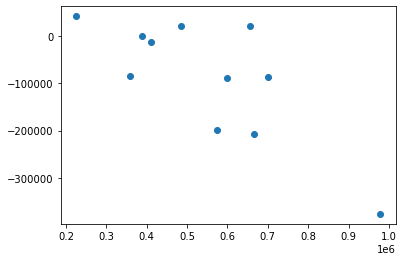

In [93]:
x_stuff = stuff['actual']
y_stuff = (stuff['predictions'] - stuff['actual'])

plt.scatter(x_stuff, y_stuff)

In [94]:
# Calculate our mean absolute error for regression

mae = round(mean_absolute_error(stuff['actual'], stuff['predictions']), 2)
mae

103782.64

In [95]:
# calculate our rmse for regression

rmse = round(np.sqrt(mean_squared_error(stuff['actual'], stuff['predictions'])), 2)
rmse

150632.26

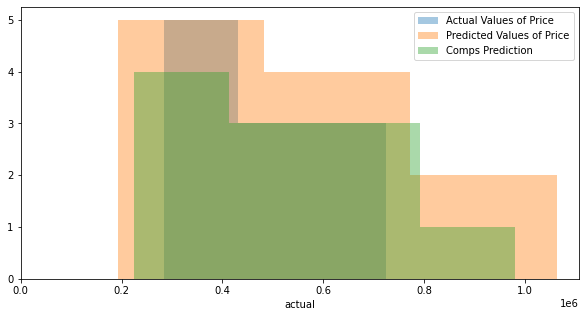

In [276]:
plt.figure(figsize=(10,5))
sns.distplot(stuff['predictions'], hist=True, kde=False)
sns.distplot(stuff['actual'], hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price', 'Comps Prediction'])
plt.xlim(0,);

# Explanation of Attempts - Feature Engineering/Selection

A lot of efforts were made to retain granularity while decreasing model complexity, but generally, keeping categoricals one-hot encoded as granularly as possible resulted in the best performance.

These are things I tried that did not improve the model:

* Month ranked on mean sales price, then expressed with polynomial relationship with price (one-hot encoded all 12 was better)
* Month binned into 4 quarters (one-hot encoded all 12 was better)
* Zip code as ordinal, ranked based on median home value per zip code (one-hot encoded all 70 was better)
* Zip code in bins (ex 7, 10 bins)
* Zip code, ranked as ordinal, then expressed with polynomial relationship with price (one-hot encoded all 70 was better)
* sqft_living expressed as polynomial relationship with price (ineffective)
* feature engineered "location" attempting to correlate with zip code based on housing quality using condition and grade (did not correlate). Needed more neighborhood quality metrics.
* ranking property based on its relationship to the sqft_15 categories by ranking it either smaller, medium or higher than neighbors, hypothetically penalizes being the biggest house in the neighborhood. Made this but feature selectors generally eliminated.
* Age of house, rather than bins of year built, as ordinal with relationship to price (high-cardinality one-hot encoded bins was better)
* Latitude relationship with Price as polynomial relationship. Although relationship was clear on scatter, addition of feature was not meaningful.

# TO DO

Other:

* Add statistical evaluations to selected model
* determine ranges and confidence level for predictions


# Conclusions

# Recommendations

# Future Work

King County GIS offers maps for tons of metrics that can help us more granularly determine neighborhood quality and price, including average household income which should be a strong predictor.

However we want a tool that a realtor can use to price, or a homebuyer can use to budget, so we need predictors that can be effectively rated by a realtor or understood by a buyer.

School district is one of these and is understood anecdotally to impact house prices. King County has GIS maps available for both school district and actual school locations.

We can get actual school district assignments by first utilizing King County's plot lookup tool with our lat/longs, and entering this address into GreatSchools.org with web scraper, getting back school name and rating for elementary, middle, high. We can test if overall school district and individual school levels have a unique effect on property price, and determine which metric there is most appropriate to use. This is information that a realtor has or a buyer can provide as desirable, on at least the district level.

We can also study other metrics used by the value predictor on Redfin to make our own predictions. Walkability is a metric to study, and this can be determined using those same GIS maps. King County has them available for all public services and public parks.

In [274]:
break

SyntaxError: 'break' outside loop (<ipython-input-274-6aaf1f276005>, line 1)

# Deprecated/Unused

This section represents code written for the project that was not used, but that I wish to retain for reference purposes

## Month/Price as polynomial feature

In [ ]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month_sold')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month_sold'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [ ]:
df_bins

In [ ]:
y = df_target_log
x = df_bins['monthsorted']

In [ ]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

## Month binned into 4 quarters

In [ ]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df_categoricals.groupby('month_sold')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_categoricals['quarter'] = df_categoricals['month_sold'].apply(lambda x: make_group(x, monthranks, 'quarter'))

## Zip code binning

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

## Zip Code/price as polynomial feature

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [ ]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [ ]:
zip_group = np.log(df_bins['zip_group'].astype(int))
zip_group = np.array(zip_group)
zip_group = zip_group.reshape(-1, 1)

target = np.array(df_target_log)

In [ ]:
target = target[zip_group[:,0].argsort()]
zip_group = zip_group[zip_group[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_group, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_group)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_group)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_group)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_group)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_group, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_group, pred, c='red', label='Linear regression line')
plt.plot(zip_group, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_group, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_group, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

However in practice - we obtained a better score on our model by one-hot encoding our 70 zip codes, rather than using this polynomial relationship.

#### Zip

In [ ]:
df_zip = df_bins['zip_group']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## sqft_living /price as polynomial feature

In [ ]:
df_polynomial = df[polynomial]
df_polynomial

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [ ]:

this = df_continuous_standardized['sqft_living']
this

that = df_target_log
that

In [ ]:
this = np.array(this)
this = this.reshape(-1, 1)
that = np.array(y)
that = that.reshape(-1, 1)

In [ ]:
that = that[this[:,0].argsort()]
this = this[this[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(this, that)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(this)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, that)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(this)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, that)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(this)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, that)


pred = linreg.predict(this)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(this, that)
plt.yscale('log')
plt.title("Train data")
plt.scatter(this, pred, c='red', label='Linear regression line')
plt.scatter(this, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(this, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(this, pred10, c='black', label='Polynomial regression line 10')
;

In [ ]:
print(linreg.score(this, that), poly_reg2.score(x_poly2, that), poly_reg3.score(x_poly3, that), poly_reg10.score(x_poly10, that))

We don't have enough of an improvement when moving to a 2nd degree polynomial to change our sqft_living to a polynomial relationship.

#### Sqft_living

In [ ]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

In [ ]:
#df_sqft = np.log(df_sqft)
#plt.hist(df_sqft)

In [ ]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [ ]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

In [ ]:
sqft_poly.drop(0, axis=1, inplace=True)

In [ ]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [ ]:
scaler = StandardScaler()
sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [ ]:
sqft_poly

## Latitude/price as polynomial feature

In [ ]:
#x = df_continuous_log['sqft_living']
x = df['lat']
y = df_target_log

In [ ]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly5 = PolynomialFeatures(degree=5)
x_poly5 = poly10.fit_transform(x)
poly_reg5 = LinearRegression()
poly_reg5.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred5 = poly_reg5.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred5, c='black', label='Polynomial regression line 5')
;

In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg5.score(x_poly5, y))

We can use our latitude as a predictor as a 4th degree polynomial.

In [ ]:
df_lat = df['lat']
df_lat


In [ ]:
df_lat = np.array(df_lat)
df_lat = df_lat.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=4)
latitude = poly.fit_transform(df_lat)

In [ ]:
lat_poly = pd.DataFrame(latitude)
lat_poly

In [ ]:
lat_poly.drop(0, axis=1, inplace=True)

In [ ]:
lat_poly.rename(columns={1:"lat_1", 2:'lat_2', 3:'lat_3', 4:'lat_4'}, inplace=True)

In [ ]:
scaler = StandardScaler()
lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']] = scaler.fit_transform(lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']])

In [ ]:
lat_poly

## Polynomial learning stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_group'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff